In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/truist-2023-modeling-competition-gsu/sample_submission.csv
/kaggle/input/truist-2023-modeling-competition-gsu/train.csv
/kaggle/input/truist-2023-modeling-competition-gsu/metaData.csv
/kaggle/input/truist-2023-modeling-competition-gsu/test.csv


In [3]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [6]:
# Supress warnings

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Read the data

In [7]:
df_train = pd.read_csv("/kaggle/input/truist-2023-modeling-competition-gsu/train.csv", low_memory=False)
df_train

id  age           job   marital  education default  balance housing  \
0       8054   25        admin.    single   tertiary      no    11924      no   
1       5886   23     housemaid  divorced    primary      no      398     yes   
2       3542   74       unknown   married    unknown      no     2177     yes   
3      32553   60     housemaid   married   tertiary      no    26673     yes   
4      11020   32  entrepreneur    single    primary      no     6358      no   
...      ...  ...           ...       ...        ...     ...      ...     ...   
36866  11284   53    technician   married  secondary      no    26564     yes   
36867  44732   64        admin.  divorced  secondary      no    85454      no   
36868  38158   83  entrepreneur  divorced   tertiary      no    52800     yes   
36869    860   86    unemployed   married  secondary     yes     1898      no   
36870  15795   42    technician    single  secondary      no     1875     yes   

      loan   contact  ...  campaign pdays  previous  poutcome  cd  \
0       no   unknown  ...      32.0   144       8.0   failure   1   
1       no  cellular  ...       4.0    15       4.0   unknown   1   
2       no   unknown  ...       3.0   465       4.0   failure   0   
3       no  cellular  ...      17.0   396       6.0   unknown   1   
4      yes   unknown  ...      28.0   314      24.0   failure   0   
...    ...       ...  ...       ...   ...       ...       ...  ..   
36866  yes   unknown  ...      15.0    89      24.0     other   0   
36867   no   unknown  ...      23.0   210      58.0     other   0   
36868   no  cellular  ...       8.0   361      17.0     other   0   
36869   no  cellular  ...      51.0   164       5.0   success   1   
36870   no   unknown  ...       1.0    57      29.0   unknown   0   

              generation state  zipcode Unnamed: 21 Unnamed: 22  
0            Millennials    MT    59776         NaN         NaN  
1            Millennials    OH    45438         NaN         NaN  
2      Silent Generation    PR      776         NaN         NaN  
3          Older Boomers    WI    54537         NaN         NaN  
4            Millennials    MP    96952         NaN         NaN  
...                  ...   ...      ...         ...         ...  
36866    Younger Boomers    NV    89146         NaN         NaN  
36867      Older Boomers    TX    75616         NaN         NaN  
36868  Silent Generation    IN    47690         NaN         NaN  
36869  Silent Generation    TX    78971         NaN         NaN  
36870              Gen X    VI      805           x           x  

[36871 rows x 23 columns]

### The train data has been observed to have 36871 rows and 23 columns

In [8]:
df_test = pd.read_csv("/kaggle/input/truist-2023-modeling-competition-gsu/test.csv", low_memory=False)
df_test

id  age            job   marital  education default  balance housing  \
0     11262   28    blue-collar    single    primary      no    32289      no   
1     39813   24   entrepreneur  divorced   tertiary      no     1644      no   
2      6108   92     technician       NaN  secondary      no    -1035     yes   
3     43280   24  self-employed    single  secondary      no     9710      no   
4      9011   80       services    single   tertiary      no    81688      no   
...     ...  ...            ...       ...        ...     ...      ...     ...   
9213  13370   66       services   married  secondary     yes     9168      no   
9214   1108   40   entrepreneur   married   tertiary      no     6249     yes   
9215  39526   42       services   married  secondary      no    44119     yes   
9216  23927   42      housemaid   married   tertiary      no    -1942     yes   
9217  16749   65     management   married   tertiary     yes    54678     yes   

     loan    contact  day month  duration  campaign  pdays  previous poutcome  \
0     yes   cellular   29   feb      1582      29.0    437       1.0    other   
1      no   cellular   13   nov      3100       7.0    139      32.0  unknown   
2      no   cellular    7   may      3018       4.0    176      14.0    other   
3      no  telephone   26   sep      2595      63.0    184       6.0  success   
4      no    unknown   22   jul      2576      32.0    150      15.0  failure   
...   ...        ...  ...   ...       ...       ...    ...       ...      ...   
9213   no    unknown    2   dec       204      21.0    445       3.0    other   
9214   no  telephone   29   apr      4898      17.0    205      28.0    other   
9215   no  telephone    7   jan       964      43.0     15      26.0  failure   
9216   no   cellular    7   feb      4137       9.0    155      20.0  success   
9217   no   cellular   16   jun      1855      31.0    440      21.0  success   

             generation state  zipcode  
0           Millennials    OK    73125  
1           Millennials    MI    48902  
2     Silent Generation    MD    21568  
3           Millennials    SC    29488  
4     Silent Generation    LA    70608  
...                 ...   ...      ...  
9213      Older Boomers    KY    42636  
9214              Gen X    CA    90803  
9215              Gen X    OR    97575  
9216              Gen X    PA    15230  
9217      Older Boomers    NC    27851  

[9218 rows x 20 columns]

In [14]:
print("The data shape of data is {}".format(df_train.shape[0]))
print("The number of feature in this data set is {}".format(
    df_train.shape[1]))

The data shape of data is 36871
The number of feature in this data set is 23


### The train data is observed to have 36871 rows and 23 columns

# Data description using the train data

#### We have employed the following methods to investiage the structure and composition of the train data.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           36871 non-null  int64  
 1   age          36871 non-null  int64  
 2   job          36819 non-null  object 
 3   marital      36445 non-null  object 
 4   education    36871 non-null  object 
 5   default      36871 non-null  object 
 6   balance      36871 non-null  int64  
 7   housing      36871 non-null  object 
 8   loan         36871 non-null  object 
 9   contact      36871 non-null  object 
 10  day          36871 non-null  int64  
 11  month        36871 non-null  object 
 12  duration     36871 non-null  int64  
 13  campaign     36862 non-null  float64
 14  pdays        36871 non-null  int64  
 15  previous     36494 non-null  float64
 16  poutcome     36871 non-null  object 
 17  cd           36871 non-null  int64  
 18  generation   36597 non-null  object 
 19  stat

## Data summary:


Here's a summary of the information for each column in the dataset:

1. **id**: Contains integer values with 36,871 non-null entries.
2. **age**: Contains integer values with 36,871 non-null entries.
3. **job**: Contains object (string) values with 36,819 non-null entries.
4. **marital**: Contains object (string) values with 36,445 non-null entries.
5. **education**: Contains object (string) values with 36,871 non-null entries.
6. **default**: Contains object (string) values with 36,871 non-null entries.
7. **balance**: Contains integer values with 36,871 non-null entries.
8. **housing**: Contains object (string) values with 36,871 non-null entries.
9. **loan**: Contains object (string) values with 36,871 non-null entries.
10. **contact**: Contains object (string) values with 36,871 non-null entries.
11. **day**: Contains integer values with 36,871 non-null entries.
12. **month**: Contains object (string) values with 36,871 non-null entries.
13. **duration**: Contains integer values with 36,871 non-null entries.
14. **campaign**: Contains float values with 36,862 non-null entries.
15. **pdays**: Contains integer values with 36,871 non-null entries.
16. **previous**: Contains float values with 36,494 non-null entries.
17. **poutcome**: Contains object (string) values with 36,871 non-null entries.
18. **cd**: Contains integer values with 36,871 non-null entries.
19. **generation**: Contains object (string) values with 36,597 non-null entries.
20. **state**: Contains object (string) values with 36,871 non-null entries.
21. **zipcode**: Contains integer values with 36,871 non-null entries.
22. **Unnamed: 21**: Contains object (string) values with 1 non-null entry.
23. **Unnamed: 22**: Contains object (string) values with 1 non-null entry.

In [16]:
df_train.describe().T

count          mean           std     min      25%      50%  \
id        36871.0  23049.428630  13289.452560     0.0  11508.5  23091.0   
age       36871.0     56.093895     22.094687    18.0     37.0     56.0   
balance   36871.0  31107.728649  32953.802621 -8017.0   1250.5  19865.0   
day       36871.0     16.052887      8.542910     1.0      9.0     16.0   
duration  36871.0   2108.680426   1535.050741     0.0    598.5   2023.0   
campaign  36862.0     21.164451     17.079177     1.0      5.0     19.0   
pdays     36871.0    296.696672    203.593249    -1.0    134.0    276.0   
previous  36494.0     27.341536     42.687226     0.0      9.0     20.0   
cd        36871.0      0.234412      0.423636     0.0      0.0      0.0   
zipcode   36871.0  53571.636978  32789.449679   600.0  24977.5  55980.0   

              75%       max  
id        34546.5   46088.0  
age          75.0      95.0  
balance   60590.0  102125.0  
day          23.0      31.0  
duration   3458.0    4918.0  
campaign     34.0      63.0  
pdays       421.0     871.0  
previous     30.0     275.0  
cd            0.0       1.0  
zipcode   84274.0   99949.0

### Description:Age

The mean age of the customers making deposits is observed at 56 years with a standard deviation of 22 years.

The minimum age of customers 18 years and the max age is observed at 95 years.

### Description: Balance

The mean balance in the accounts is observed at 31107 dollars with a standard deviation of 32953 dollars.

The minimum balance observed was -8017 dollars and the maximum balance observed was 102125 dollars.


### Description: Day

The mean of the day of contact is observed around mid-month at the 16th of each month with a std. deviation of 8 days.

The mimum day of contact is 1 and the maximum day of contact is 31 suggesting that the customers have also been contacted on the 1st of every month as well as the 31st of every month.

### Description: Duration

The mean duration of contact between the Bank and customer has been observed at 2108 seconds = 35 minutes with a standard deviation of 1535 seconds = 25.5841790167 minutes

The minimum duration of contact between the Bank and customer has been observed at 0 seconds while the maximum contact duration has been observed at 4918 seonds ~ 81 minutes.

### Description: Campaign

The mean number of contacts performed during this campaign for this client has been observed at 21 times with a standard deviation of 17.

The minimum number of contacts performed during this campaign for this client has been observed at 1 time and maximum 63 times.

### Description: pdays

The mean number of days since client was last contacted from previous campaign is 296 days ≈ 9.77 months with a standard deviation of 203 days ≈ 6.67 months.

The minimum number of days since client was last contacted from previous campaign is less than 1 day and the maximum number of days since the client was last contacted was observed at 871 days ≈ 28.61 months which indicates that clients with a longer deposit period have been contacted at the end of their deposit term.




## Null values visualization

In [17]:
df_null = df_train.isnull().sum().to_frame("count").sort_values(by="count", ascending = False)
df_null

count
Unnamed: 22  36870
Unnamed: 21  36870
marital        426
previous       377
generation     274
job             52
campaign         9
zipcode          0
state            0
cd               0
poutcome         0
pdays            0
id               0
duration         0
age              0
day              0
contact          0
loan             0
housing          0
balance          0
default          0
education        0
month            0

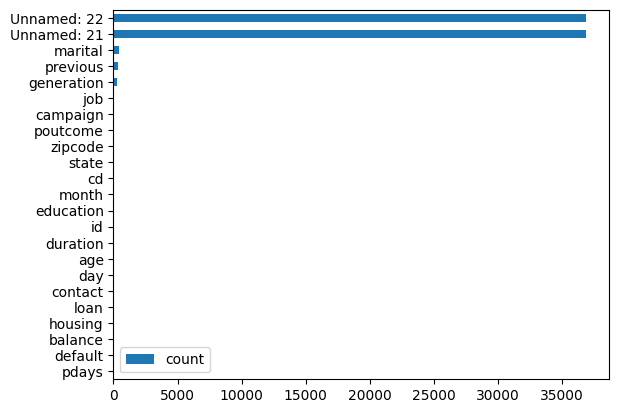

In [18]:
df_null.sort_values(by="count", ascending = True).plot(kind="barh")
plt.show()

#### We can observe that Marital status, Previous (number of contacts performed before this campaign for this client) has the highest number of missing values followed by Previous(number of contacts performed before this campaign for this client), Generation, Job(client job type), Campaign (number of contacts performed during this campaign for this client) with a breakdown as follows:


#### marital	426
#### previous	377
#### generation	274
#### job	52
#### campaign	9

## Target Class Distribution

In [10]:
count = df_train["cd"].value_counts().to_frame("Target")
count

Target
cd        
0    28228
1     8643

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


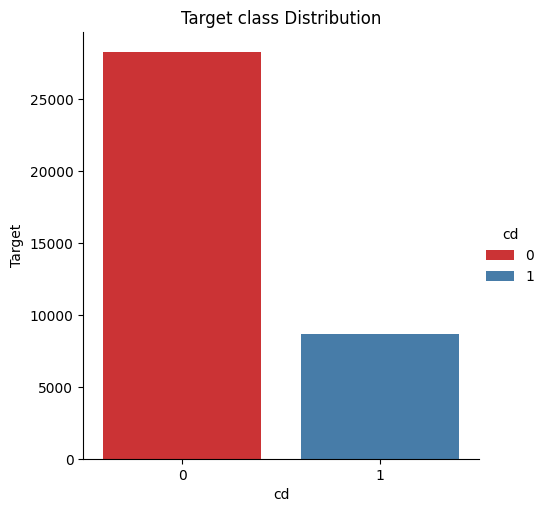

In [11]:

sns.catplot(data=count, x=count.index, y=count.Target, kind='bar', palette = "Set1", hue = "cd")
plt.title("Target class Distribution")
plt.show()    

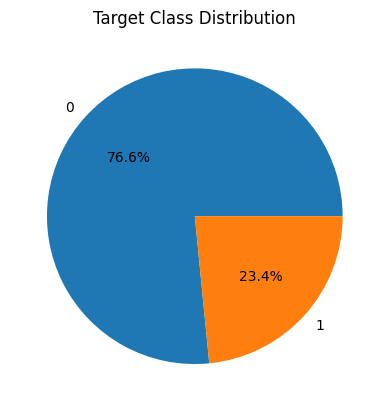

In [12]:
plt.pie(count['Target'], labels=count.index, autopct='%1.1f%%')
plt.title('Target Class Distribution')
plt.show()

## Majority-Minority Class Ratio: 

In binary classification, if one class constitutes more than 60-70% of the data, it is often considered imbalanced. If the majority class has over 90% of the data, it is usually highly imbalanced.

## Class Imbalance observed:

Since the target class distribution of our class is distributed at 76% vs 23%, we can conclude that our data is not perfectly balanced and we do observe a class imbalance wrt target variable of our data.

## Investigating Duplicate entries in the data

In [48]:
# Count the number of duplicate rows
num_duplicates = df_train.duplicated().sum()

# Print the count of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


### We observe that since there are no duplicate entries in the dataset, we can use this data for further analysis.

## Dropping irrelevant columns

In [13]:
df1 = df_train.copy()
df1.head()

id  age           job   marital education default  balance housing loan  \
0   8054   25        admin.    single  tertiary      no    11924      no   no   
1   5886   23     housemaid  divorced   primary      no      398     yes   no   
2   3542   74       unknown   married   unknown      no     2177     yes   no   
3  32553   60     housemaid   married  tertiary      no    26673     yes   no   
4  11020   32  entrepreneur    single   primary      no     6358      no  yes   

    contact  ...  campaign pdays  previous  poutcome  cd         generation  \
0   unknown  ...      32.0   144       8.0   failure   1        Millennials   
1  cellular  ...       4.0    15       4.0   unknown   1        Millennials   
2   unknown  ...       3.0   465       4.0   failure   0  Silent Generation   
3  cellular  ...      17.0   396       6.0   unknown   1      Older Boomers   
4   unknown  ...      28.0   314      24.0   failure   0        Millennials   

  state  zipcode Unnamed: 21 Unnamed: 22  
0    MT    59776         NaN         NaN  
1    OH    45438         NaN         NaN  
2    PR      776         NaN         NaN  
3    WI    54537         NaN         NaN  
4    MP    96952         NaN         NaN  

[5 rows x 23 columns]

In [14]:
## Dropping cd, id, Unnamed: 21, Unnamed: 22 as they do not provide any useful information to the data.

df2 = df1.drop(columns=["id", "Unnamed: 21", "Unnamed: 22","zipcode"])
df2.head()

age           job   marital education default  balance housing loan  \
0   25        admin.    single  tertiary      no    11924      no   no   
1   23     housemaid  divorced   primary      no      398     yes   no   
2   74       unknown   married   unknown      no     2177     yes   no   
3   60     housemaid   married  tertiary      no    26673     yes   no   
4   32  entrepreneur    single   primary      no     6358      no  yes   

    contact  day month  duration  campaign  pdays  previous poutcome  cd  \
0   unknown   13   jan      4102      32.0    144       8.0  failure   1   
1  cellular   20   jun        66       4.0     15       4.0  unknown   1   
2   unknown   19   may        10       3.0    465       4.0  failure   0   
3  cellular    6   oct      3902      17.0    396       6.0  unknown   1   
4   unknown   15   feb      3563      28.0    314      24.0  failure   0   

          generation state  
0        Millennials    MT  
1        Millennials    OH  
2  Silent Generation    PR  
3      Older Boomers    WI  
4        Millennials    MP

# Feature Distribution

## Continuous variables distribution plots

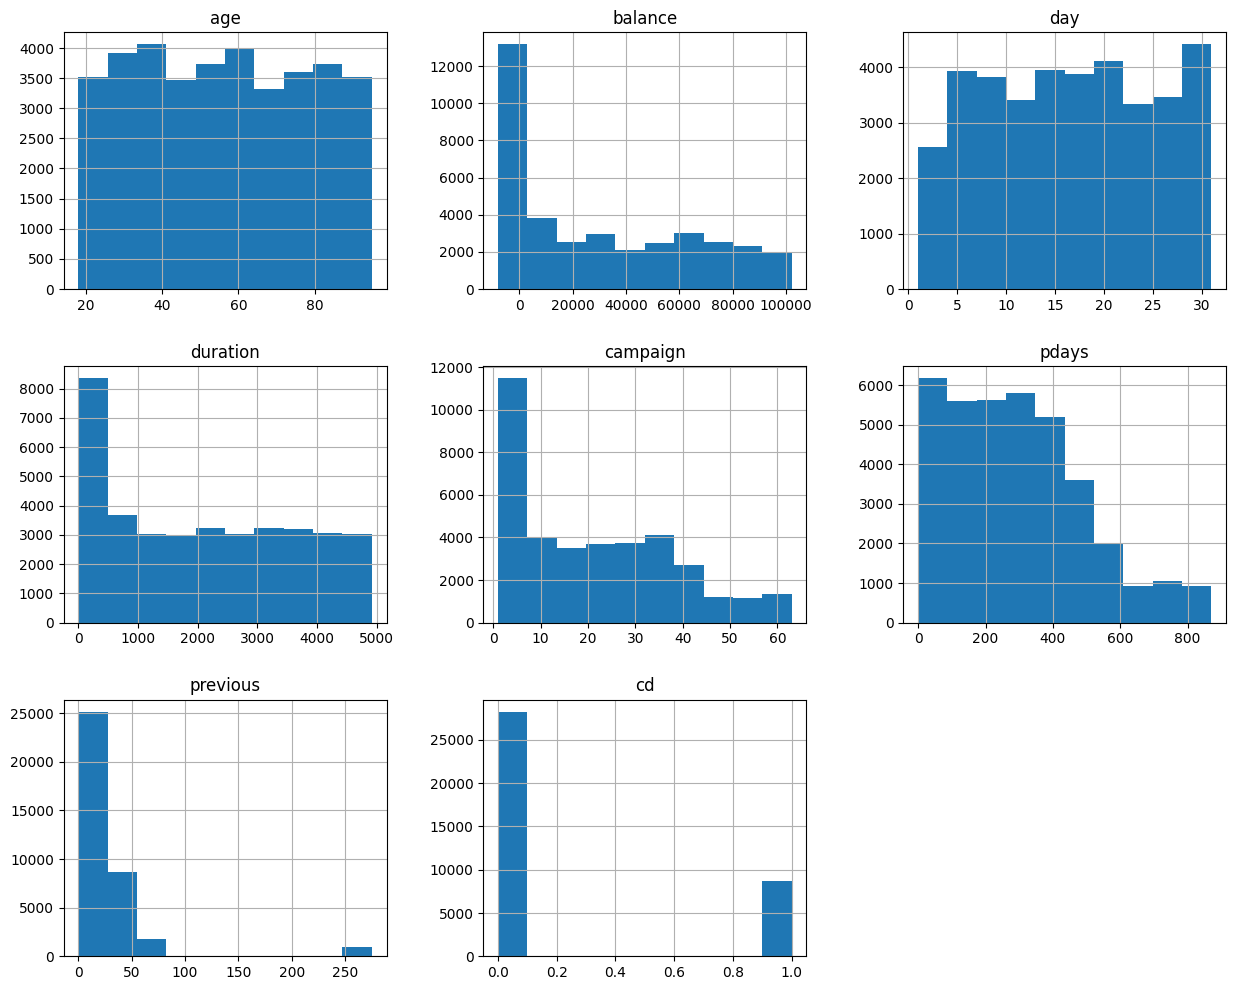

In [15]:
df2.hist(figsize=(15,12))
plt.show()

#### All the continuous variable plots are mostly right skwed or evenly distributed which clearly tells us that the data is not normally distributed.

#### We will need to take a log of these values to centre them around the mean.

#### Distribution of the duration of contact is highest at 0-600 seconds and then equally distributed across 600-5000 seconds.

#### The above plot shows that the distribution of the contacts performed during the campaign is highest between 0-5

#### The above plot shows that the number of days since client was last contacted from previous campaign is distributed more between the 0-500 days range.

# Distribution of Categorical Variables

In [16]:
df2['job'] = df2['job'].replace({'management': 'MANAGEMENT'})
df2['job'] = df2['job'].replace({'blue-collar': 'BLUE-COLLAR'})
df2['job'] = df2['job'].replace({'technician': 'TECHNICIAN'})
df2['job'] = df2['job'].replace({'services': 'SERVICES'})
df2['job'] = df2['job'].replace({'admin.': 'ADMIN'})
df2['job'] = df2['job'].replace({'ADMIN.': 'ADMIN'})
df2['job'] = df2['job'].replace({'retired': 'RETIRED'})
df2['job'] = df2['job'].replace({'self-employed': 'SELF-EMPLOYED'})
df2['job'] = df2['job'].replace({'entrepreneur': 'ENTREPRENEUR'})
df2['job'] = df2['job'].replace({'unemployed': 'UNEMPLOYED'})
df2['job'] = df2['job'].replace({'housemaid': 'HOUSEMAID'})
df2['job'] = df2['job'].replace({'student': 'STUDENT'})
df2['job'] = df2['job'].replace({'unknown': 'UNKNOWN'})

In [17]:
import pandas as pd



# Iterate through columns and identify categorical columns
categorical_columns = []
for column in df2.columns:
    if df2[column].dtype == 'object':
        categorical_columns.append(column)

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'generation', 'state']


/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


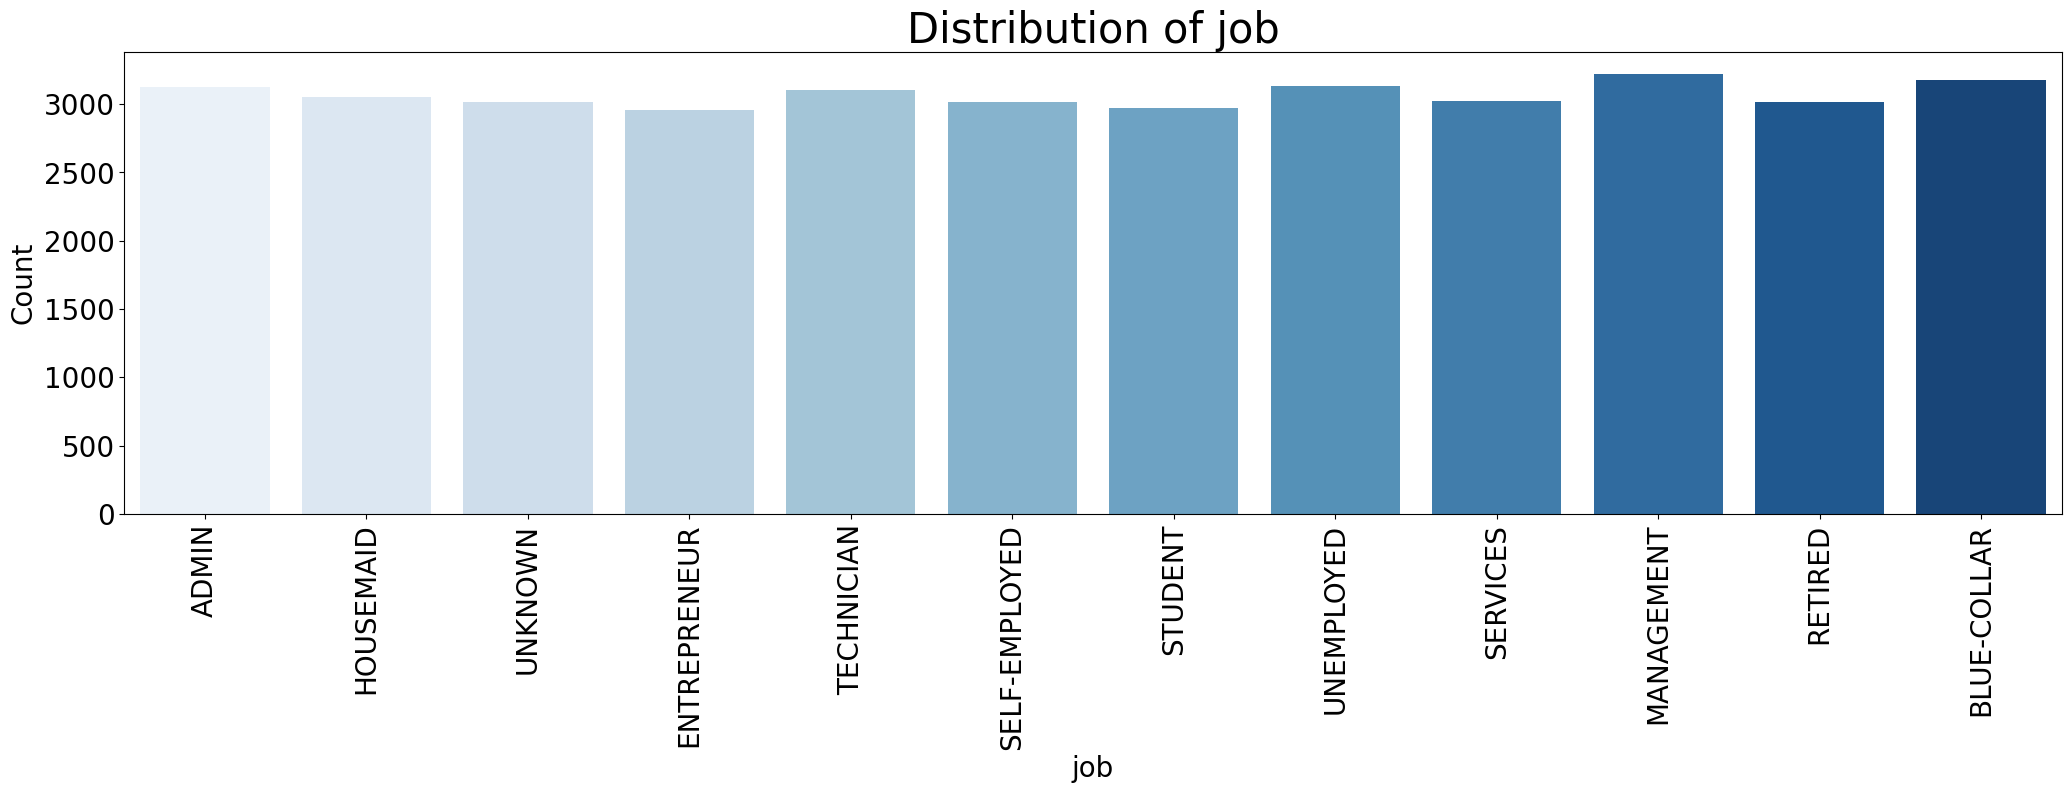

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


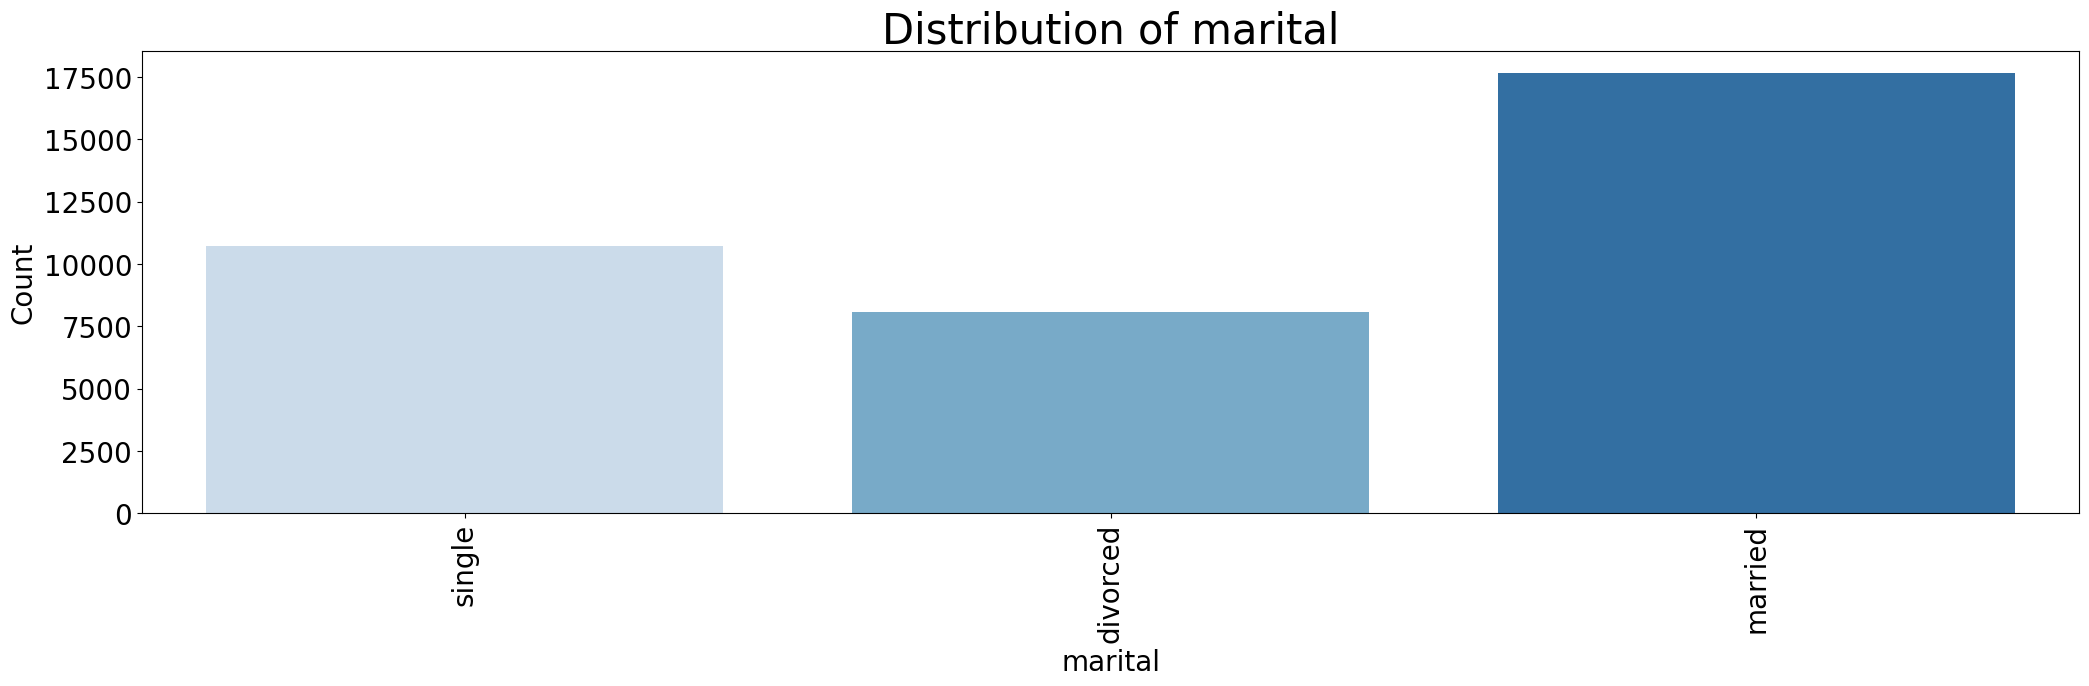

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


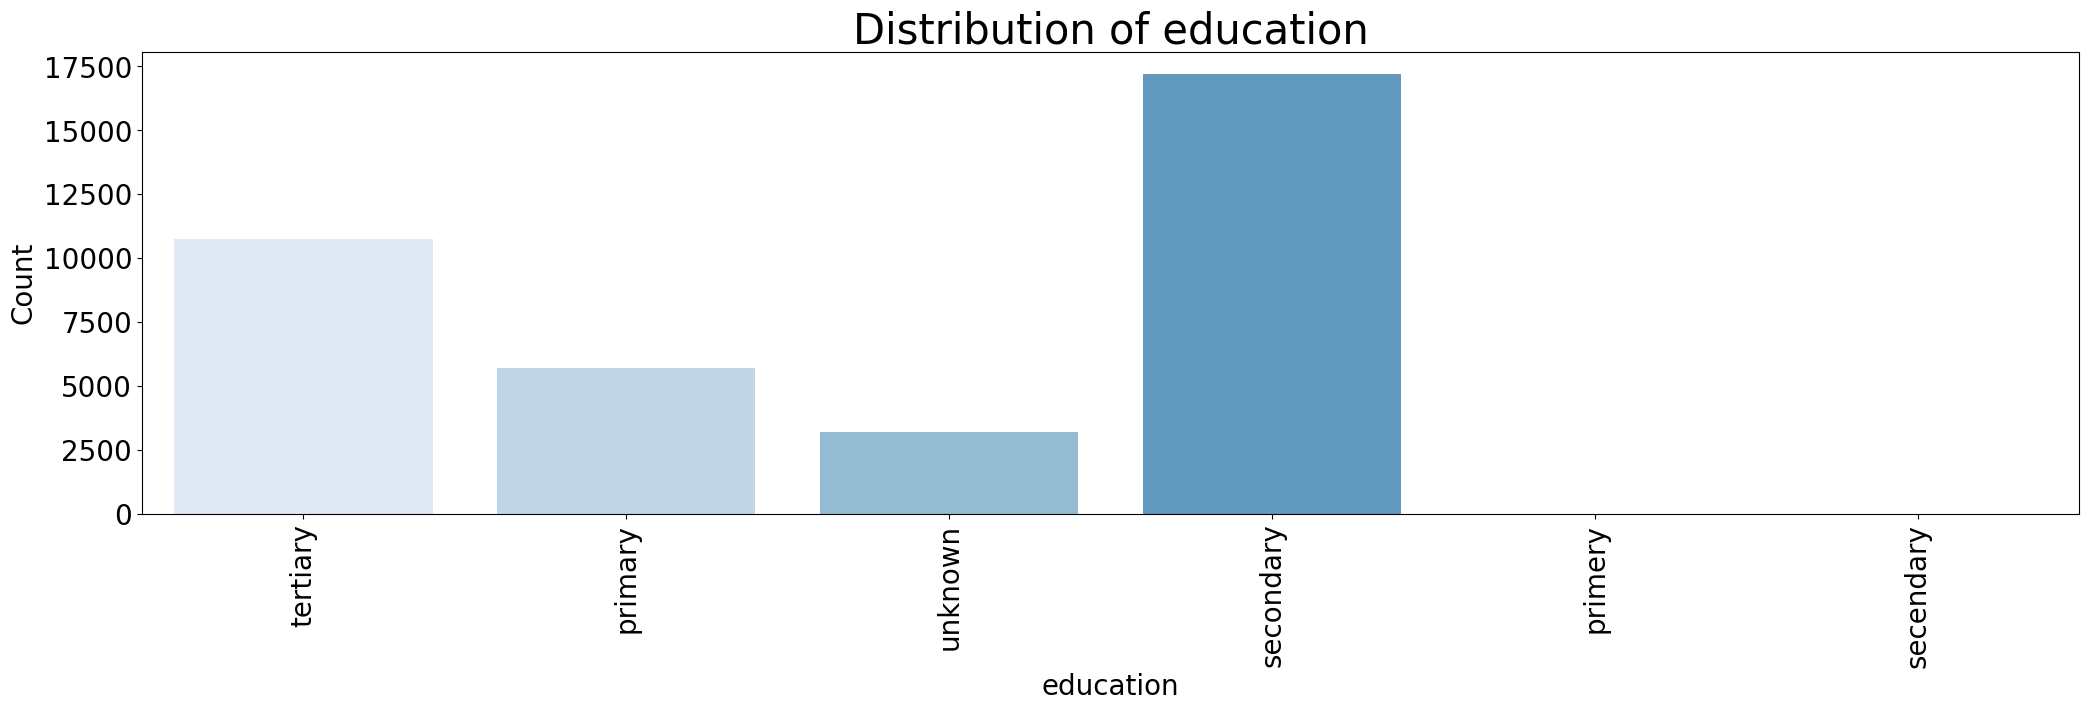

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


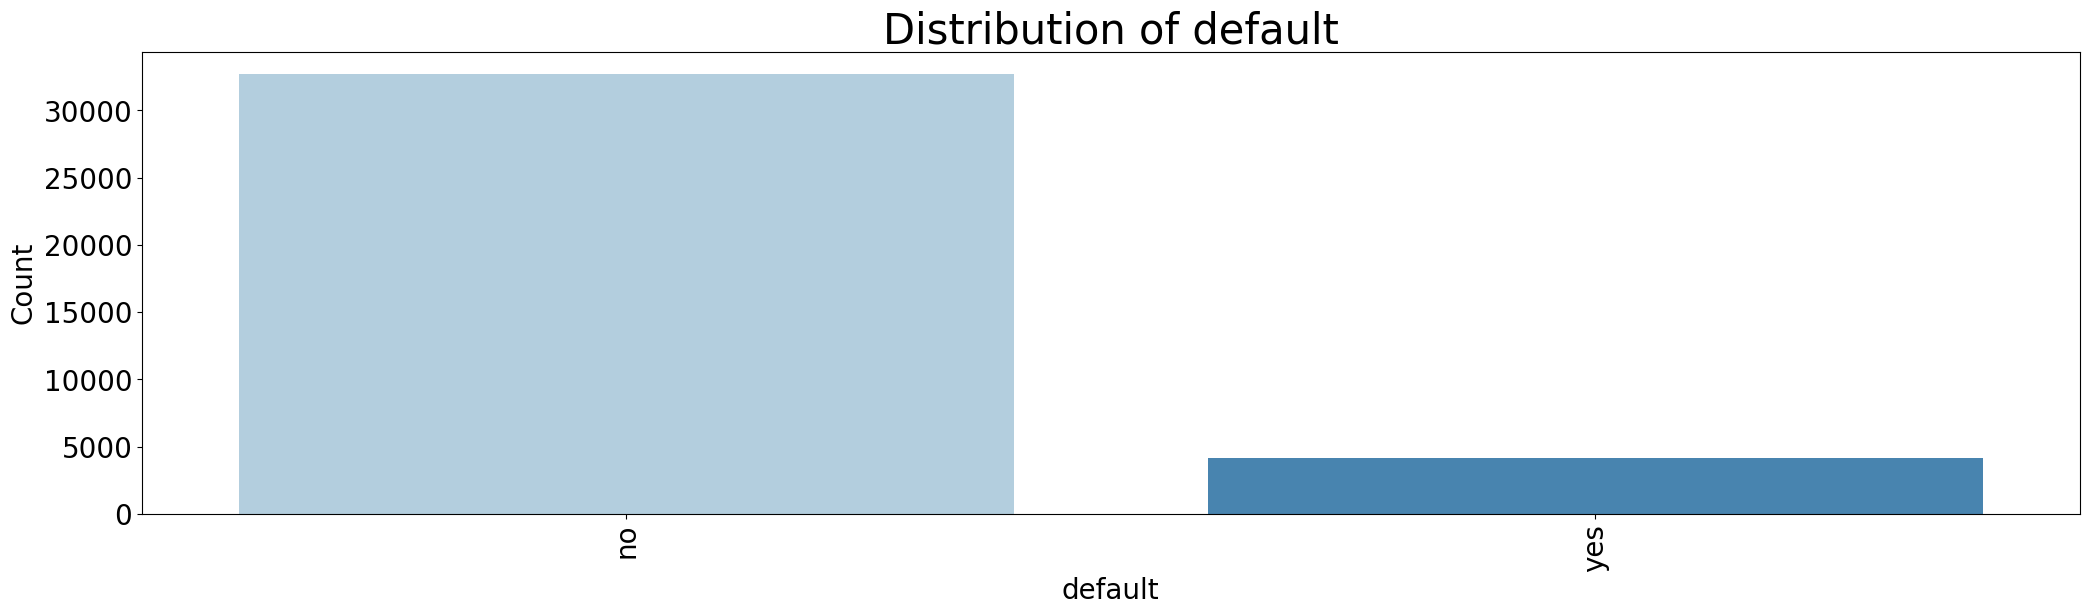

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


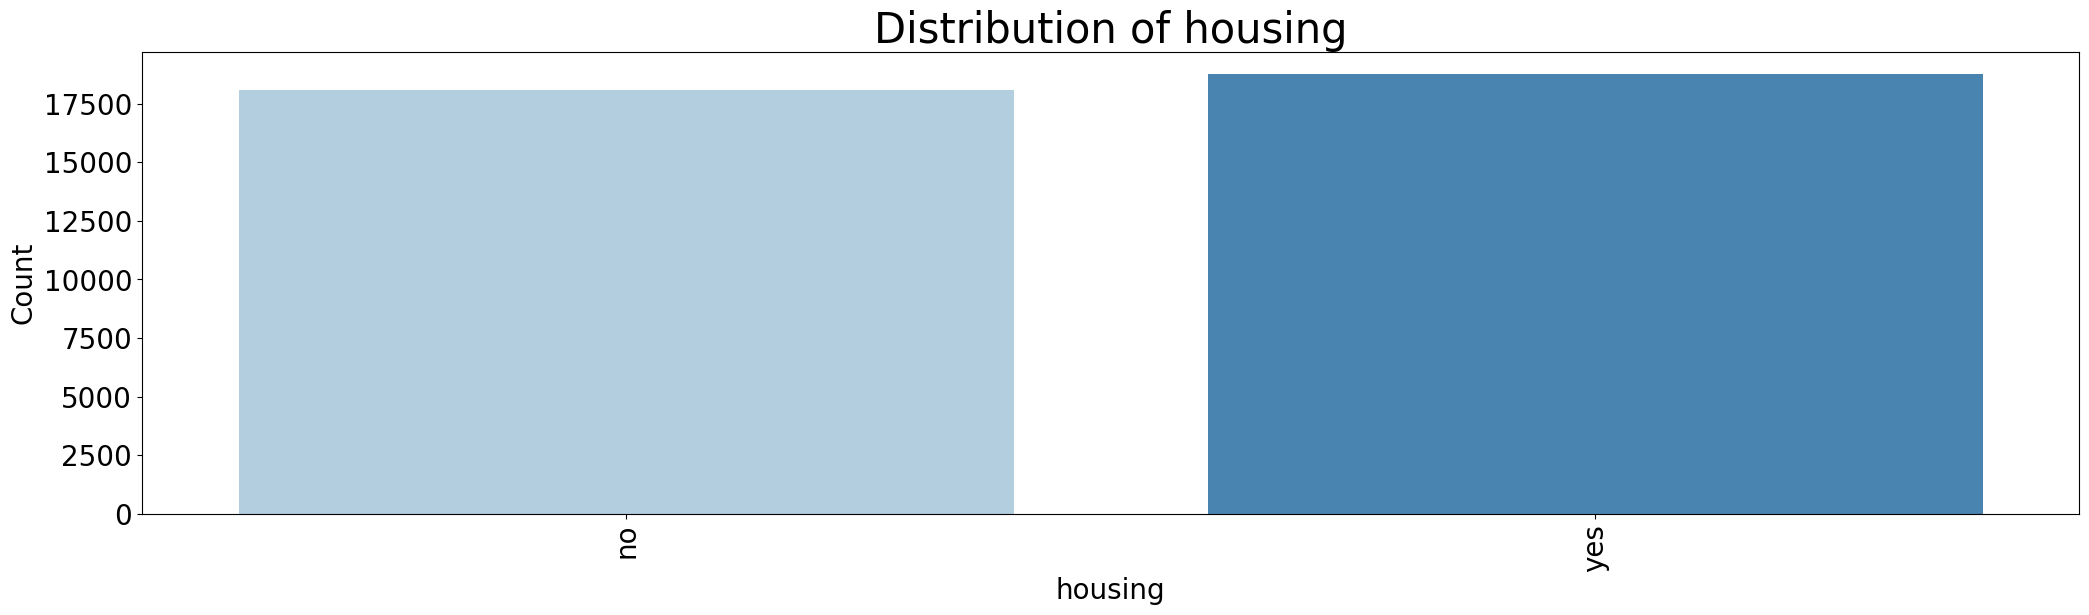

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


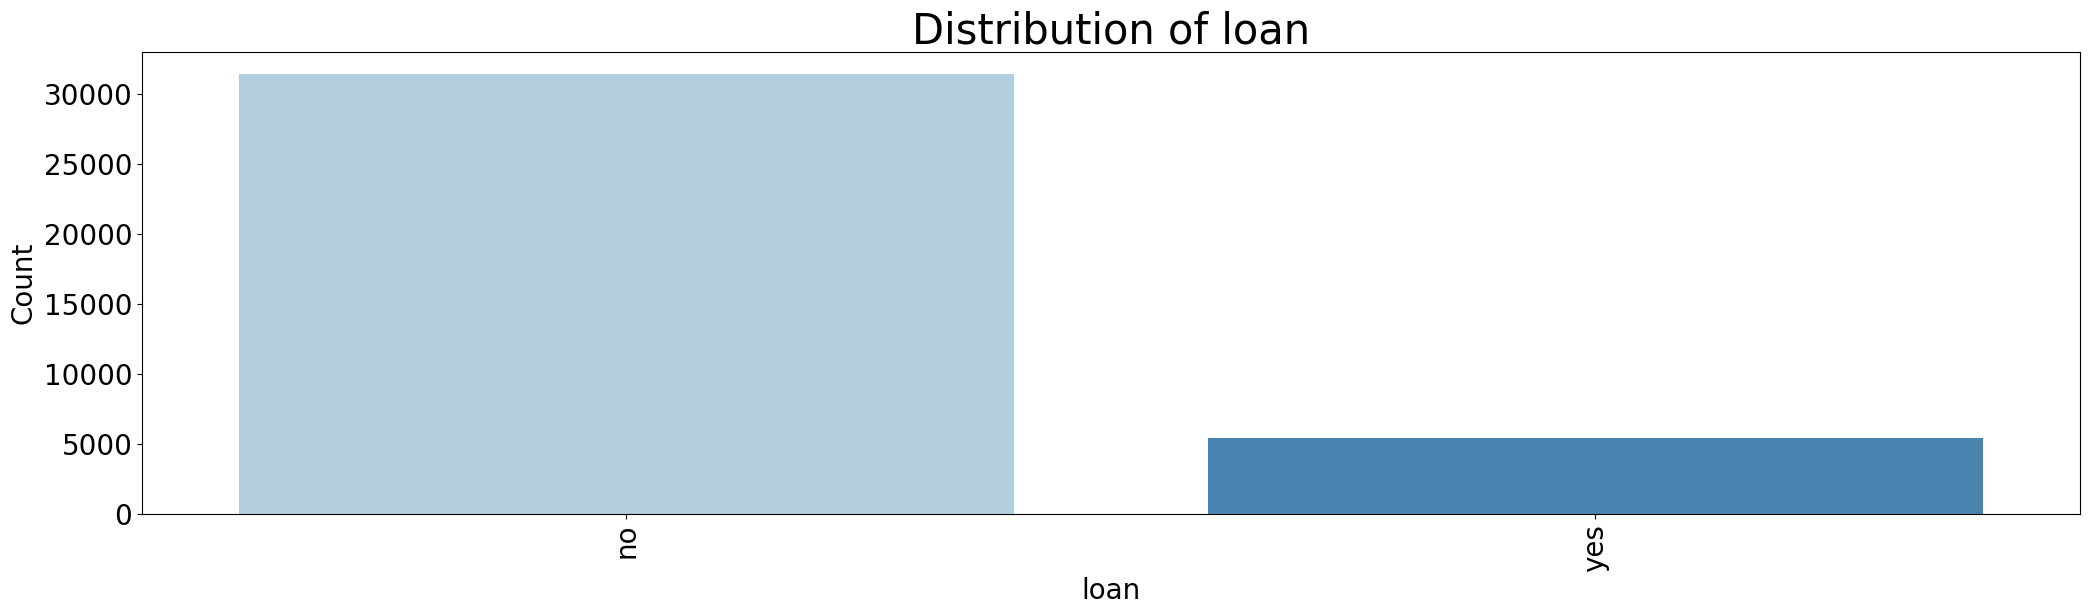

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


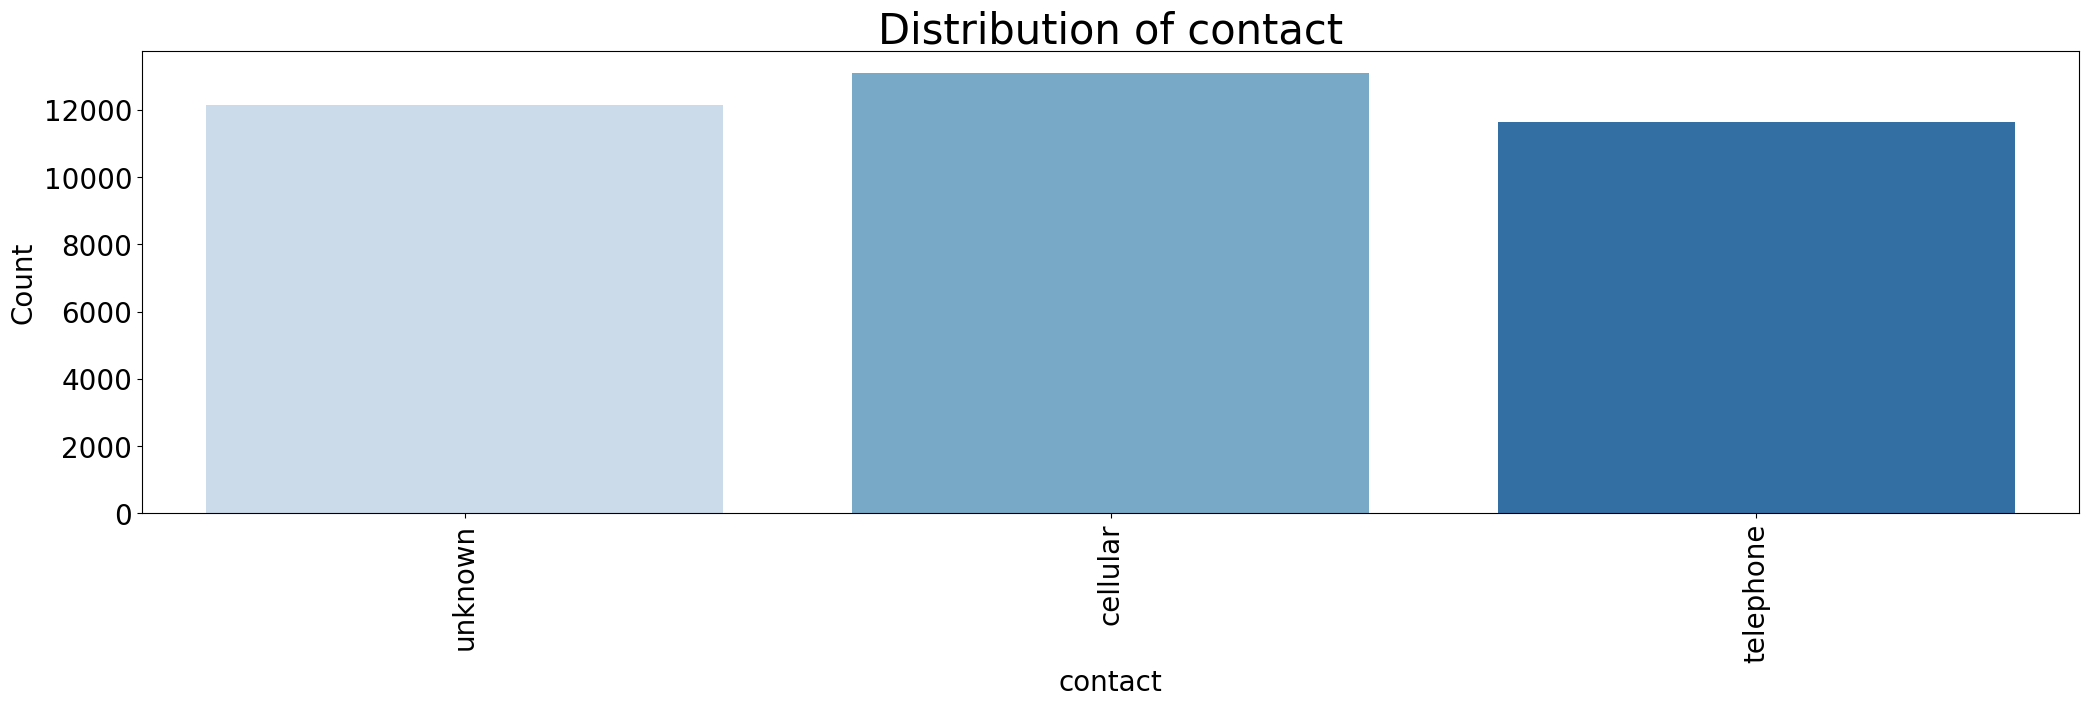

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


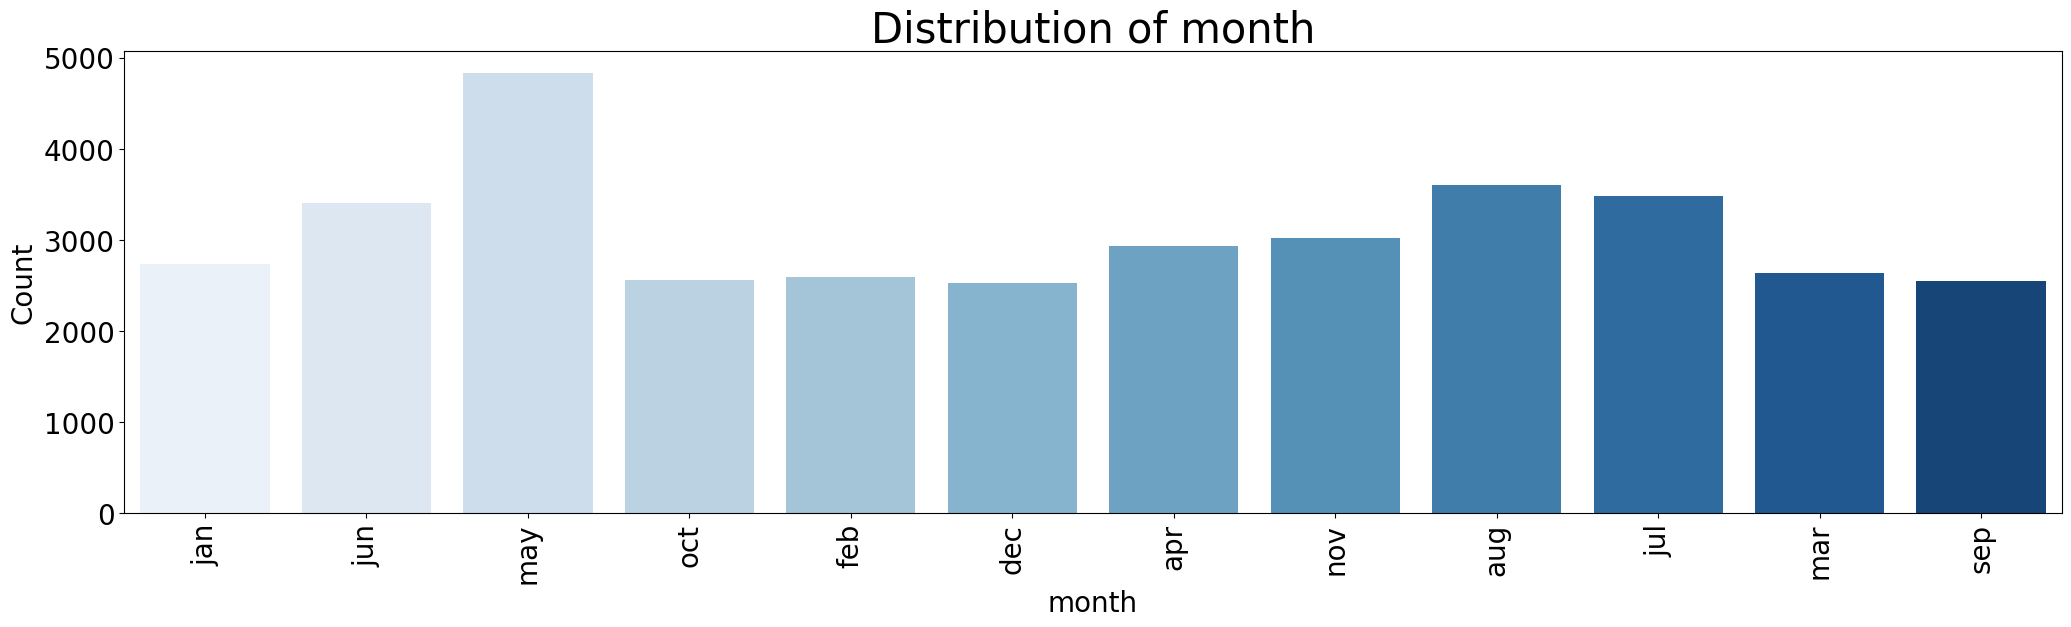

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


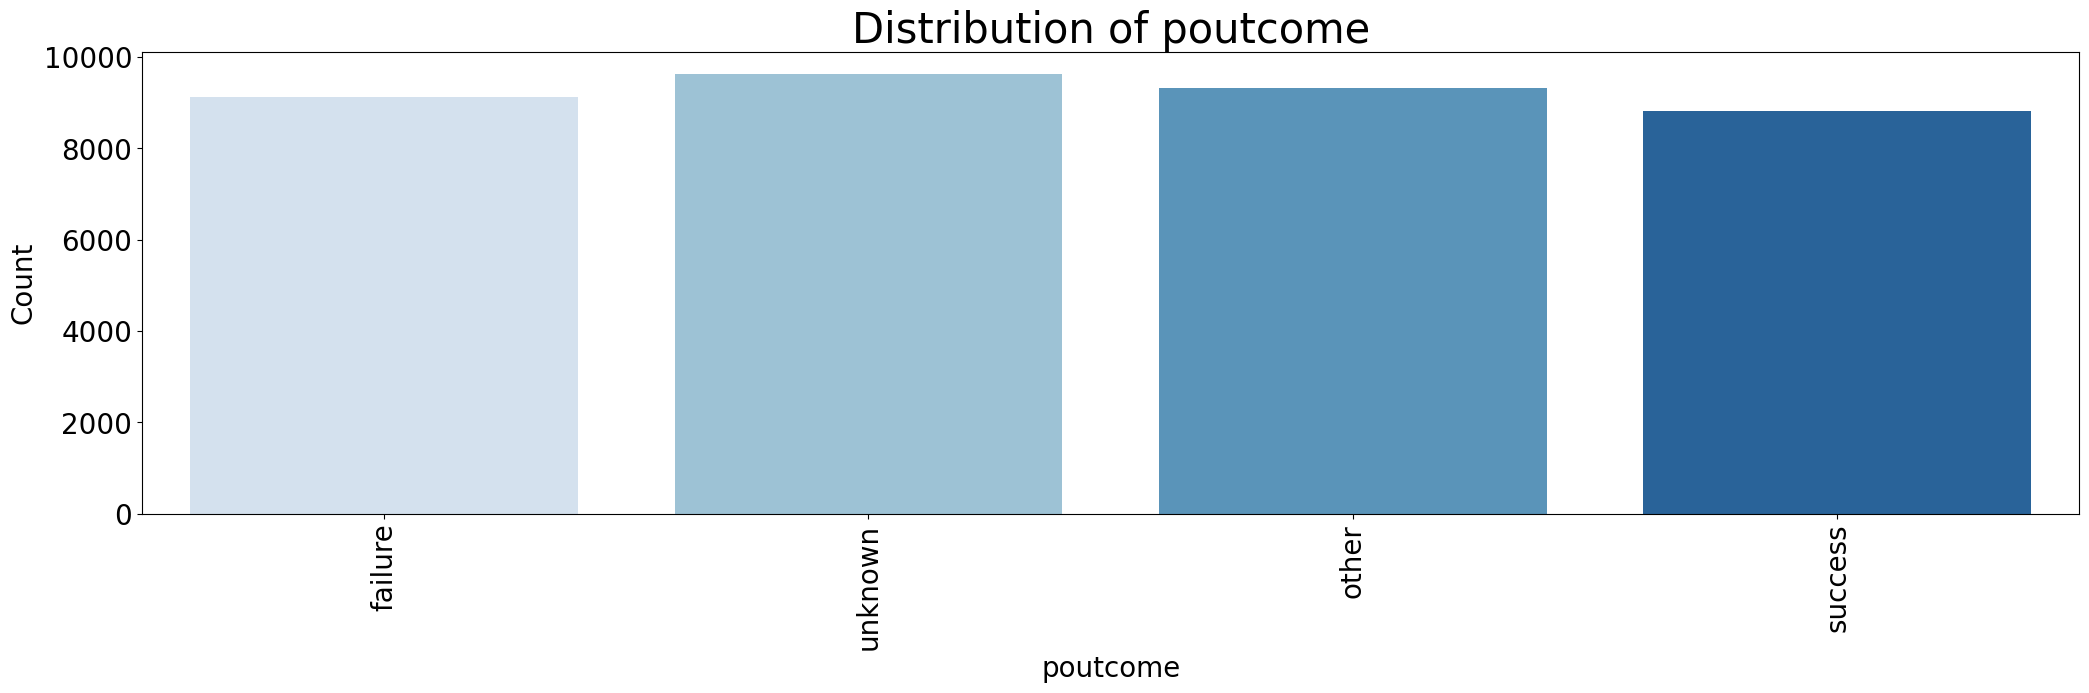

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


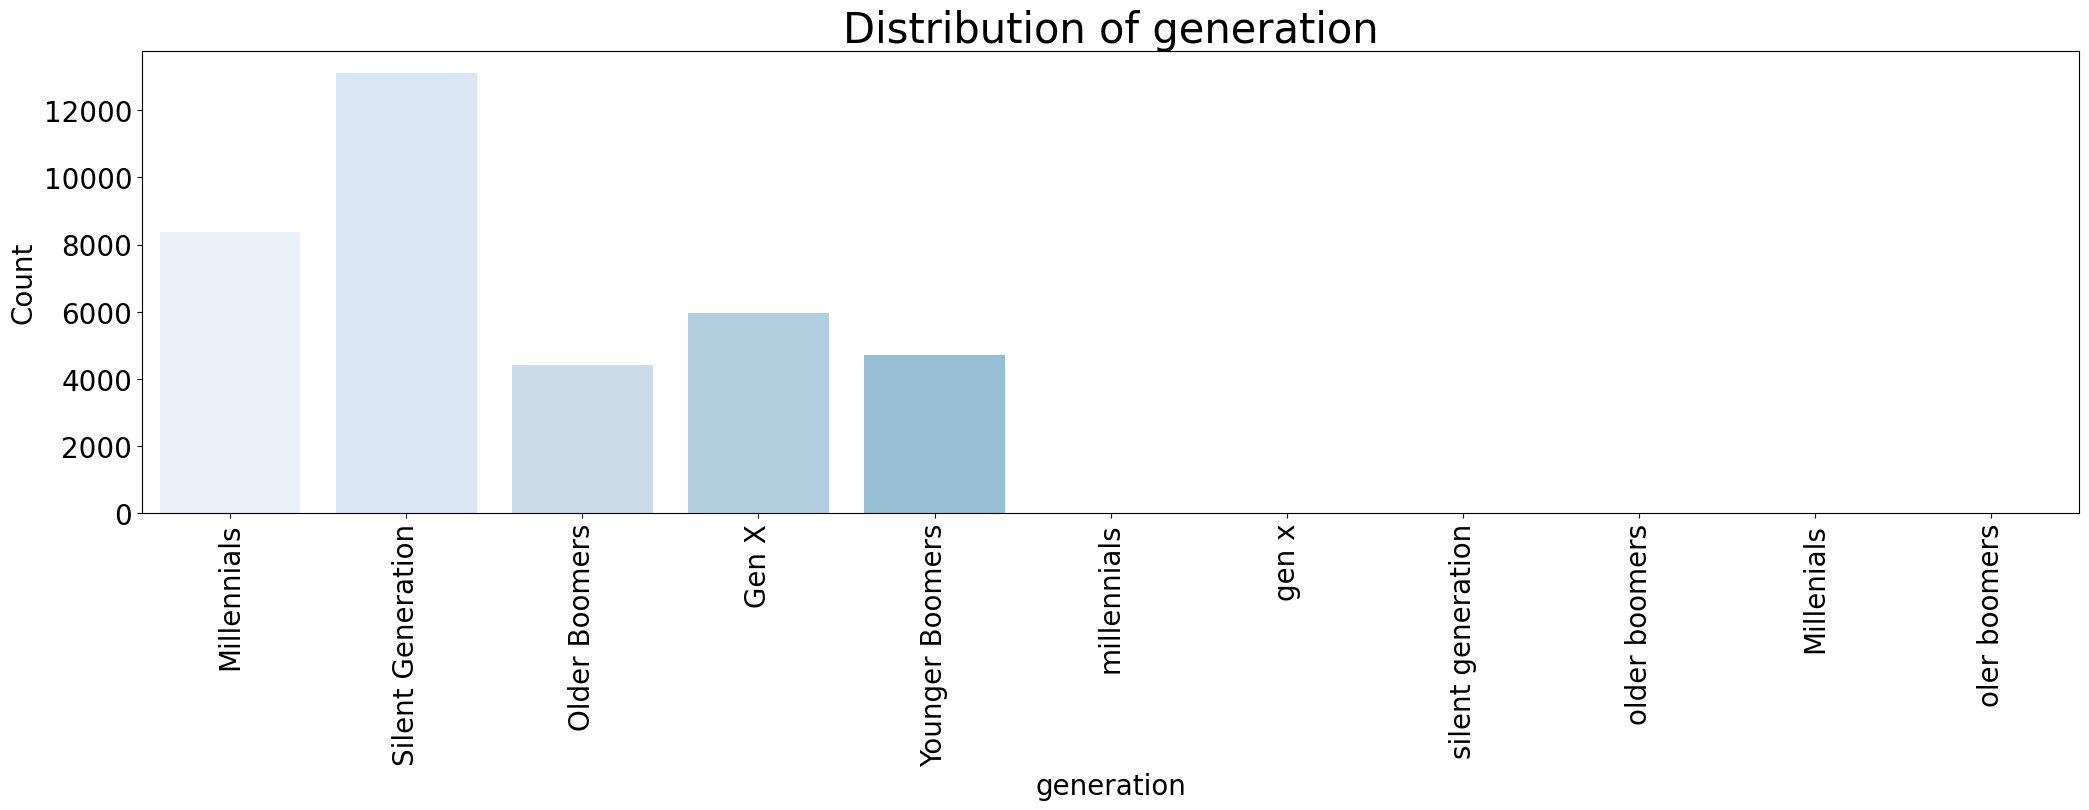

/tmp/ipykernel_15/113489118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot


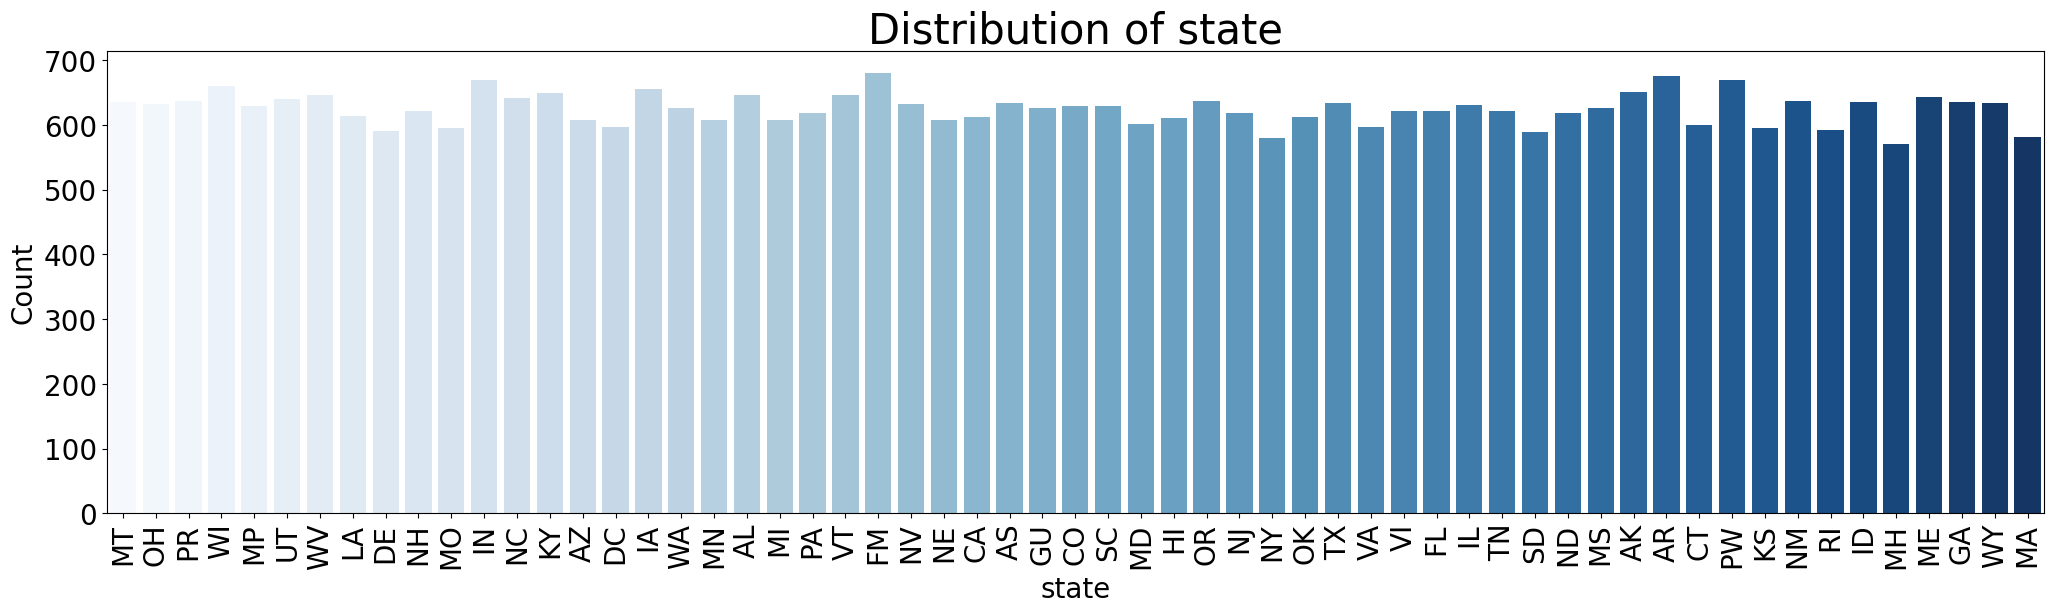

In [26]:
for column in categorical_columns:
    plt.figure(figsize=(25, 6))  # Set the figure size
    sns.countplot(data=df2, x=column, palette ="Blues")  # Create a count plot
    plt.title(f'Distribution of {column}', fontsize = 30)  # Set the plot title
    plt.xticks(size = 20, rotation=90)
    plt.yticks(size = 20)
    plt.ylabel('Count', fontsize=20)
    plt.xlabel(column, fontsize=20) 
    plt.show()

## Distribution of Categorial variables and Direct Deposit

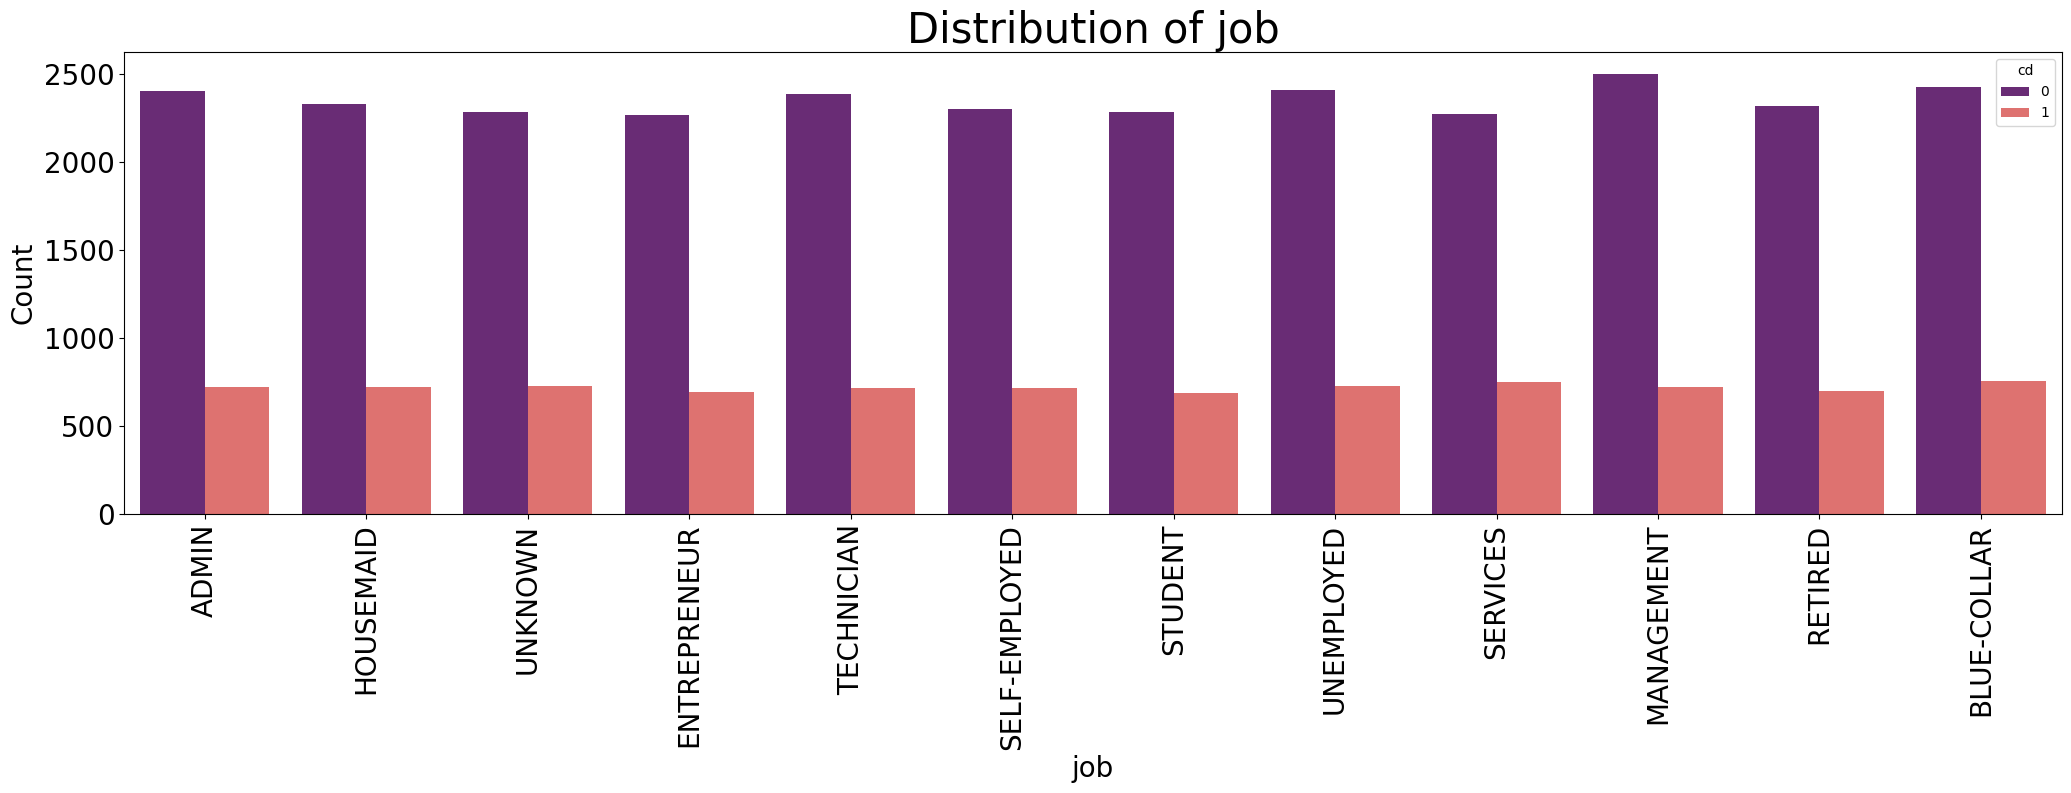

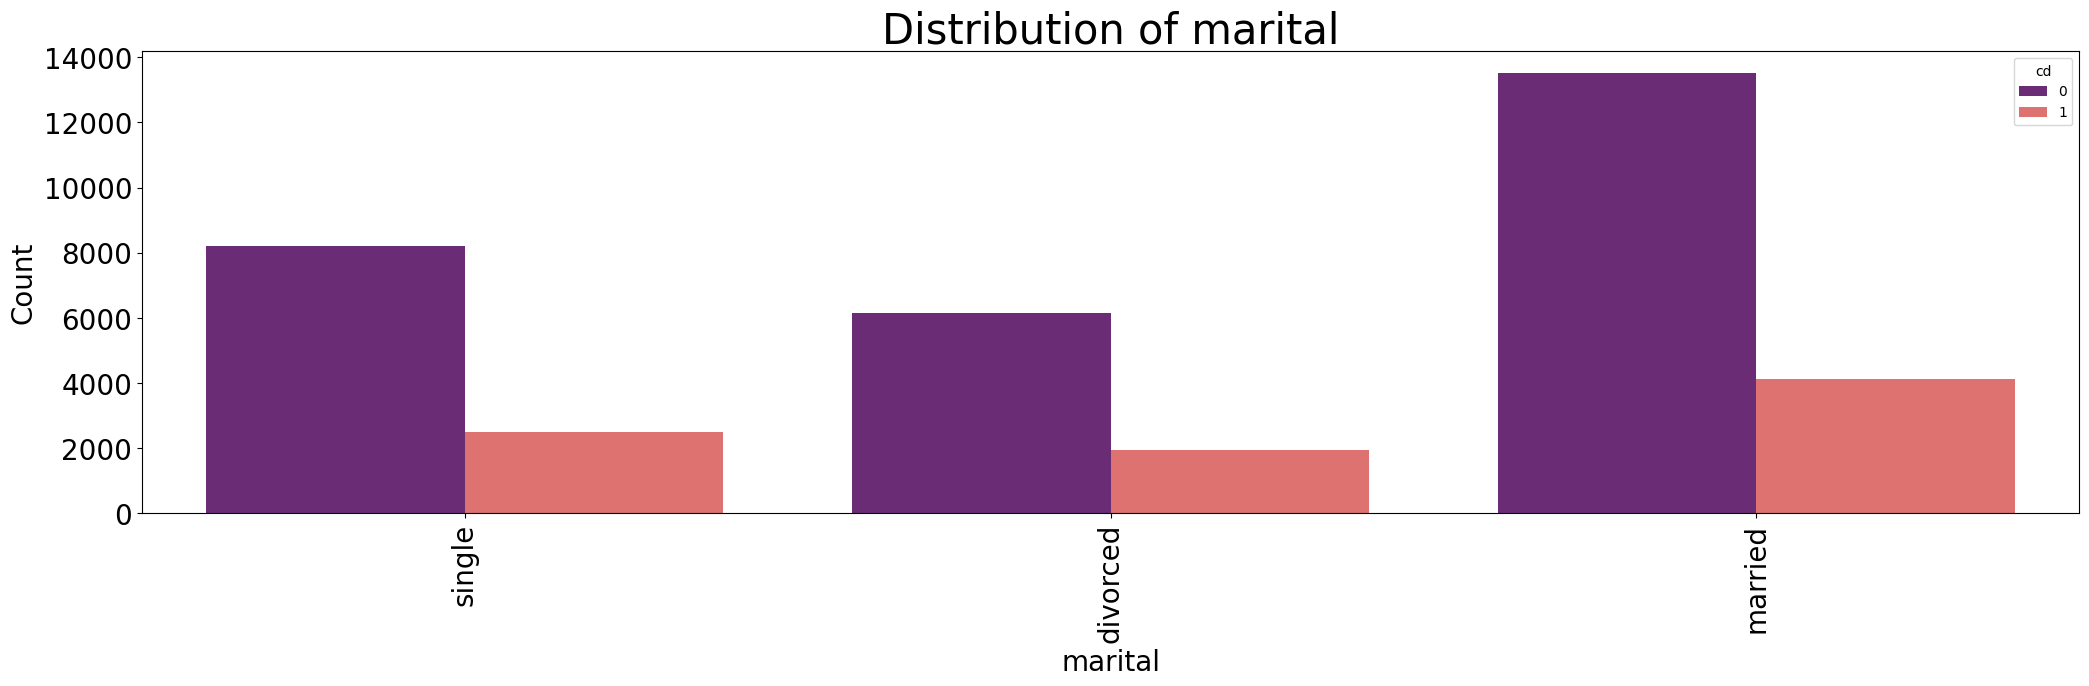

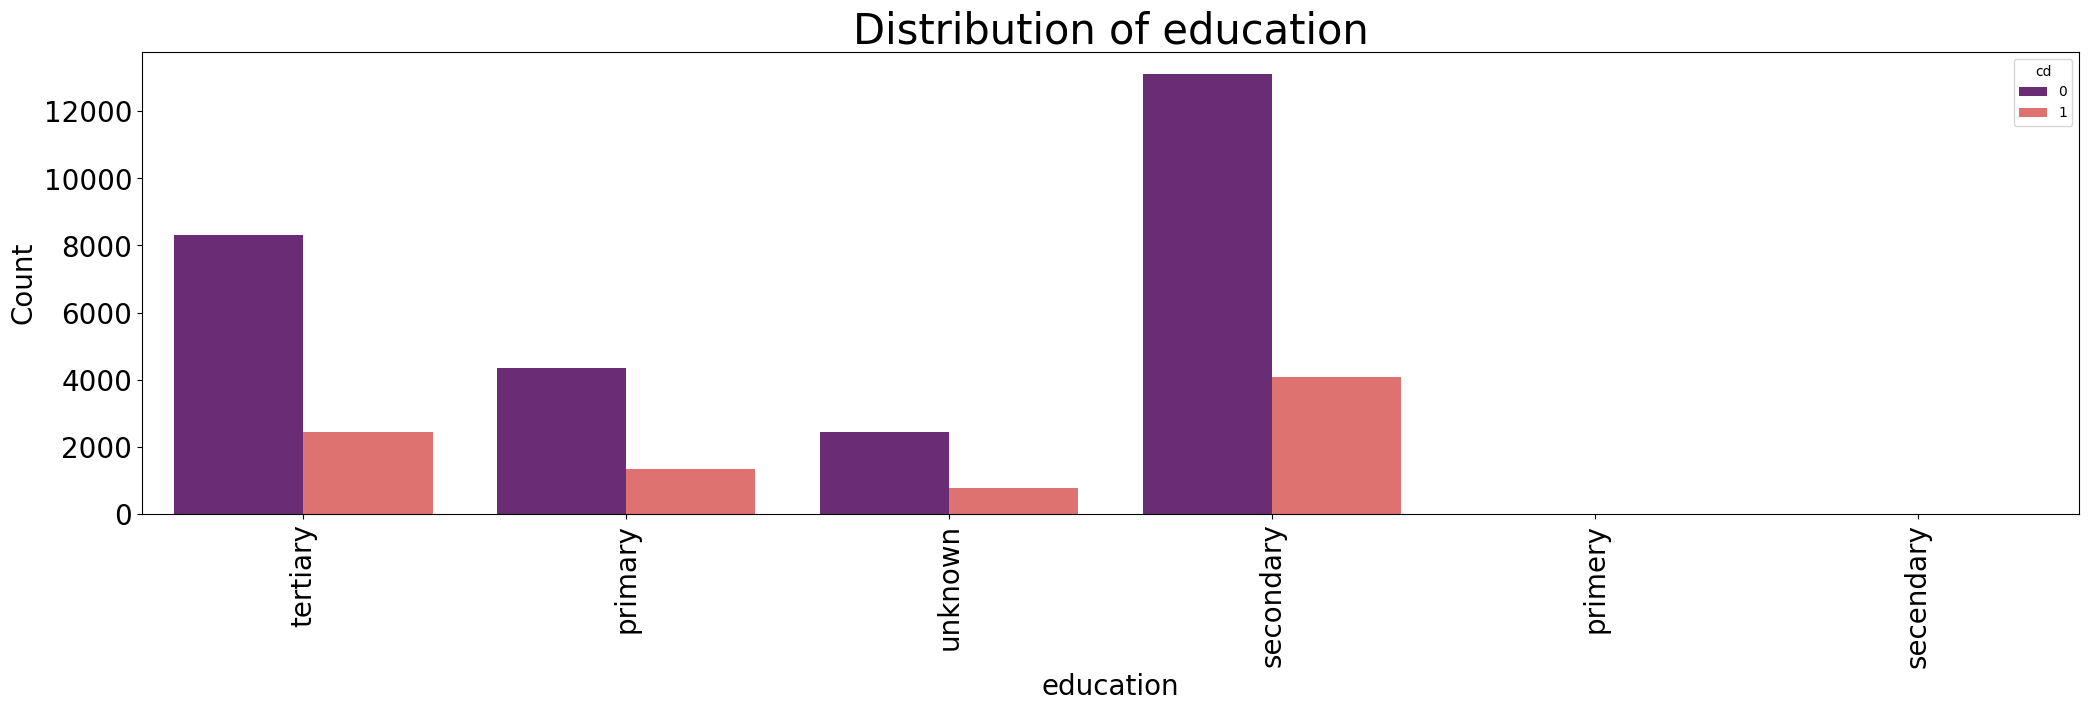

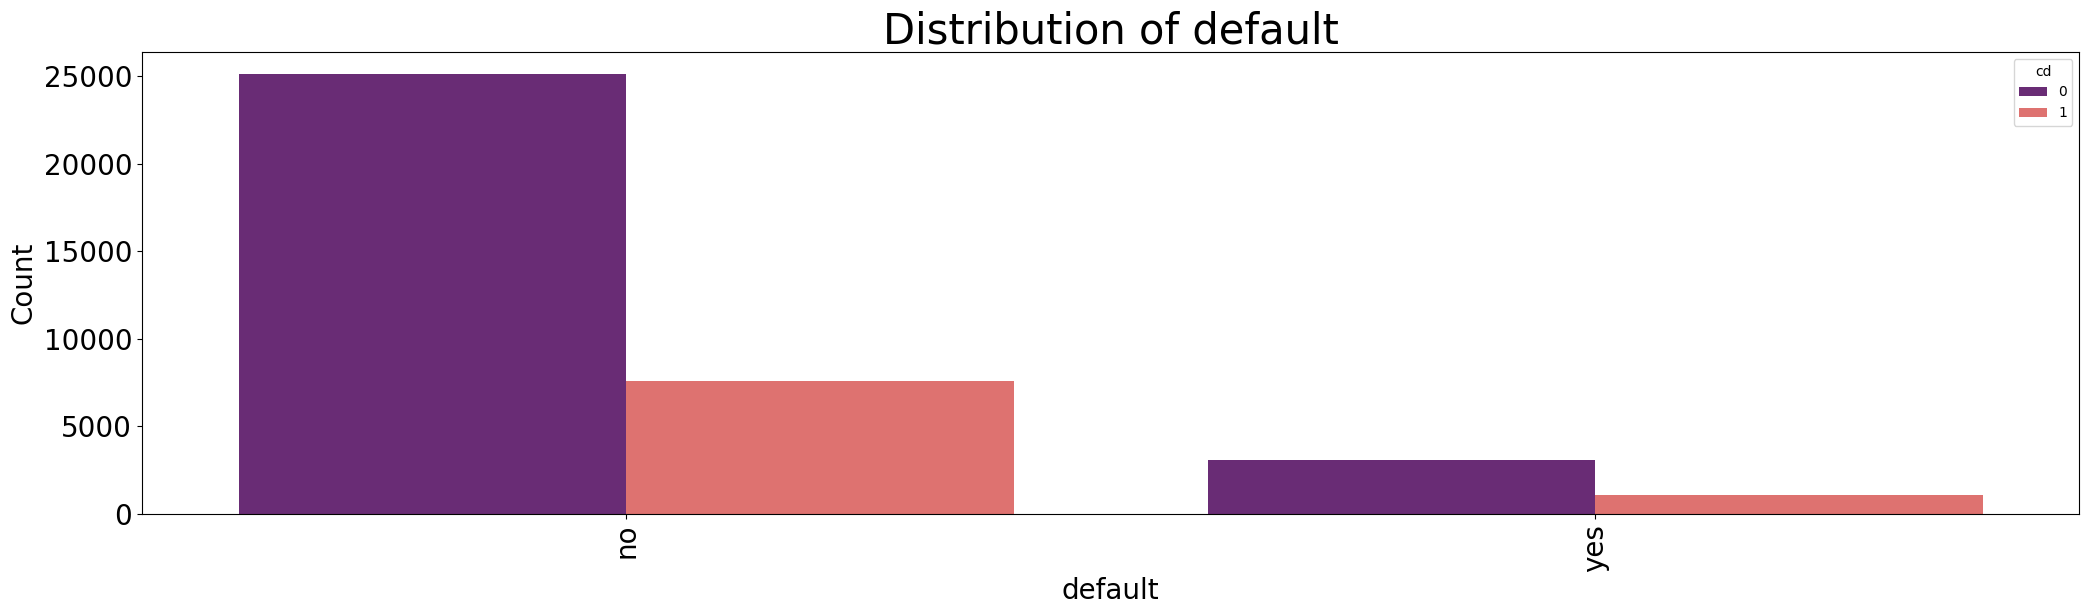

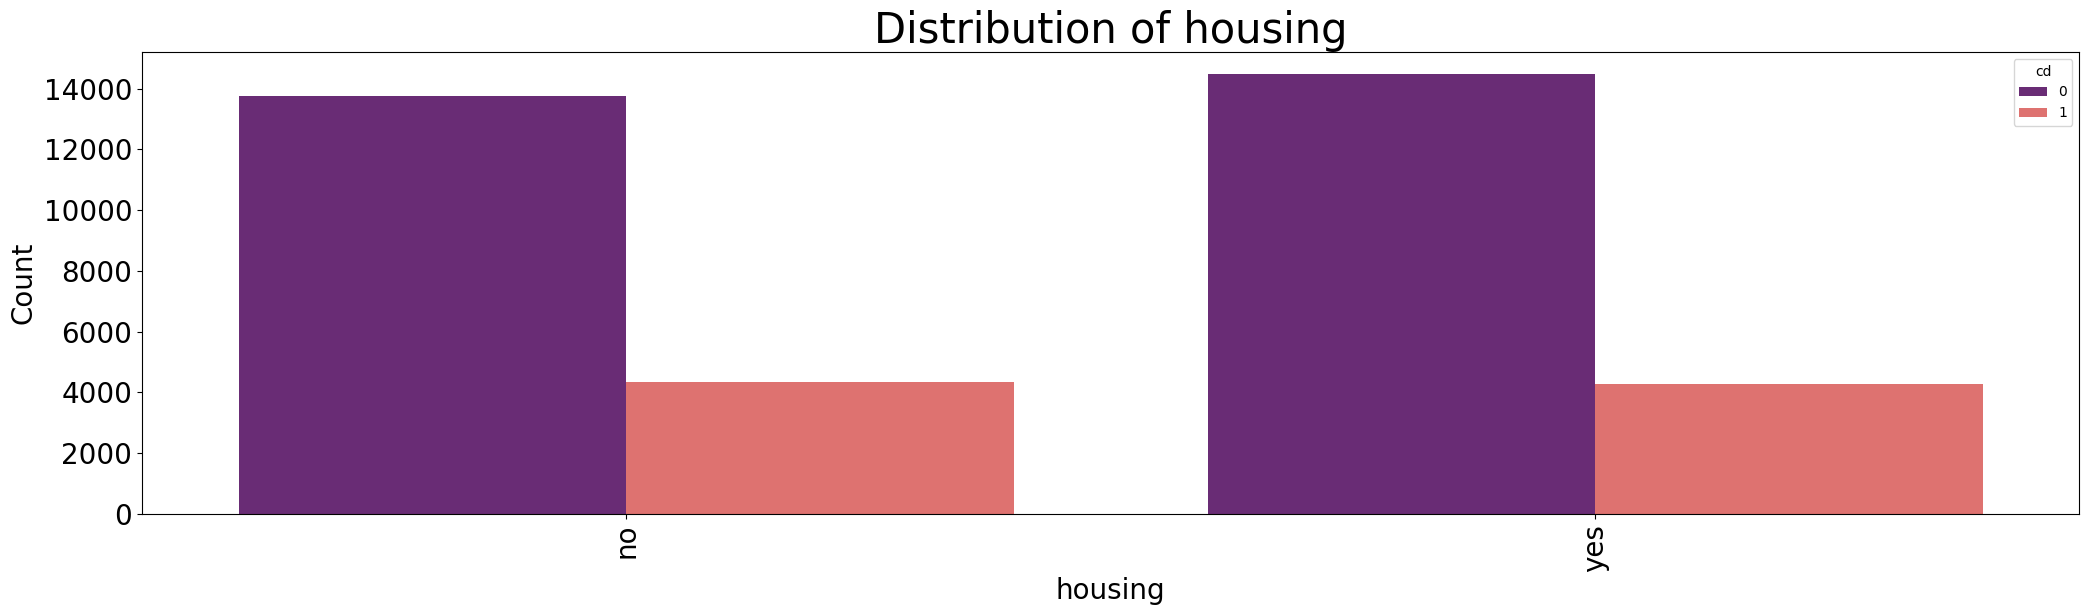

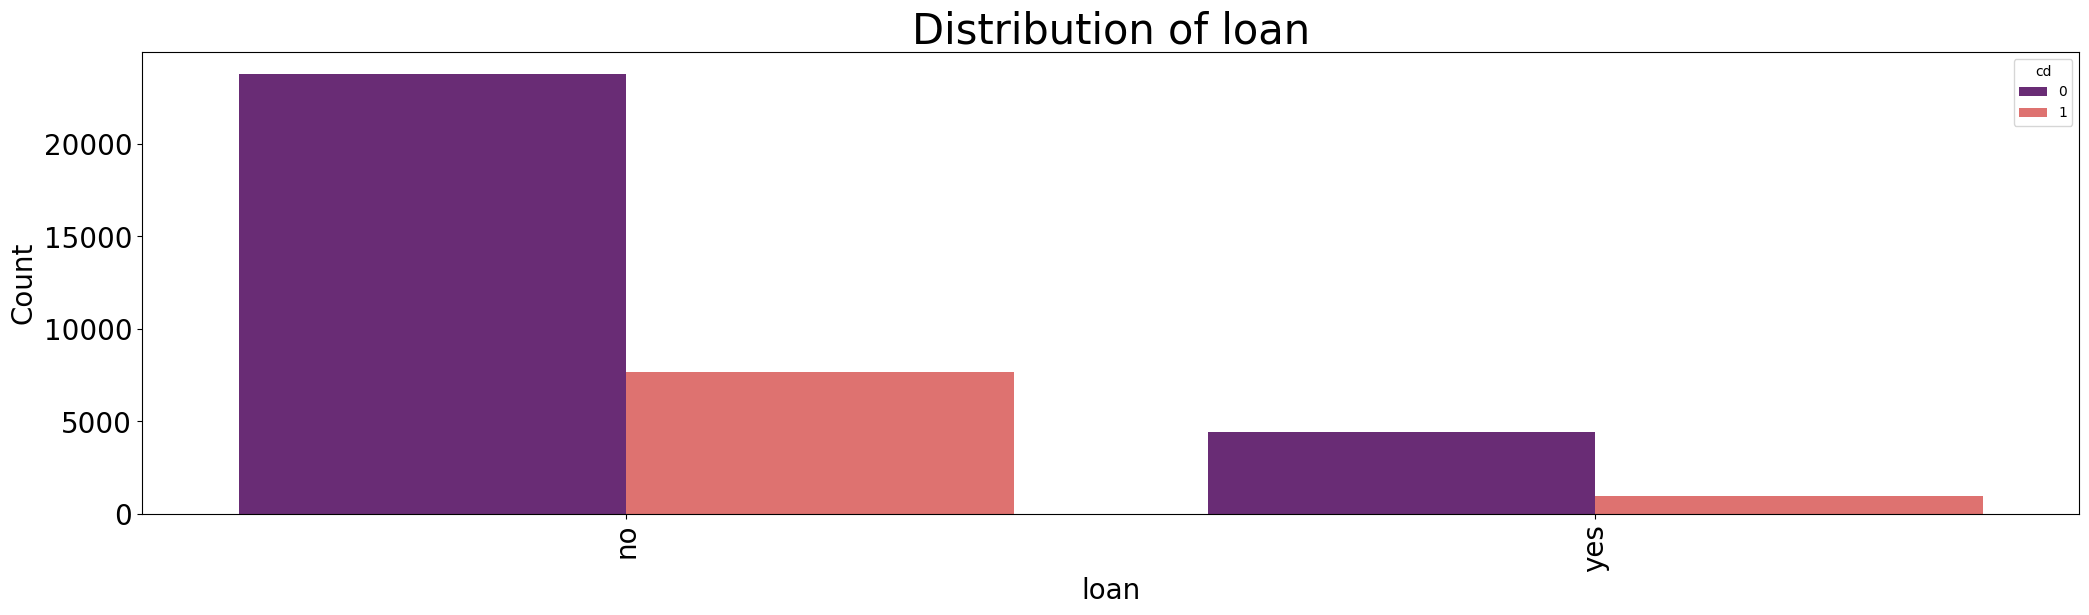

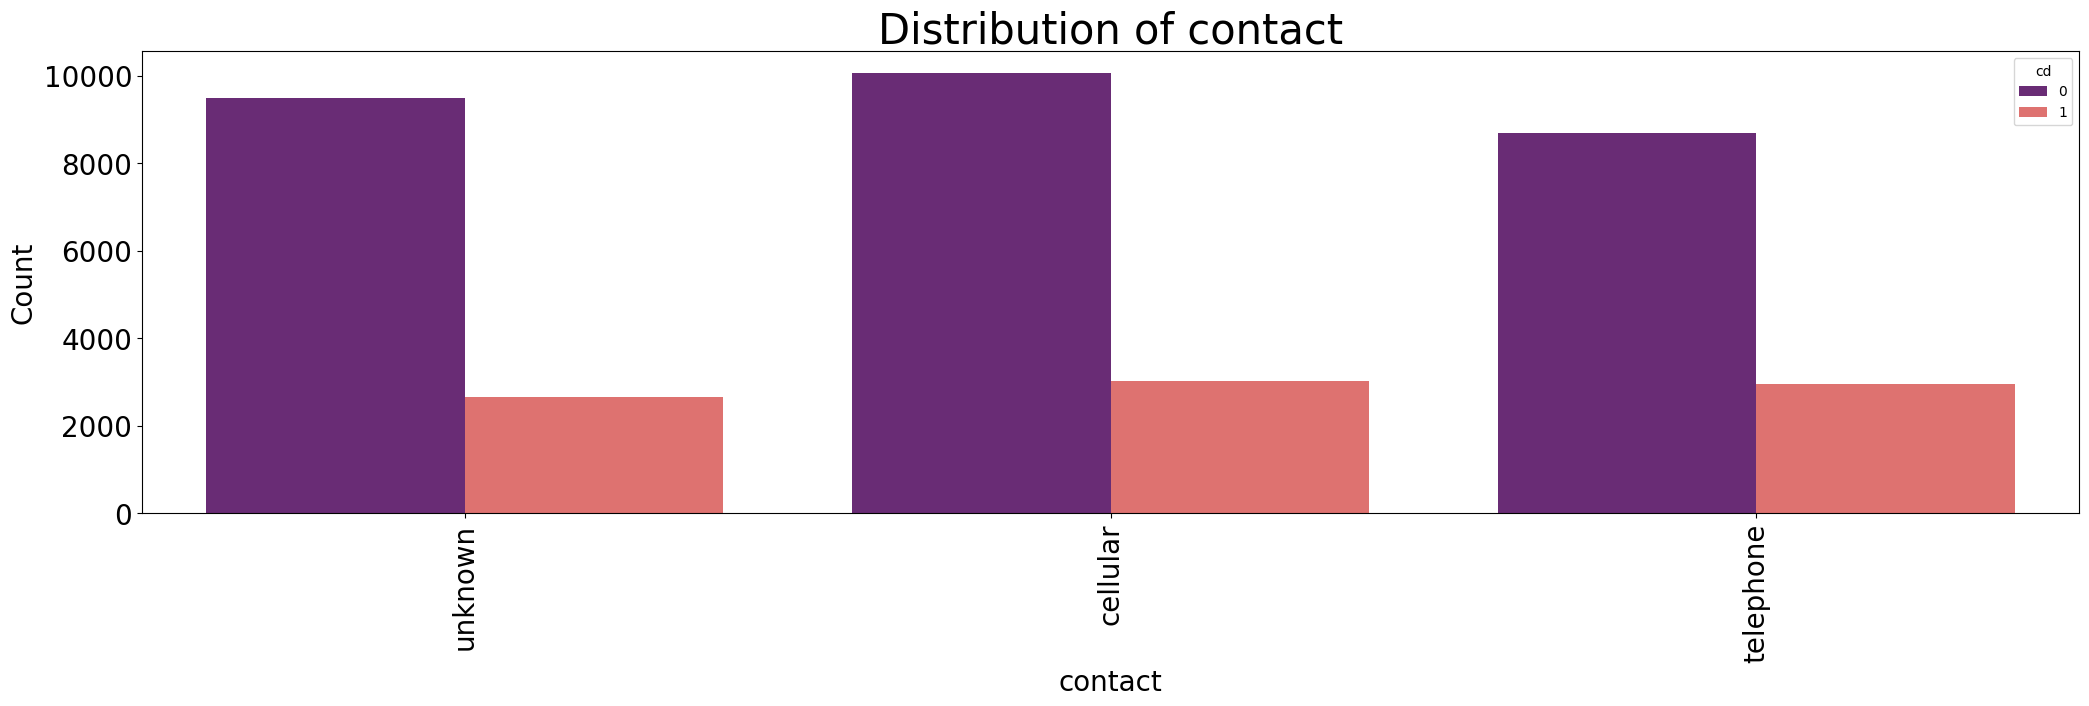

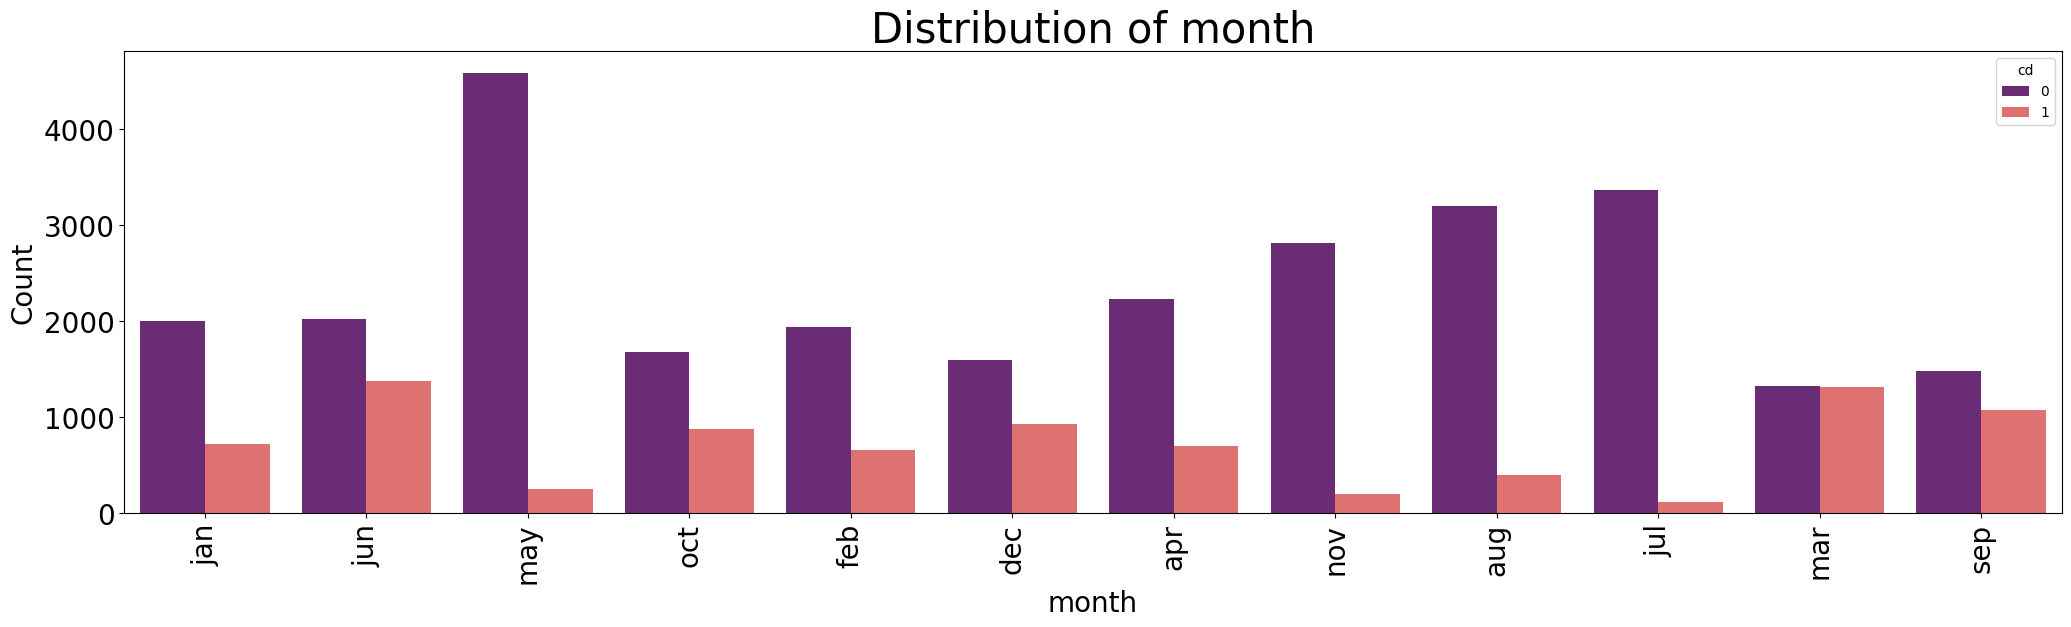

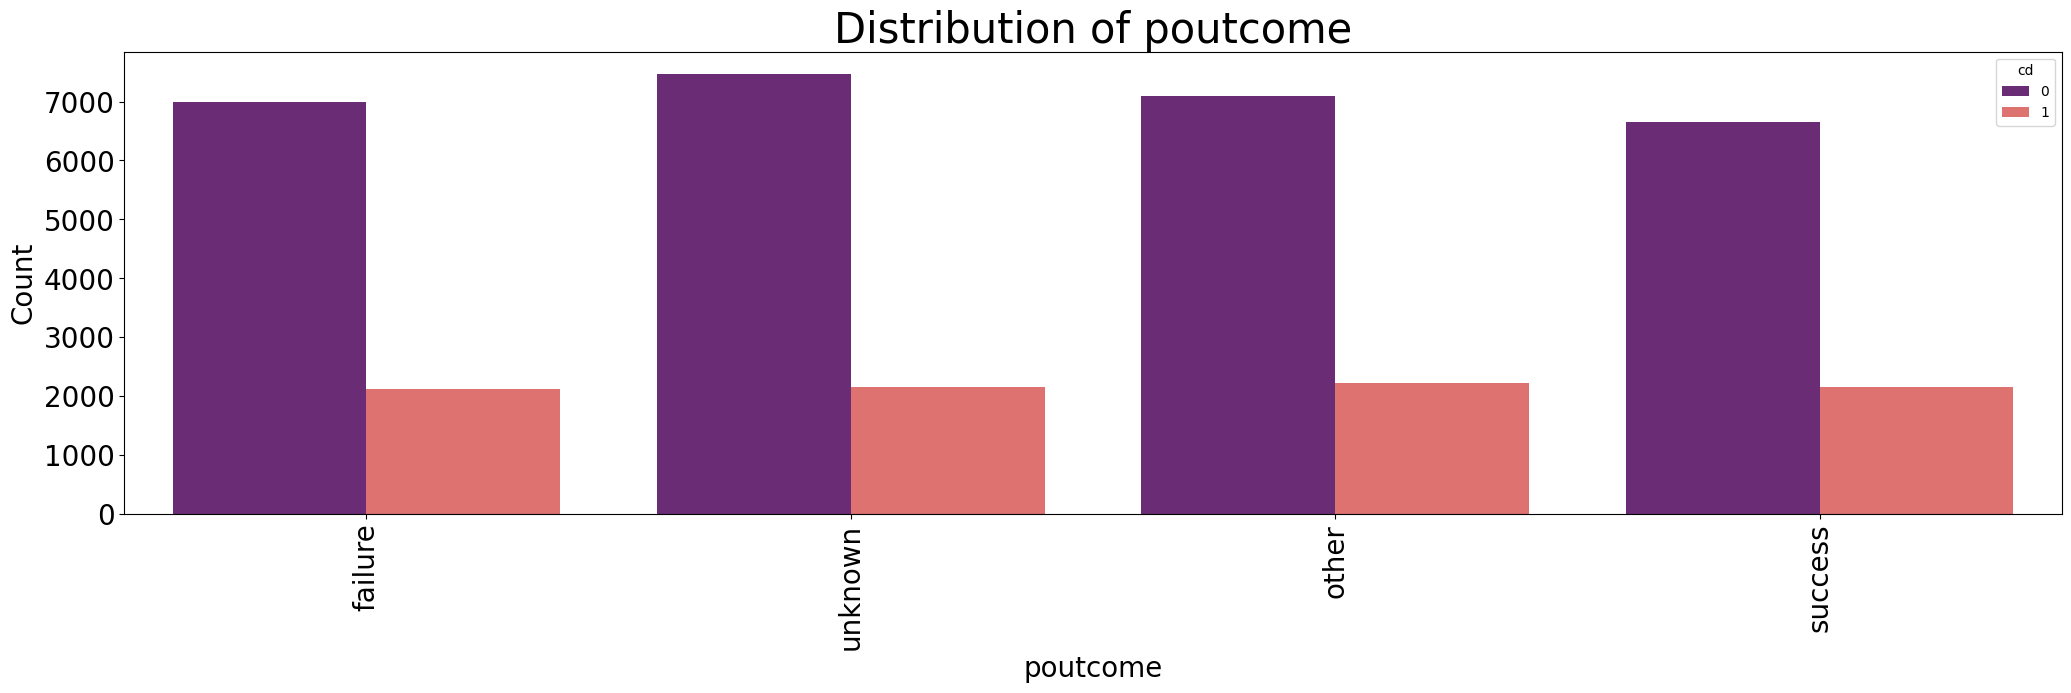

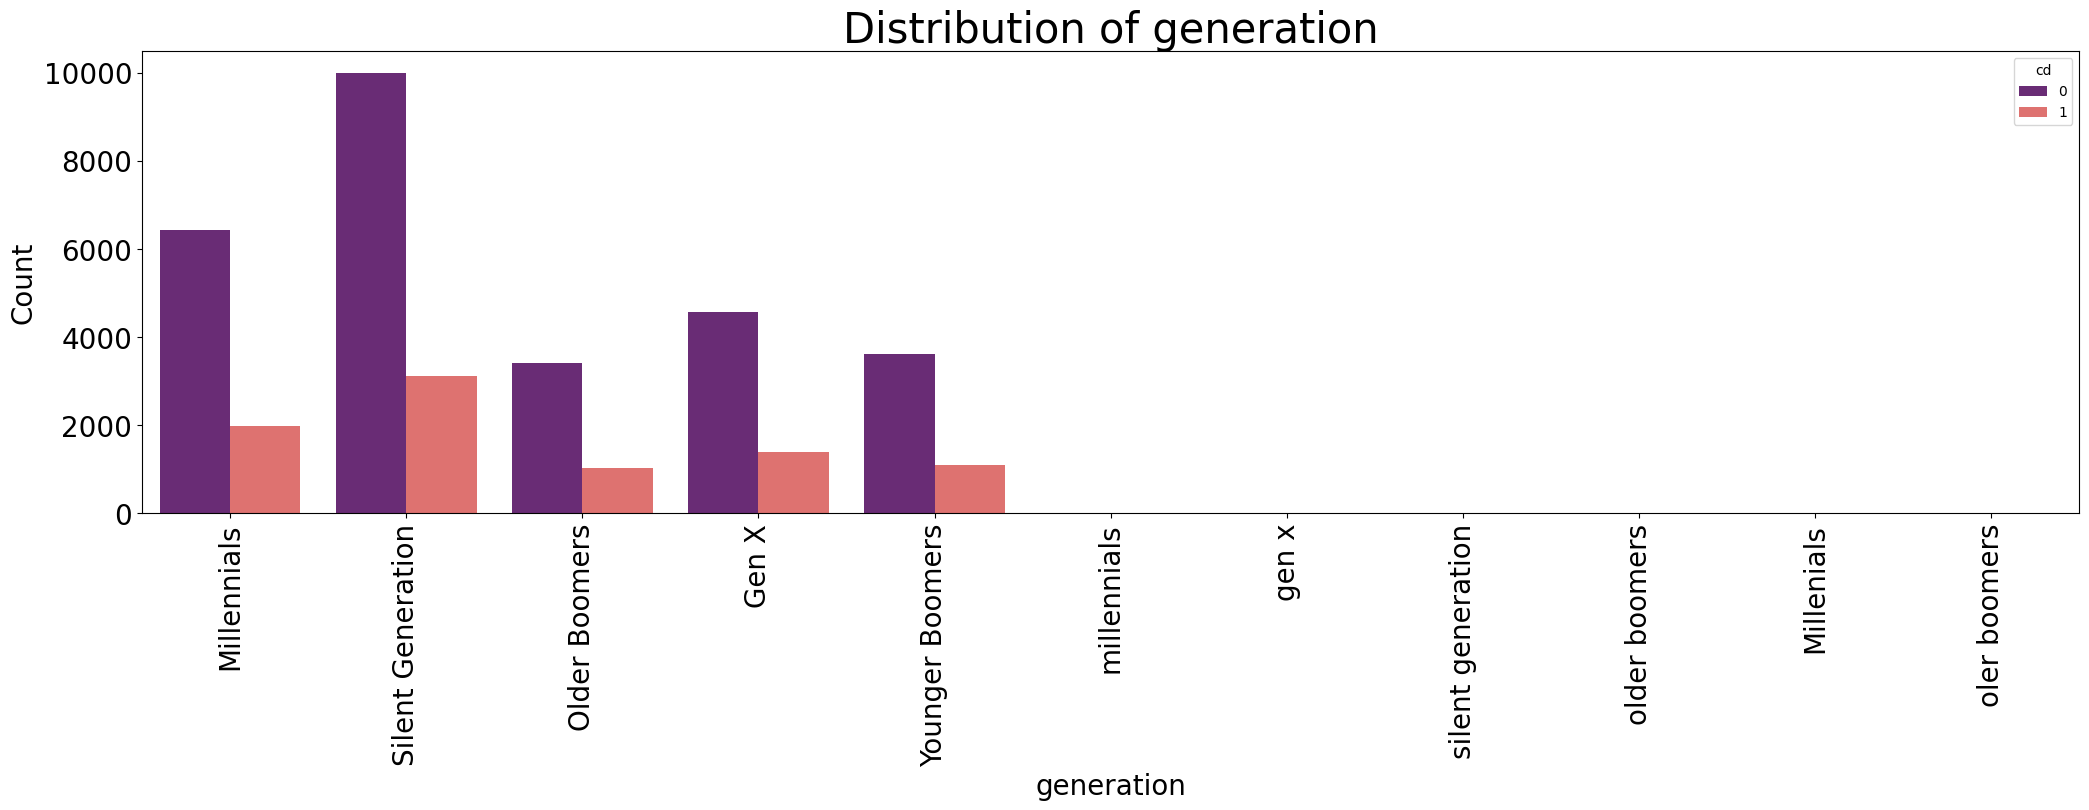

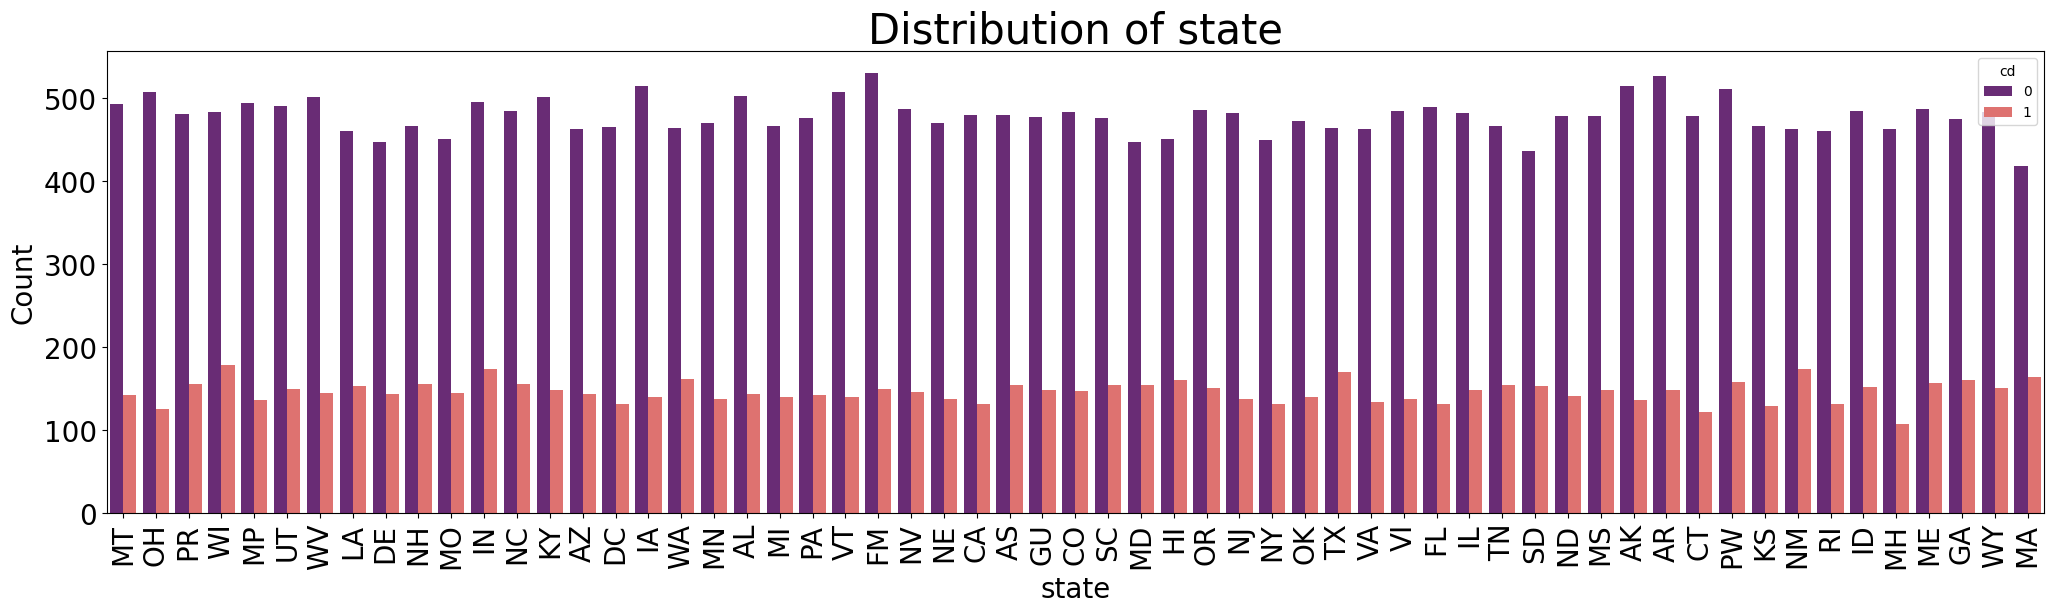

In [19]:
for column in categorical_columns:
    plt.figure(figsize=(25, 6))  # Set the figure size
    sns.countplot(data=df2, x=column, palette ="magma", hue ="cd")  # Create a count plot
    plt.title(f'Distribution of {column}', fontsize = 30)  # Set the plot title
    plt.xticks(size = 20, rotation=90)
    plt.yticks(size = 20)
    plt.ylabel('Count', fontsize=20)
    plt.xlabel(column, fontsize=20) 
    plt.show()



#### The job distribution of the customers is also skewed, with the most common job being "Management" and "blue-collar".

#### There is a significant difference in the job distribution of customers who made deposits and those who did not, with customers who made deposits being more likely to have white-collar jobs.

#### The marital status distribution of the customers is also skewed, with the most common marital status being "married".

#### There is a slight difference in the marital status distribution of customers who made deposits and those who did not, with customers who made deposits being more likely to be married.

#### The education distribution of the customers is also skewed, with the most common education level being "secondary education".

#### There is a significant difference in the education distribution of customers who made deposits and those who did not, with customers who made deposits being more likely to have higher levels of education.

#### The default distribution of the customers is also skewed, with the most common default status being "no".

#### There is a significant difference in the default distribution of customers who made deposits and those who did not, with customers who made deposits being more likely to have a default status of "no".

## Pie charts for all Categorical Variables

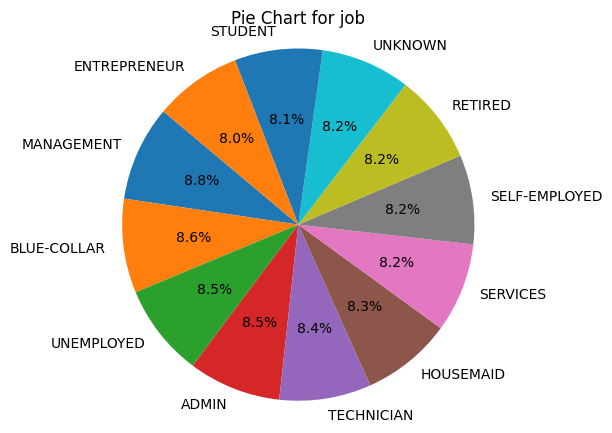

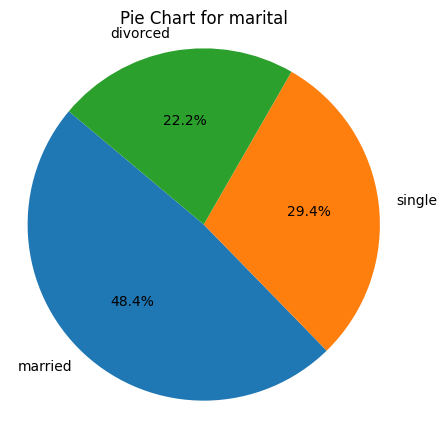

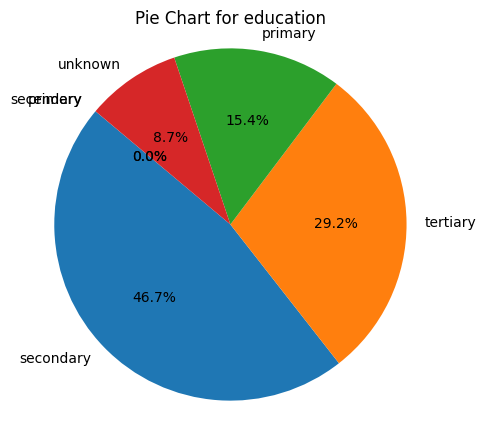

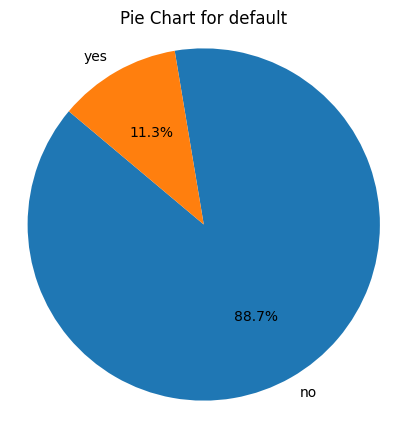

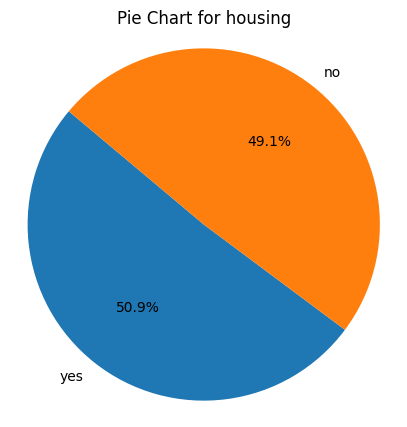

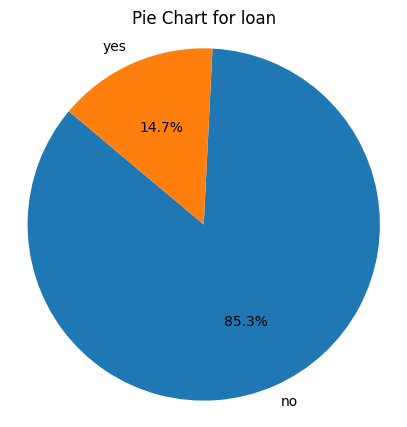

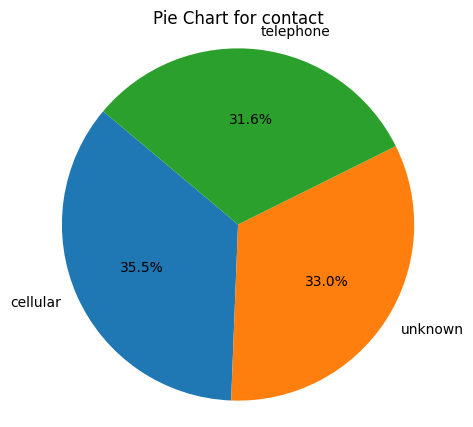

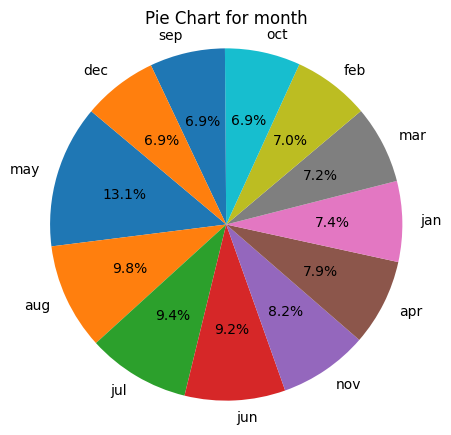

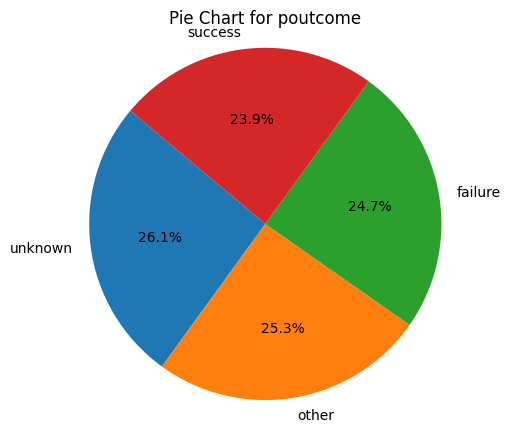

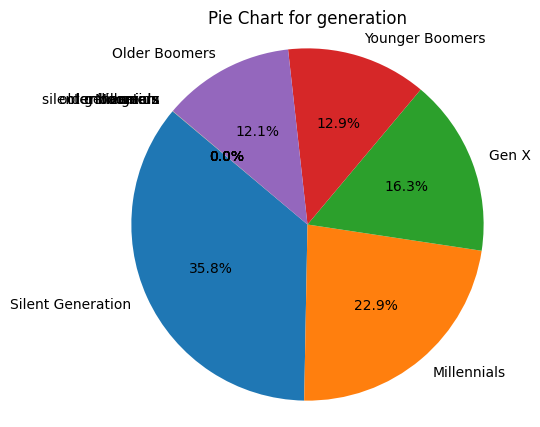

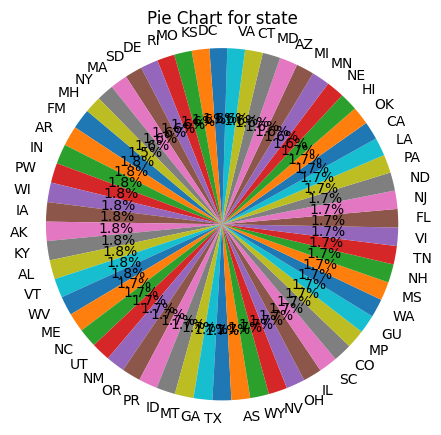

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a function to create and display pie charts
def create_pie_chart(column_name):
    # Count the frequency of each category in the column
    category_counts = df2[column_name].value_counts()
    
    # Create a pie chart
    plt.figure(figsize=(5,5))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    plt.show()

# Iterate through categorical columns and create pie charts
for column in categorical_columns:
    
    create_pie_chart(column)


# Distribution of Categorical Variables and Direct Deposits made by the client

## Client Default and Deposit Distribution

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15/1081185409.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


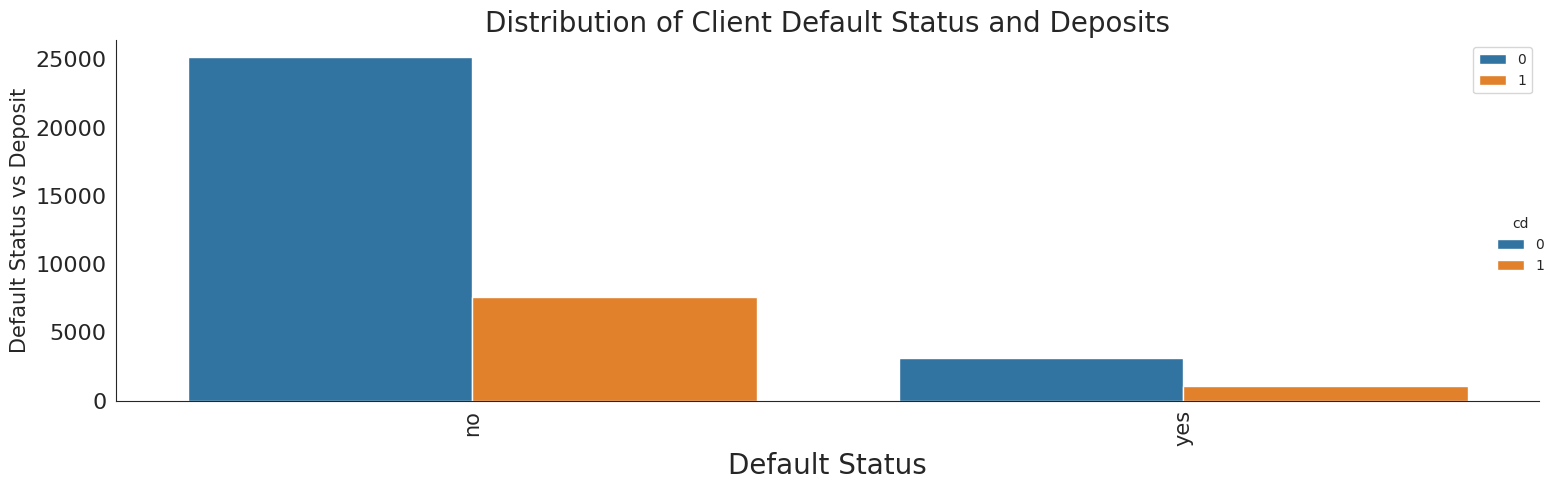

In [56]:
with sns.axes_style('white'):
    g = sns.catplot(x= 'default', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['default'].value_counts().index)
    g.set_xlabels('Default Status', size = 20)
    g.set_ylabels('Default Status vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Default Status and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

### We can observe that the clients who have not defaulted have made highest deposit decisions. 

## Age and deposit distribution

#### We can see that the highest number of clients are between 56 - 60 followed by 38-40 and 24-28 age brackets.

#### The least number of clients fall in the ages 18 and below as well as 95 and above.

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15/1844775858.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


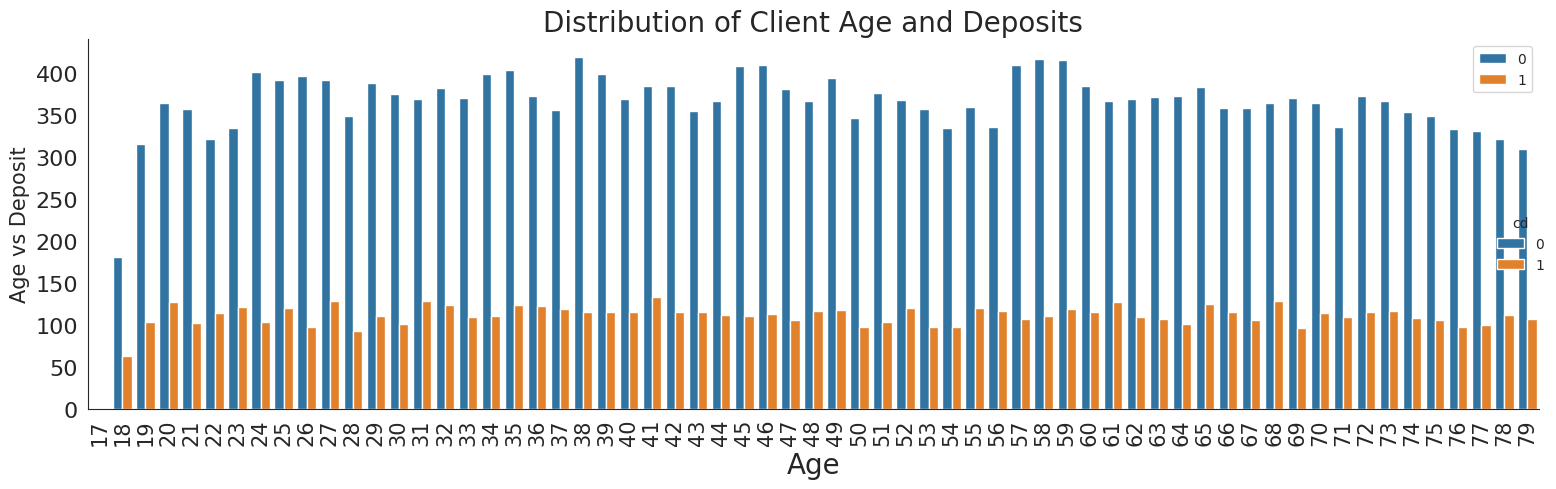

In [28]:
with sns.axes_style('white'):
    g = sns.catplot(x= 'age', data=df2, aspect=3.0, kind='count', hue='cd', order=range(17, 80))
    g.set_xlabels('Age', size = 20)
    g.set_ylabels('Age vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Age and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

### We observe a similar distribution of deposits across all ages starting 20 uptill 79 years of age

## Generation and Deposit Distribution

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15/537268769.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


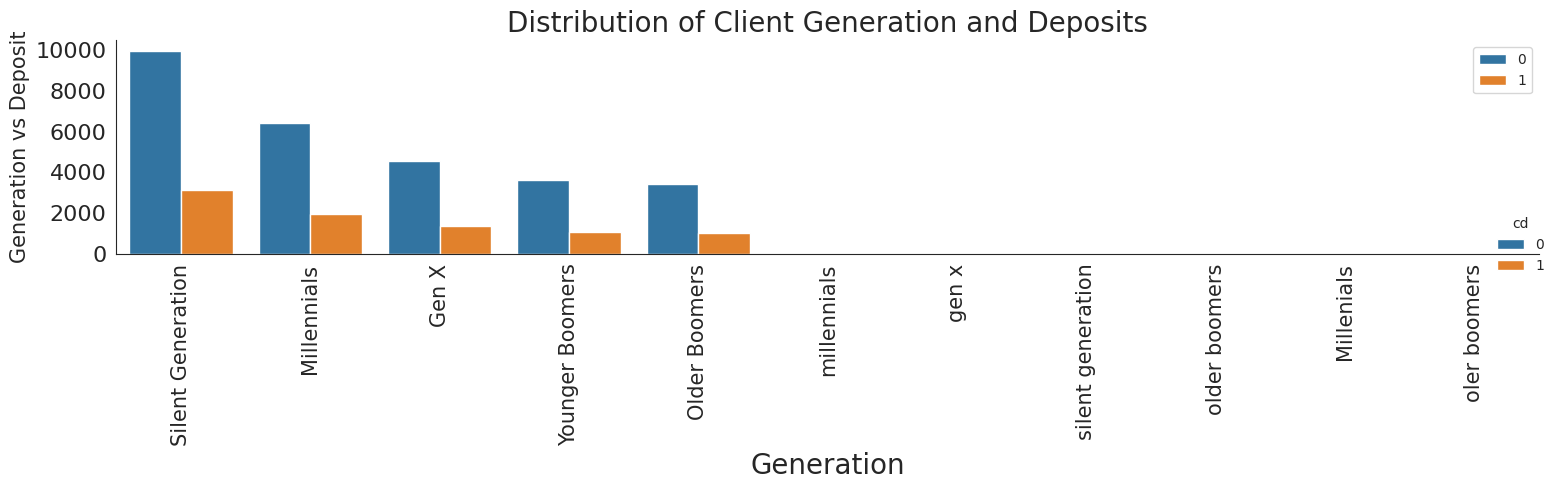

In [29]:
with sns.axes_style('white'):
    g = sns.catplot(x= 'generation', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['generation'].value_counts().index)
    g.set_xlabels('Generation', size = 20)
    g.set_ylabels('Generation vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Generation and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

### We can see that the Silent generation has made the max deposits followed by Millenials and Gen X generations.

In [84]:
# Supress warnings

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Client Jobs and Deposit distributions

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/1474732651.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


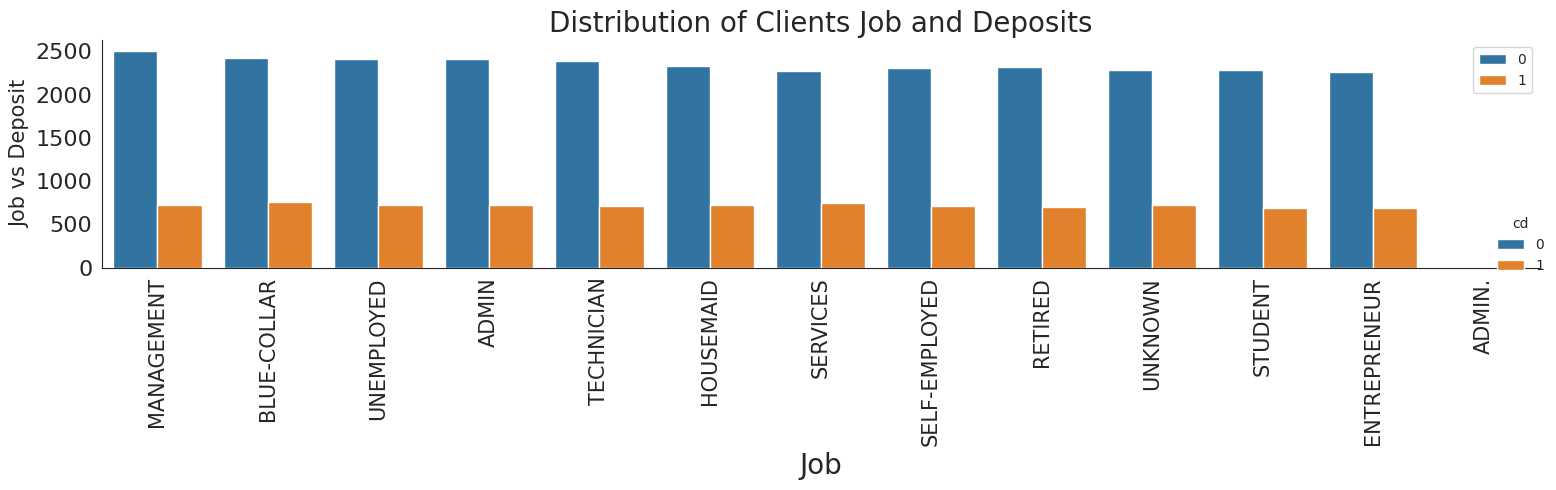

In [89]:

with sns.axes_style('white'):
    g = sns.catplot(x= 'job', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['job'].value_counts().index)
    g.set_xlabels('Job', size = 20)
    g.set_ylabels('Job vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Clients Job and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

#### From the above plot we can observe that deposit decisions are equally distributed across job-roles

#### We observe the profession of clients are equally distributed across jobs such as Management, blue-collar, unemployed, Admin, technician, housemaid, services, self-employed, unknown, retired, student, enterpreuner.

## Client Marital Status and deposits distribution

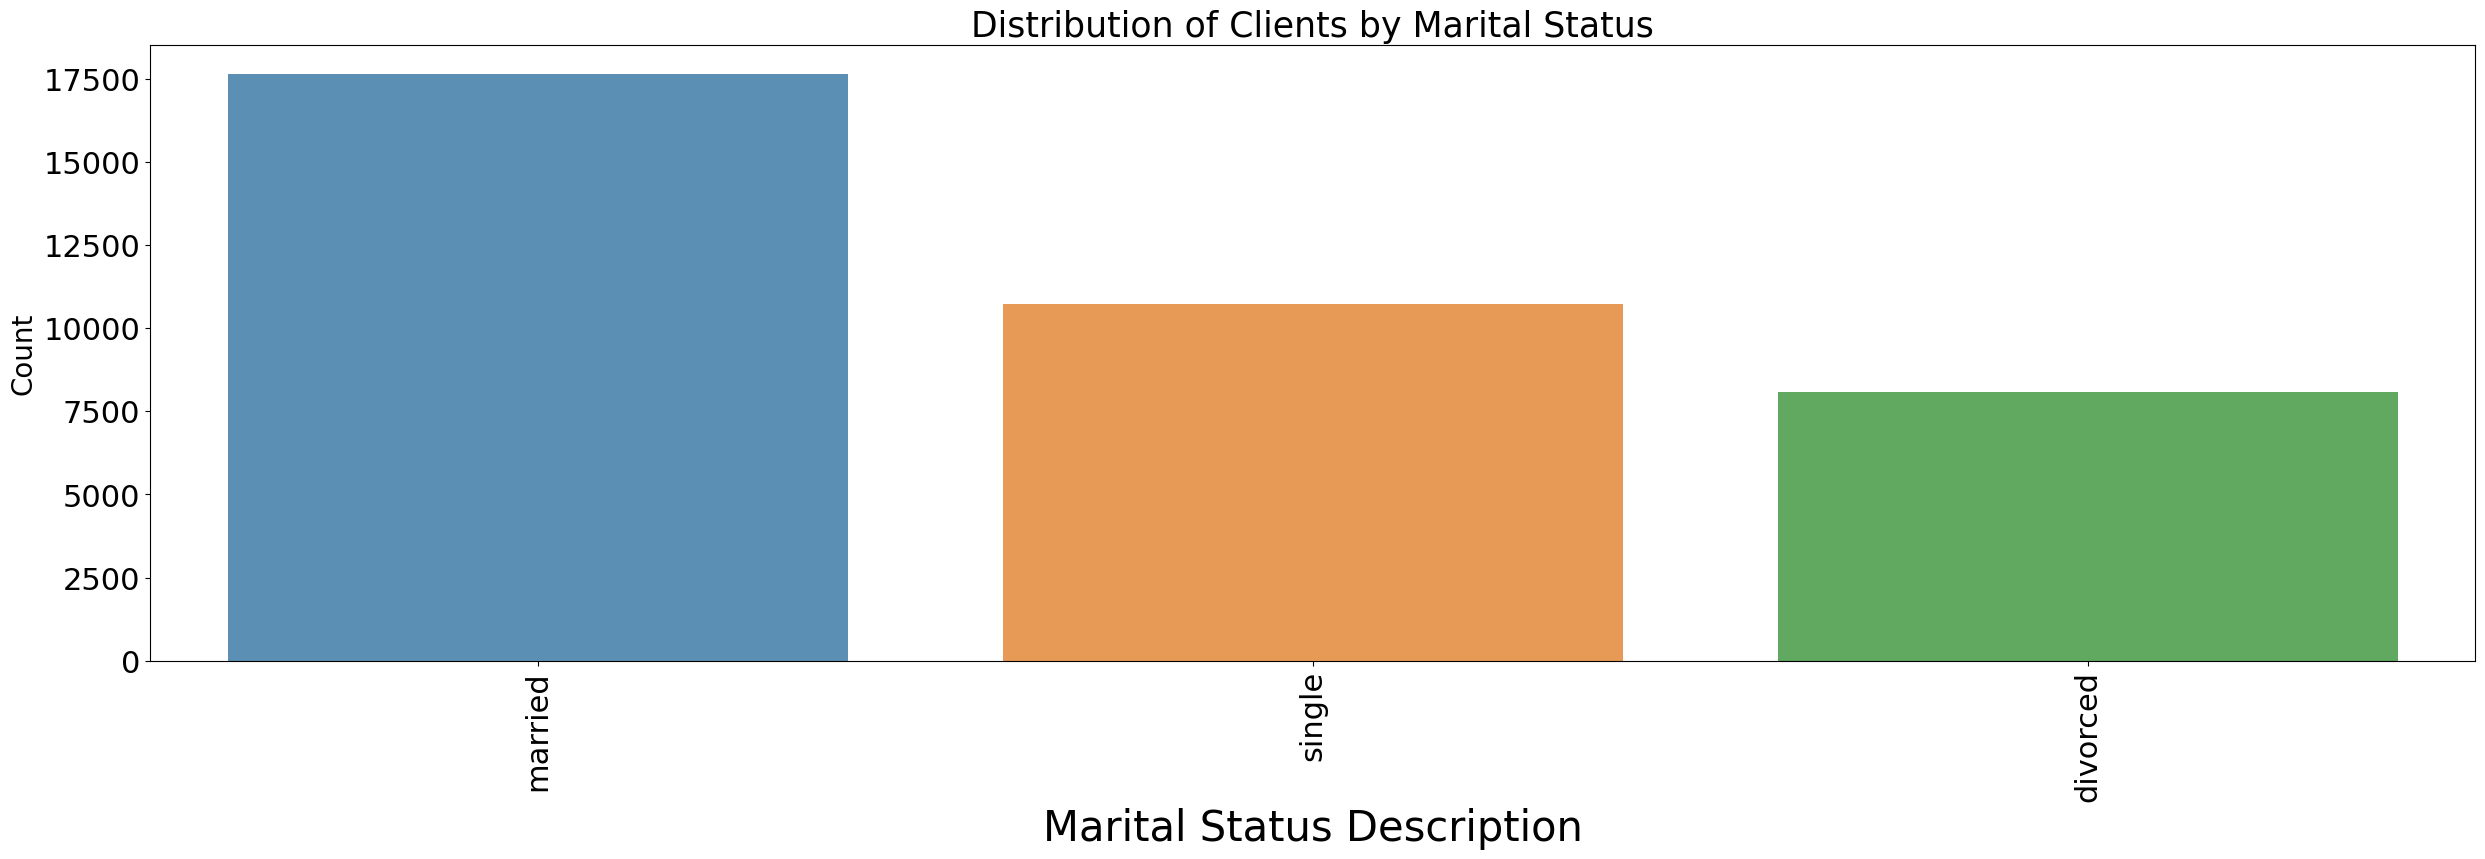

In [98]:
mar_count =df2.marital.value_counts()
mar_count

plt.figure(figsize=(30,8))
sns.barplot(x= mar_count.index, y =mar_count.values, alpha=0.8)
plt.title('Distribution of Clients by Marital Status', size = 25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Marital Status Description', fontsize=30)
plt.xticks(rotation=90, fontsize = 22)
plt.yticks(fontsize=22)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/1084274535.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


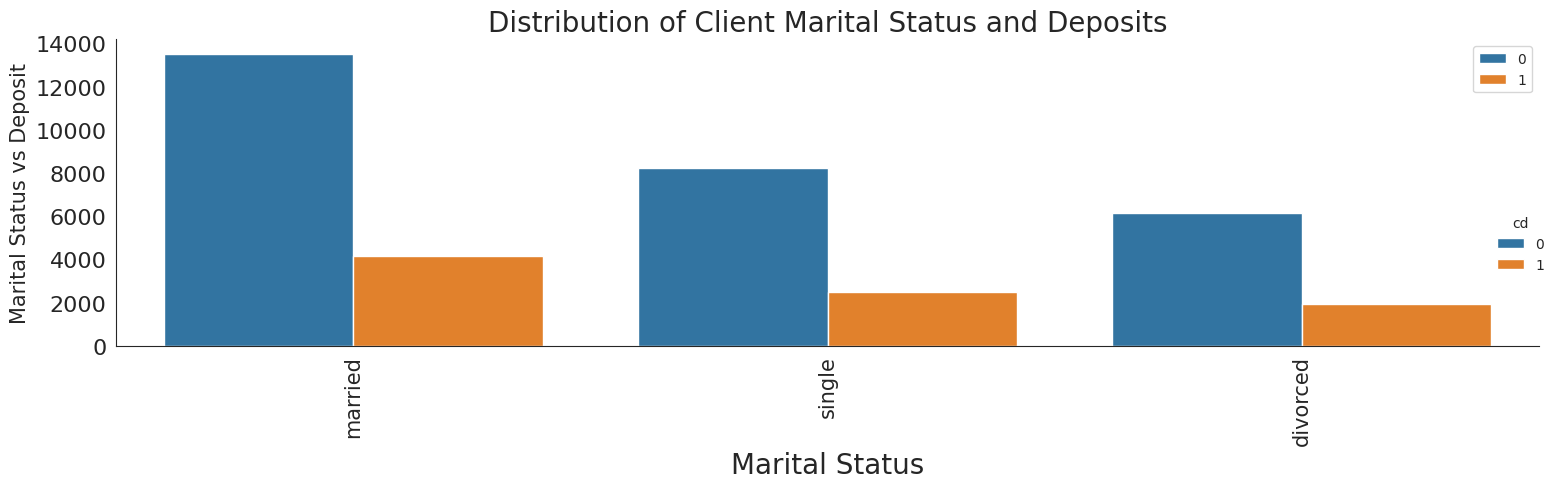

In [99]:
with sns.axes_style('white'):
    g = sns.catplot(x= 'marital', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['marital'].value_counts().index)
    g.set_xlabels('Marital Status', size = 20)
    g.set_ylabels('Marital Status vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Marital Status and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

#### Highest number of clients who have made deposits belong to the Married category followed by Single category and Divorced category so we need to focus our campaign efforts towards the married and single categories.

## Distribution of Clients Education and Deposits 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/743530143.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


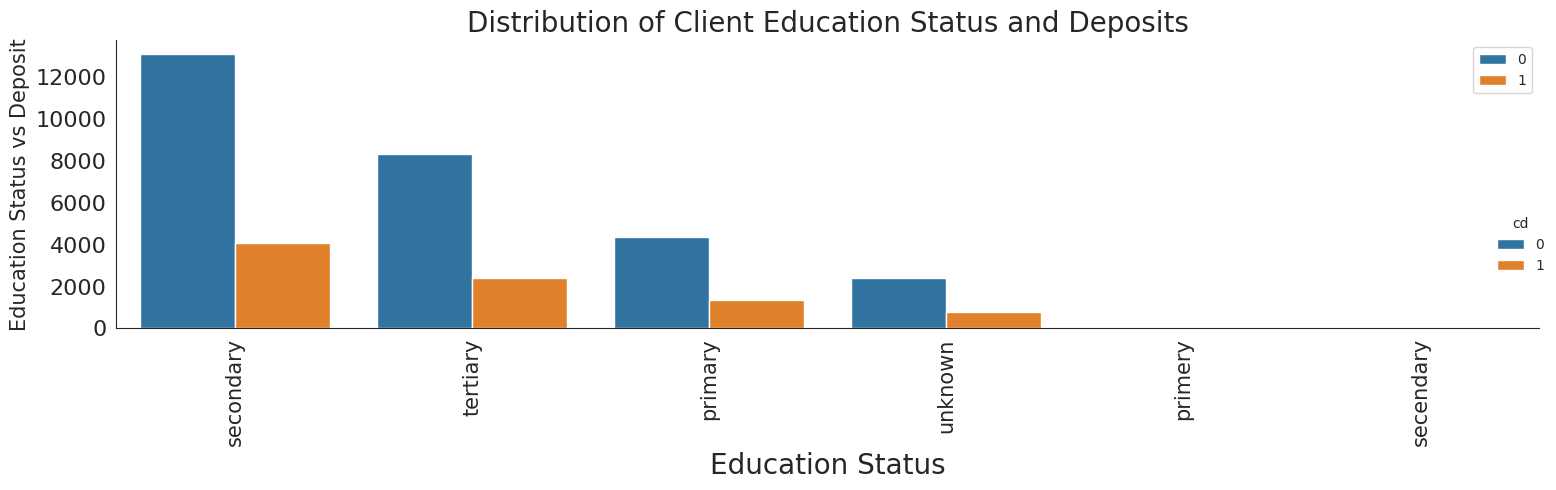

In [153]:

with sns.axes_style('white'):
    g = sns.catplot(x= 'education', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['education'].value_counts().index)
    g.set_xlabels('Education Status', size = 20)
    g.set_ylabels('Education Status vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Education Status and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

### From the above plots we can observe that the clients with Secondary education have made maximum deposits followed by Clients with Tertiary education.

## Distribution of Client Housing Status and Deposits

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/4072036979.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


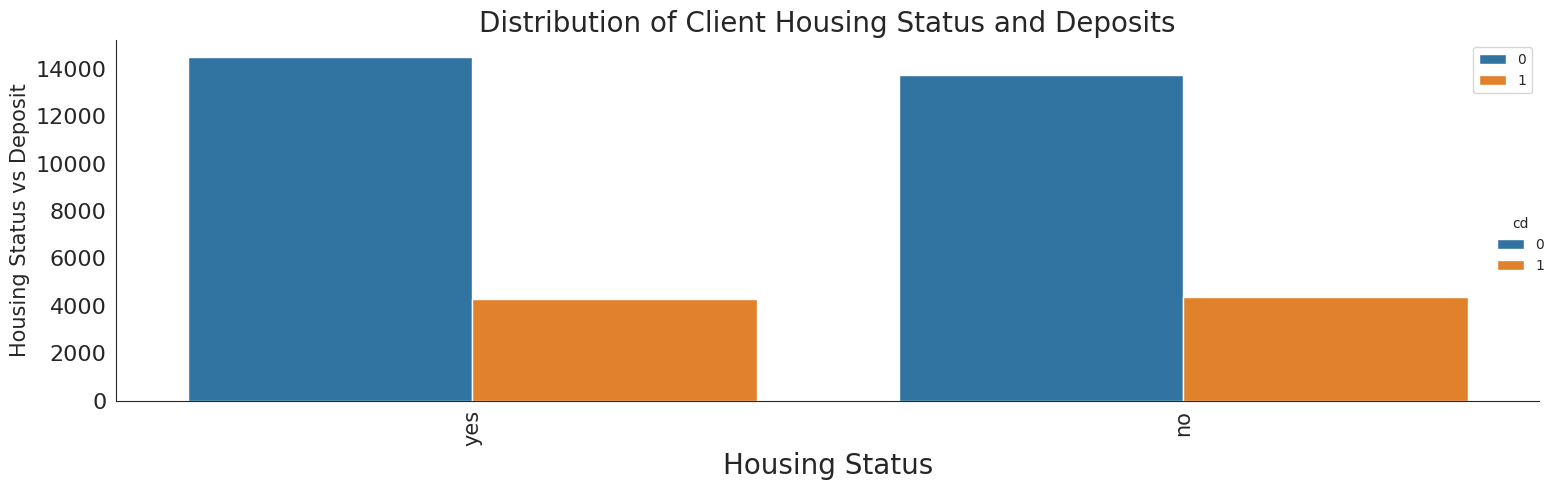

In [106]:
with sns.axes_style('white'):
    g = sns.catplot(x= 'housing', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['housing'].value_counts().index)
    g.set_xlabels('Housing Status', size = 20)
    g.set_ylabels('Housing Status vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Housing Status and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()


### From the above plots we observe that the Clients Housing loan distribution is same or equal for Housing loans versus no housing loans.

## Distribution of Client Loan and Direct Deposits

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/809755594.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


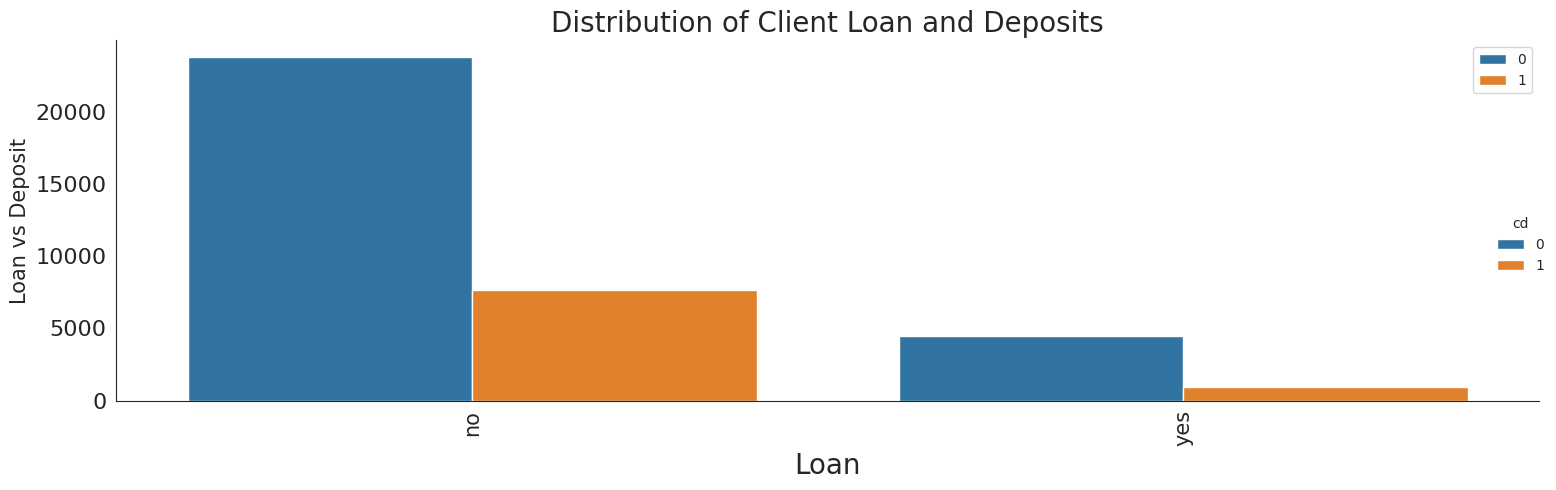

In [109]:

with sns.axes_style('white'):
    g = sns.catplot(x= 'loan', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['loan'].value_counts().index)
    g.set_xlabels('Loan', size = 20)
    g.set_ylabels('Loan vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Loan and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

### From the above plots we can observe that 85% Clients have a personal Loan and 14% do not have a personal loan. Also, Clients who do not have a personal Loan have made more deposits since they have more cashflow.

## Client Contact method and deposits distribution

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/3034242192.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


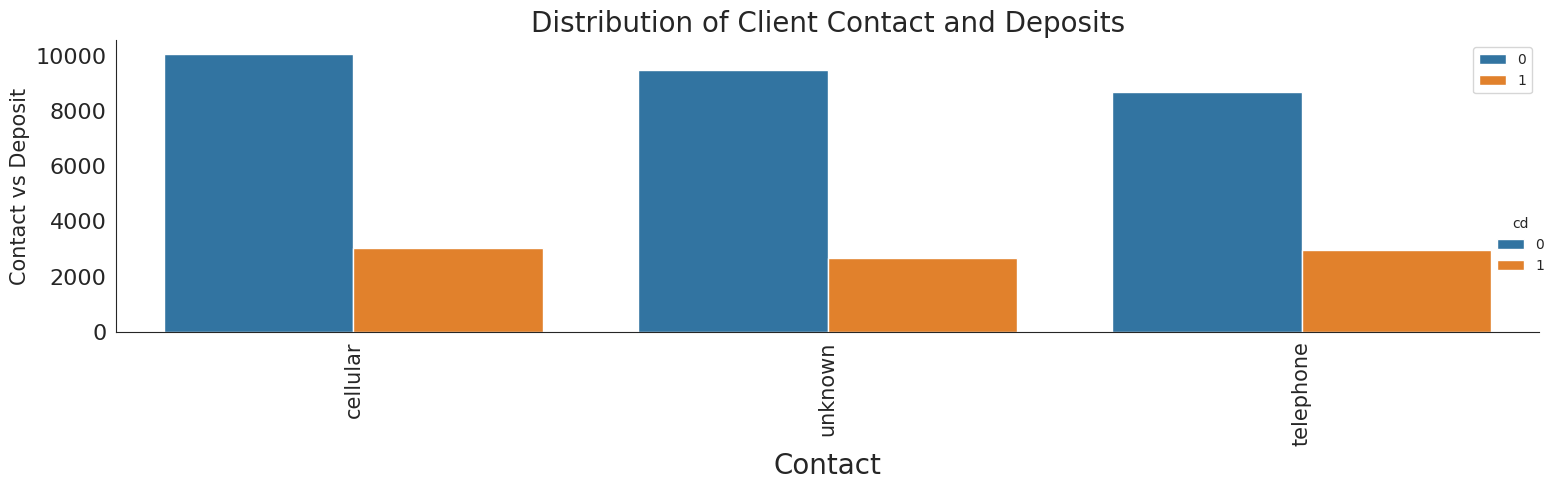

In [112]:
with sns.axes_style('white'):
    g = sns.catplot(x= 'contact', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['contact'].value_counts().index)
    g.set_xlabels('Contact', size = 20)
    g.set_ylabels('Contact vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Contact and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

### From the above plots we can observe that clients contact is evenly distributed across the cellular, telephone and unknown category at around 30-35% each and they have eqaully opted for making deposits as well. So contact method has no effect on client deposits.

### A high number of clients are showing to have a zero balance and this needs to be investiaged. The rest of the amounts deposited are distributed equally otherwise.

## Distribution of Month of the year and client direct deposits

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/2856675967.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


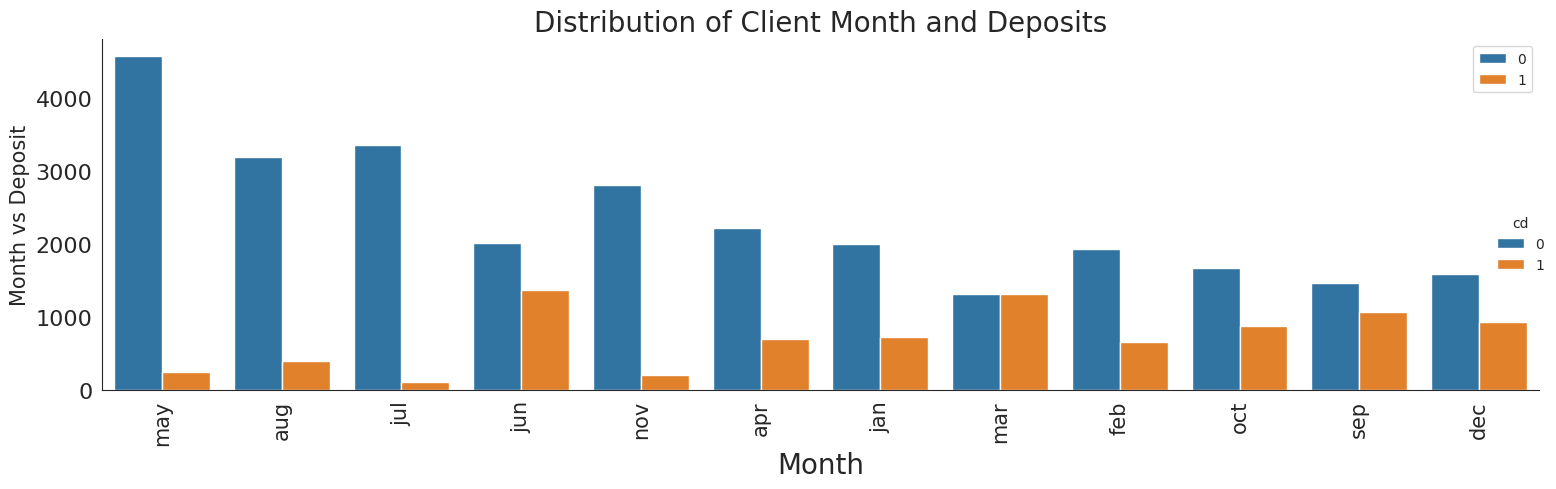

In [147]:
# plot the distributions of all the categorical variables

with sns.axes_style('white'):
    g = sns.catplot(x= 'month', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['month'].value_counts().index)
    g.set_xlabels('Month', size = 20)
    g.set_ylabels('Month vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Month and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()





## Distribution of Client Deposits by Day

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/3605159738.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


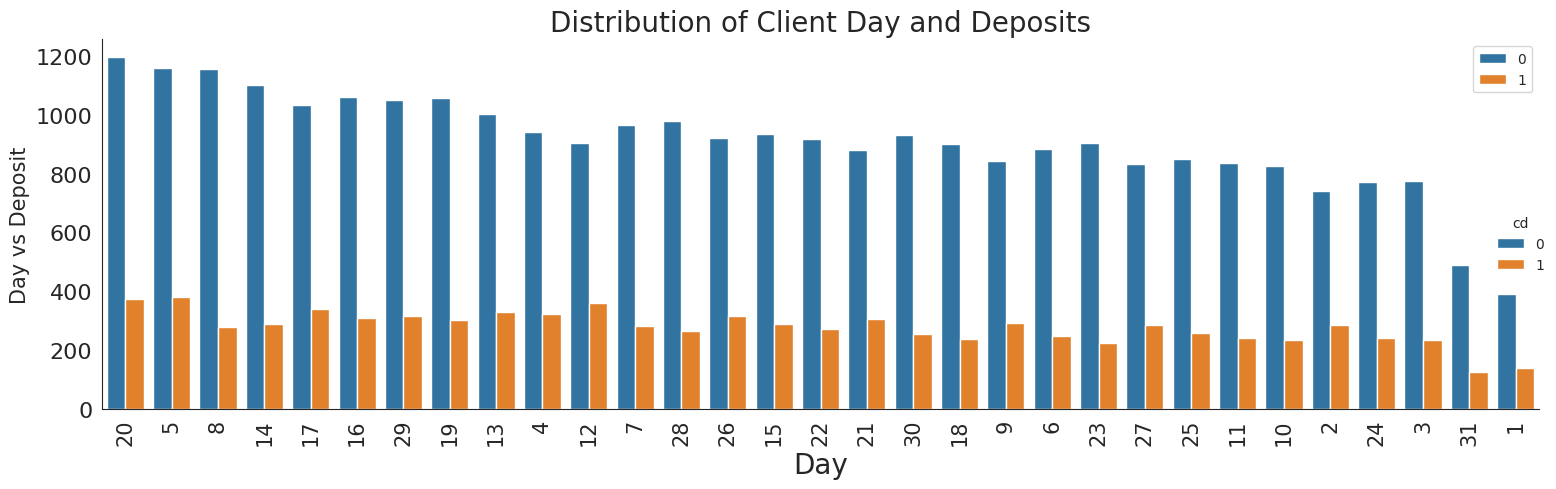

In [148]:

with sns.axes_style('white'):
    g = sns.catplot(x= 'day', data=df2, aspect=3.0, kind='count', hue='cd', order=df2['day'].value_counts().index)
    g.set_xlabels('Day', size = 20)
    g.set_ylabels('Day vs Deposit', size = 15)
    plt.xticks(rotation=90, fontsize = 15)
    plt.yticks(fontsize=16)
    plt.title('Distribution of Client Day and Deposits', size = 20)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

## Distribution of the Previous Client outcome and deposits

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/3886400329.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


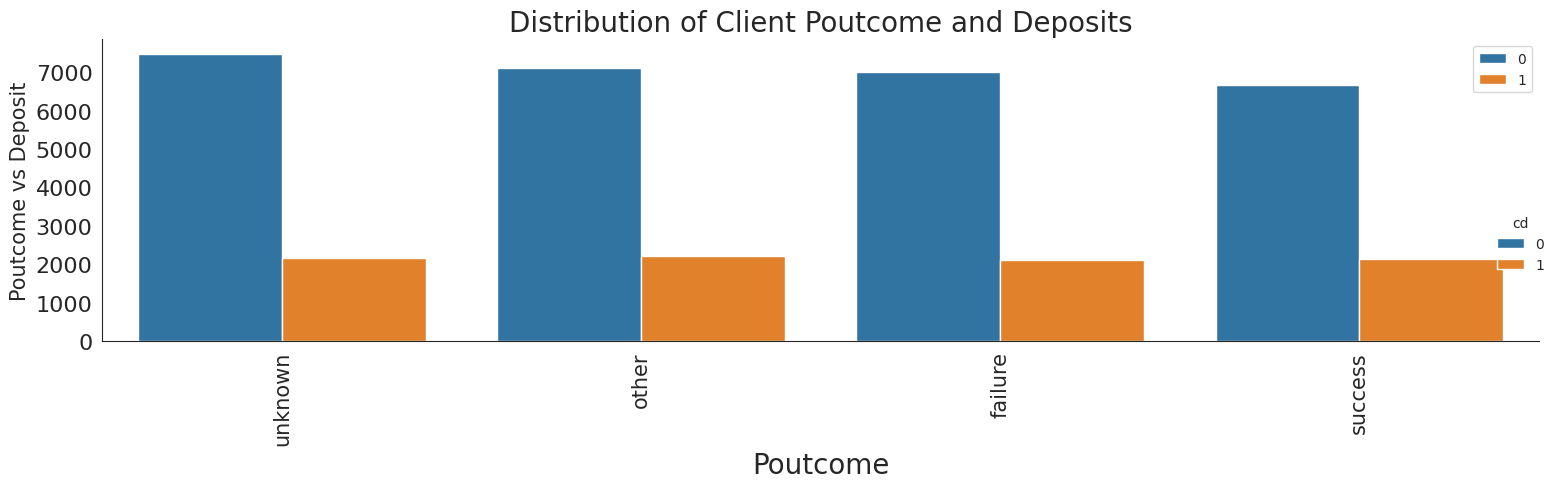

### We can observe that the previous outcome has no effect on the current direct deposit decision.

# Box plots for outlier detection

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only the numerical columns from the DataFrame
numerical_columns = df2.select_dtypes(include=['int64', 'float64'])

numerical_columns = numerical_columns.drop(['cd'], axis=1)

numerical_columns

age  balance  day  duration  campaign  pdays  previous
0       25    11924   13      4102      32.0    144       8.0
1       23      398   20        66       4.0     15       4.0
2       74     2177   19        10       3.0    465       4.0
3       60    26673    6      3902      17.0    396       6.0
4       32     6358   15      3563      28.0    314      24.0
...    ...      ...  ...       ...       ...    ...       ...
36866   53    26564    1      1011      15.0     89      24.0
36867   64    85454    7      3761      23.0    210      58.0
36868   83    52800   29      3840       8.0    361      17.0
36869   86     1898   27      2524      51.0    164       5.0
36870   42     1875    7       140       1.0     57      29.0

[36871 rows x 7 columns]

## Visualize the box plots

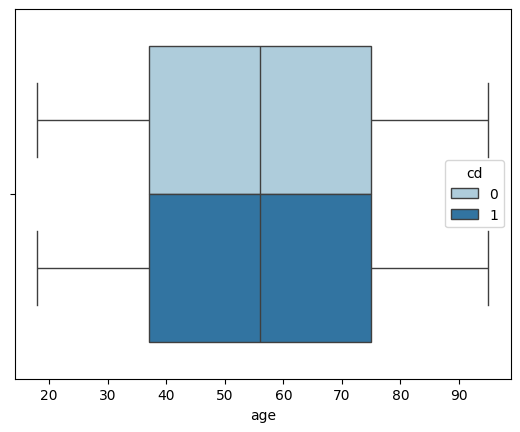

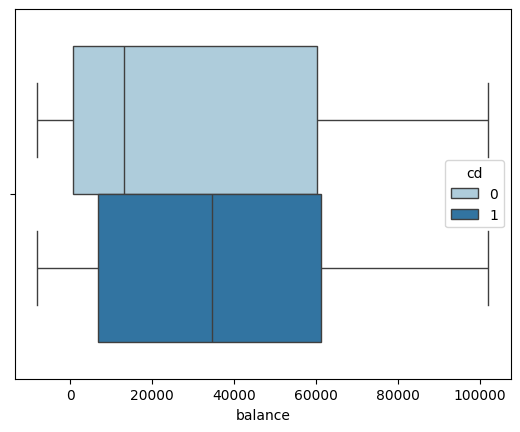

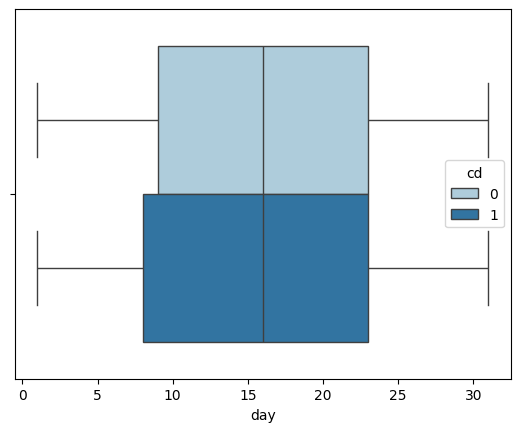

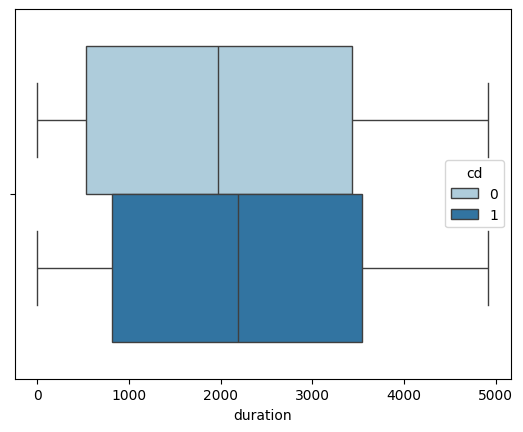

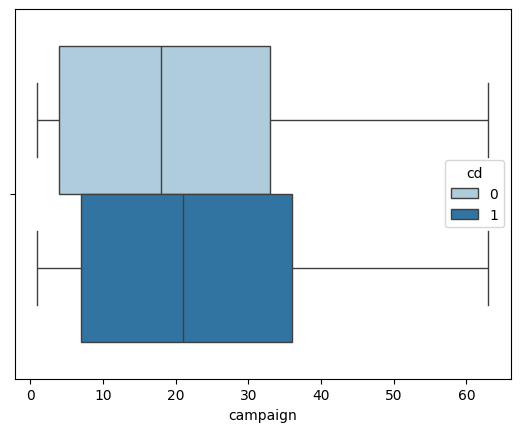

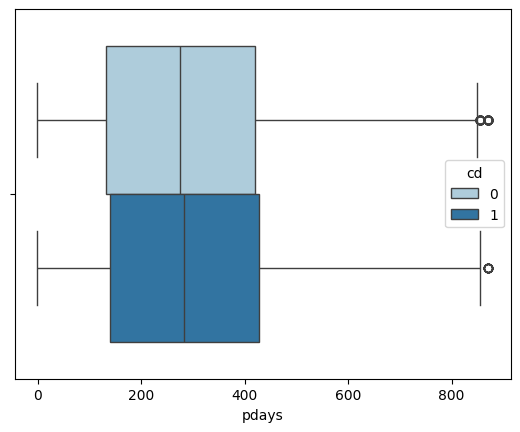

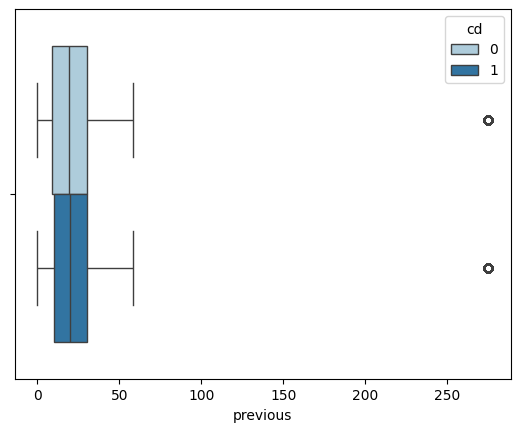

In [24]:
for column in numerical_columns:
    sns.boxplot(x=column,data=df2, palette ="Paired", hue="cd").grid(False)
    plt.show()

### 

### From the above box plots we observe that the variables pdays and previous have a few outlier values which are extreme but since the number of outlier points are not huge we will not drop these values as they could potentially provide valuable information. All the other numerical columns do not possess outlier values.

## Vizualize Correlation Heatmap

In [30]:
df3 = df2.copy()
df3

age           job   marital  education default  balance housing loan  \
0       25         ADMIN    single   tertiary      no    11924      no   no   
1       23     HOUSEMAID  divorced    primary      no      398     yes   no   
2       74       UNKNOWN   married    unknown      no     2177     yes   no   
3       60     HOUSEMAID   married   tertiary      no    26673     yes   no   
4       32  ENTREPRENEUR    single    primary      no     6358      no  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
36866   53    TECHNICIAN   married  secondary      no    26564     yes  yes   
36867   64         ADMIN  divorced  secondary      no    85454      no   no   
36868   83  ENTREPRENEUR  divorced   tertiary      no    52800     yes   no   
36869   86    UNEMPLOYED   married  secondary     yes     1898      no   no   
36870   42    TECHNICIAN    single  secondary      no     1875     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  cd  \
0       unknown   13   jan      4102      32.0    144       8.0  failure   1   
1      cellular   20   jun        66       4.0     15       4.0  unknown   1   
2       unknown   19   may        10       3.0    465       4.0  failure   0   
3      cellular    6   oct      3902      17.0    396       6.0  unknown   1   
4       unknown   15   feb      3563      28.0    314      24.0  failure   0   
...         ...  ...   ...       ...       ...    ...       ...      ...  ..   
36866   unknown    1   feb      1011      15.0     89      24.0    other   0   
36867   unknown    7   apr      3761      23.0    210      58.0    other   0   
36868  cellular   29   aug      3840       8.0    361      17.0    other   0   
36869  cellular   27   sep      2524      51.0    164       5.0  success   1   
36870   unknown    7   jun       140       1.0     57      29.0  unknown   0   

              generation state  
0            Millennials    MT  
1            Millennials    OH  
2      Silent Generation    PR  
3          Older Boomers    WI  
4            Millennials    MP  
...                  ...   ...  
36866    Younger Boomers    NV  
36867      Older Boomers    TX  
36868  Silent Generation    IN  
36869  Silent Generation    TX  
36870              Gen X    VI  

[36871 rows x 19 columns]

In [31]:
from sklearn.preprocessing import LabelEncoder

df3['job'] = LabelEncoder().fit_transform(df3['job'])
df3['marital'] = LabelEncoder().fit_transform(df3['marital'])
df3['education'] = LabelEncoder().fit_transform(df3['education'])
df3['default'] = LabelEncoder().fit_transform(df3['default'])
df3['housing'] = LabelEncoder().fit_transform(df3['housing'])
df3['loan'] = LabelEncoder().fit_transform(df3['loan'])
df3['contact'] = LabelEncoder().fit_transform(df3['contact'])
df3['month'] = LabelEncoder().fit_transform(df3['month'])
df3['poutcome'] = LabelEncoder().fit_transform(df3['poutcome'])
df3['generation'] = LabelEncoder().fit_transform(df3['generation'])
df3['state'] = LabelEncoder().fit_transform(df3['state'])
df3.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   25    0        2          4        0    11924        0     0        2   
1   23    3        0          0        0      398        1     0        0   
2   74   11        1          5        0     2177        1     0        2   
3   60    3        1          4        0    26673        1     0        0   
4   32    2        2          0        0     6358        0     1        2   

   day  month  duration  campaign  pdays  previous  poutcome  cd  generation  \
0   13      4      4102      32.0    144       8.0         0   1           2   
1   20      6        66       4.0     15       4.0         3   1           2   
2   19      8        10       3.0    465       4.0         0   0           4   
3    6     10      3902      17.0    396       6.0         3   1           3   
4   15      3      3563      28.0    314      24.0         0   0           2   

   state  
0     31  
1     40  
2     44  
3     56  
4     29

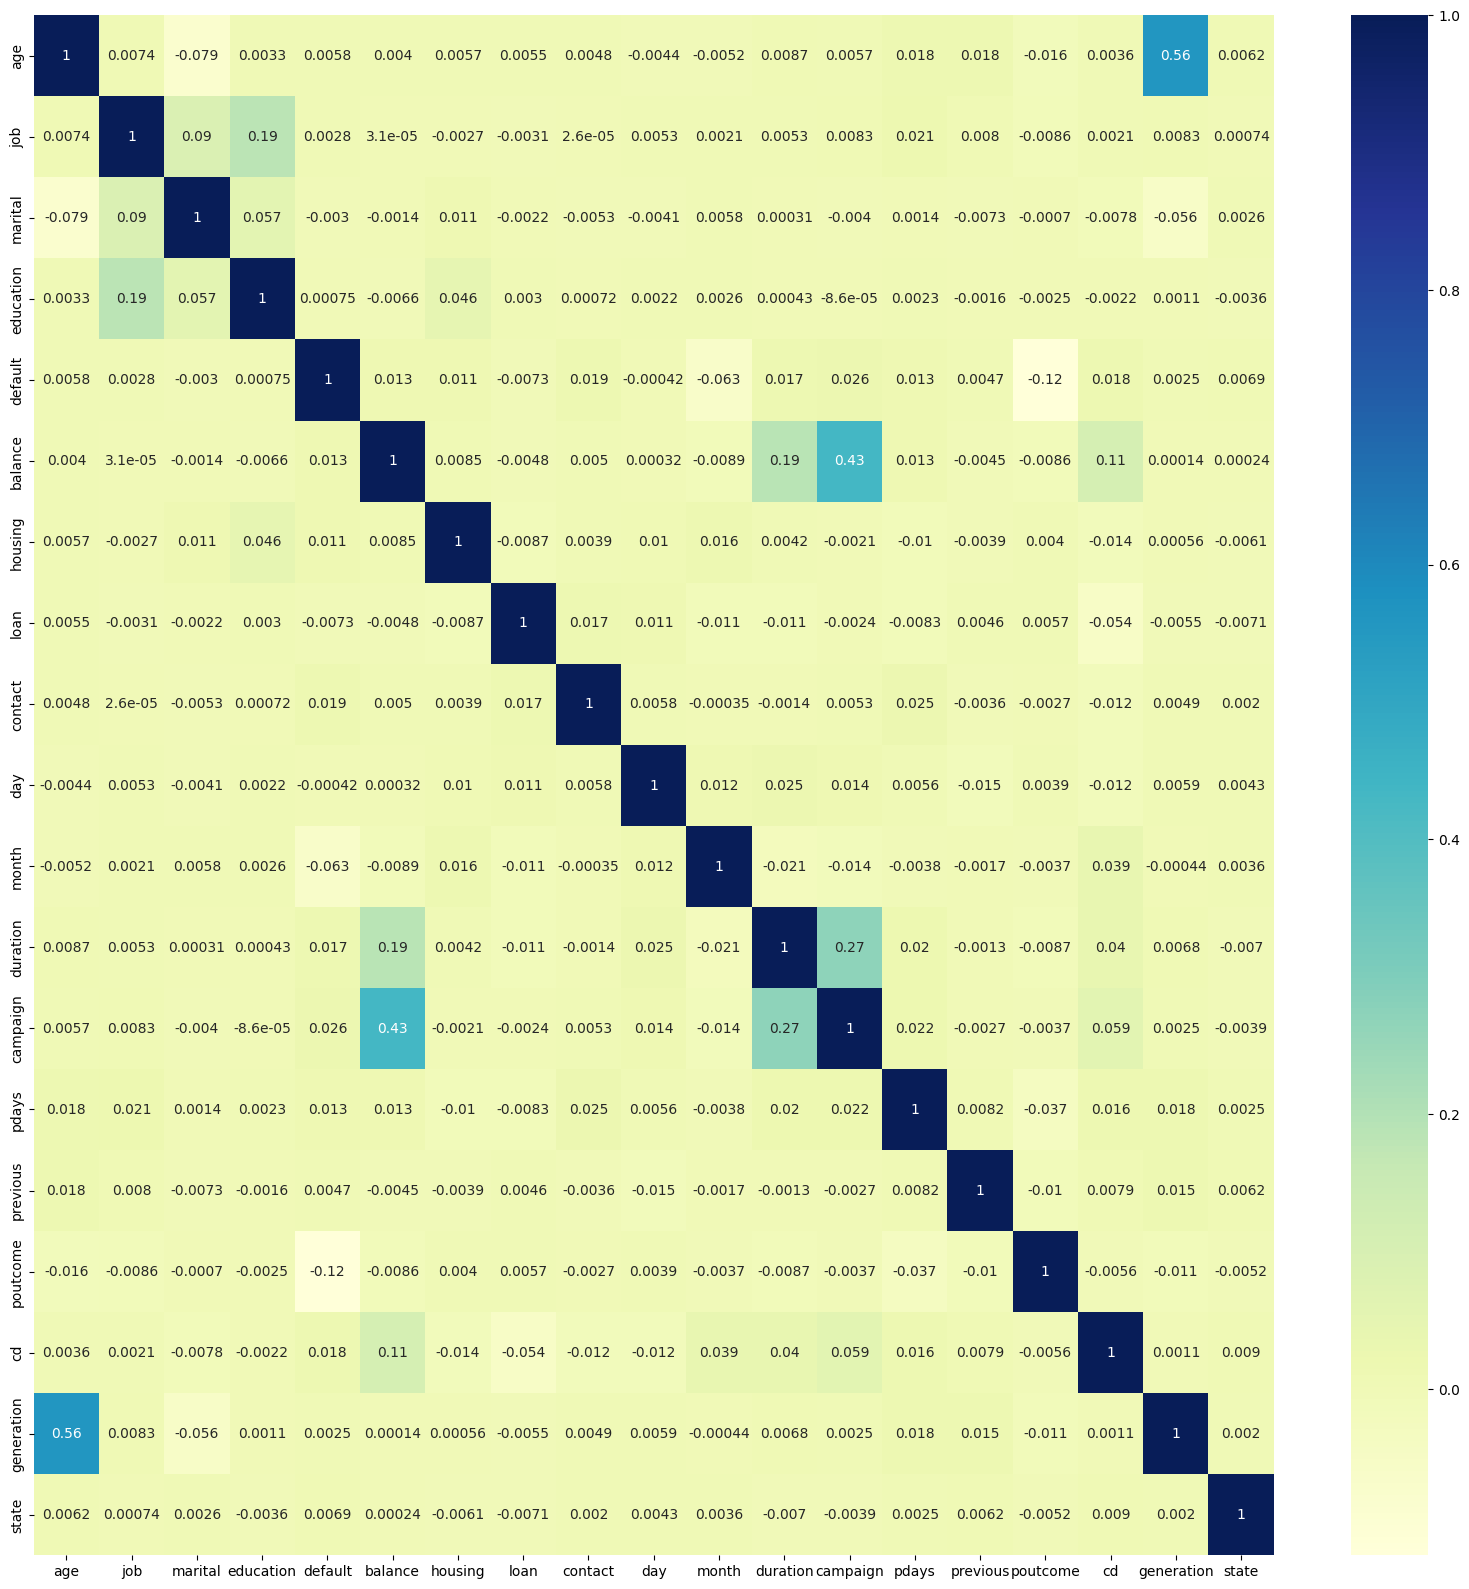

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(), annot=True, cmap="YlGnBu")
plt.show()

### We can see a significant correlation between age and generation at 56% but since they are not correlated upto 80-90%, hence we need not drop any of the variables as they do not suggest multicollinearity.

## Data preparation

In [33]:
df3

age  job  marital  education  default  balance  housing  loan  contact  \
0       25    0        2          4        0    11924        0     0        2   
1       23    3        0          0        0      398        1     0        0   
2       74   11        1          5        0     2177        1     0        2   
3       60    3        1          4        0    26673        1     0        0   
4       32    2        2          0        0     6358        0     1        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
36866   53    9        1          3        0    26564        1     1        2   
36867   64    0        0          3        0    85454        0     0        2   
36868   83    2        0          4        0    52800        1     0        0   
36869   86   10        1          3        1     1898        0     0        0   
36870   42    9        2          3        0     1875        1     0        2   

       day  month  duration  campaign  pdays  previous  poutcome  cd  \
0       13      4      4102      32.0    144       8.0         0   1   
1       20      6        66       4.0     15       4.0         3   1   
2       19      8        10       3.0    465       4.0         0   0   
3        6     10      3902      17.0    396       6.0         3   1   
4       15      3      3563      28.0    314      24.0         0   0   
...    ...    ...       ...       ...    ...       ...       ...  ..   
36866    1      3      1011      15.0     89      24.0         1   0   
36867    7      0      3761      23.0    210      58.0         1   0   
36868   29      1      3840       8.0    361      17.0         1   0   
36869   27     11      2524      51.0    164       5.0         2   1   
36870    7      6       140       1.0     57      29.0         3   0   

       generation  state  
0               2     31  
1               2     40  
2               4     44  
3               3     56  
4               2     29  
...           ...    ...  
36866           5     38  
36867           3     50  
36868           4     18  
36869           4     50  
36870           0     53  

[36871 rows x 19 columns]

In [34]:
df3.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        9
pdays           0
previous      377
poutcome        0
cd              0
generation      0
state           0
dtype: int64

In [35]:
# Replace NaN values with 0 in the original DataFrame 'df'

df3.fillna(0, inplace=True)

In [36]:
df3.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
cd            0
generation    0
state         0
dtype: int64

## Split the data into train and test

In [38]:
X = df3.drop('cd', axis=1)
y = df3['cd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [39]:
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (27653, 18)
Shape of X_test is: (9218, 18)
Shape of y_train is: (27653,)
Shape of y_test is: (9218,)


# Model Fitting 

# Without Resampling -- Oversampling/Undersampling

In [69]:
pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
import sklearn
print(sklearn.__version__)

1.3.1


In [46]:
# Import Libraries

%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import recall_score


In [41]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Train the model

In [47]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    pred_prob_test=model.predict_proba(X_test) 
    
    #calculating precision and reall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy = {}".format(accuracy))
    print('Precision: ', precision)
    print('Recall: ', recall)  
    print('F1 Score: ',f1)  
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    #Plot ROC_AUC Curve
    # Predict probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC score
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()                  
    
    return model, accuracy, precision, recall, f1, roc_auc

## Logistic Regression

Accuracy = 0.7712085050987199
Precision:  1.0
Recall:  0.00047393364928909954
F1 Score:  0.0009474182851729038
Accuracy = 0.7712085050987199
ROC Area under Curve = 0.5002369668246446
              precision    recall  f1-score   support

           0    0.77118   1.00000   0.87081      7108
           1    1.00000   0.00047   0.00095      2110

    accuracy                        0.77121      9218
   macro avg    0.88559   0.50024   0.43588      9218
weighted avg    0.82356   0.77121   0.67170      9218



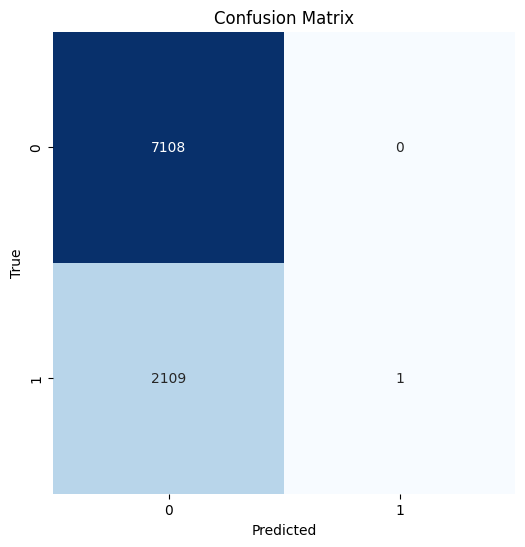

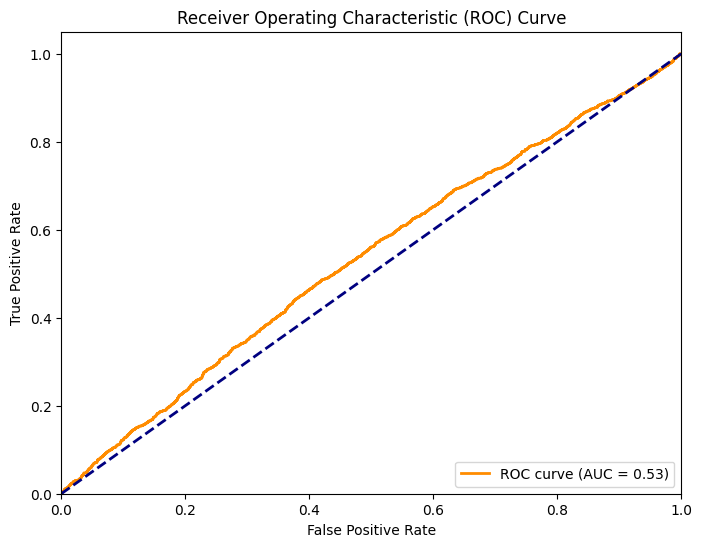

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score




params_lr = {"class_weight": None, "solver":'lbfgs', "max_iter":1000}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

## Decision Tree

Accuracy = 0.7635061835539162
Precision:  0.4529569892473118
Recall:  0.15971563981042655
F1 Score:  0.2361597757533287
Accuracy = 0.7635061835539162
ROC Area under Curve = 0.5512281069057761
              precision    recall  f1-score   support

           0    0.79077   0.94274   0.86009      7108
           1    0.45296   0.15972   0.23616      2110

    accuracy                        0.76351      9218
   macro avg    0.62186   0.55123   0.54813      9218
weighted avg    0.71345   0.76351   0.71728      9218



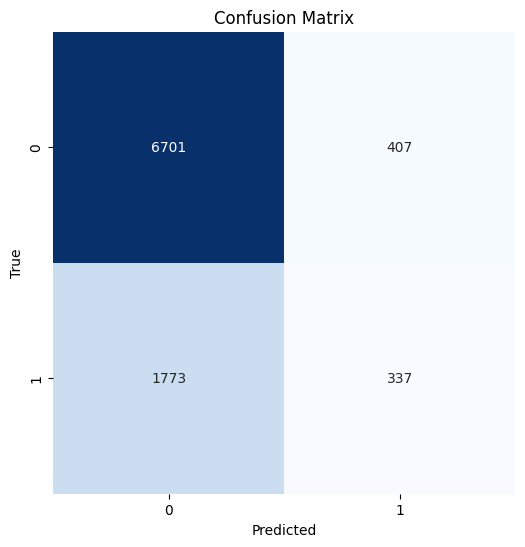

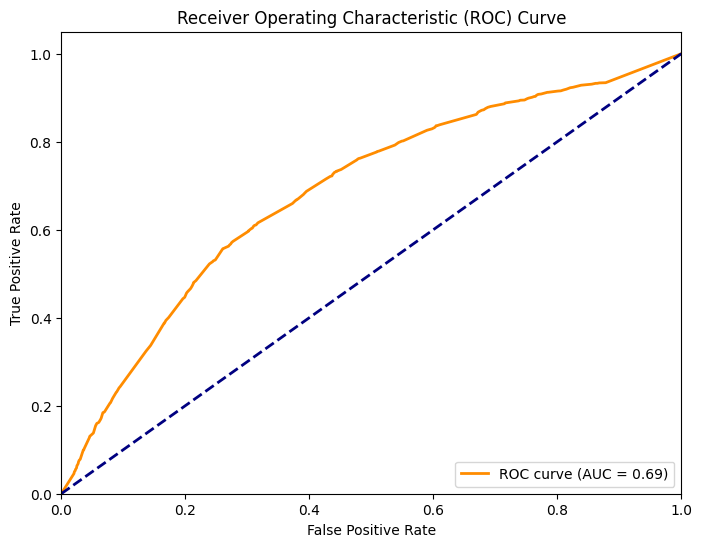

In [49]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 12,    
             'max_features': "sqrt",
             }

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

## Random forest Classifier

Accuracy = 0.8065740941635929
Precision:  0.7473524962178517
Recall:  0.23412322274881517
F1 Score:  0.3565499819559726
Accuracy = 0.8065740941635929
ROC Area under Curve = 0.6053142844188646
              precision    recall  f1-score   support

           0    0.81115   0.97651   0.88618      7108
           1    0.74735   0.23412   0.35655      2110

    accuracy                        0.80657      9218
   macro avg    0.77925   0.60531   0.62136      9218
weighted avg    0.79655   0.80657   0.76495      9218



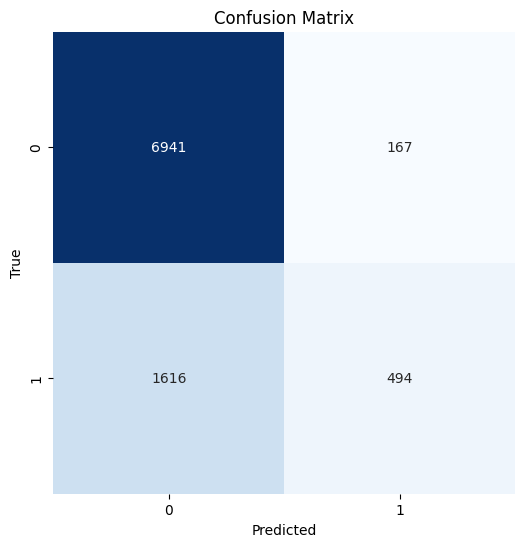

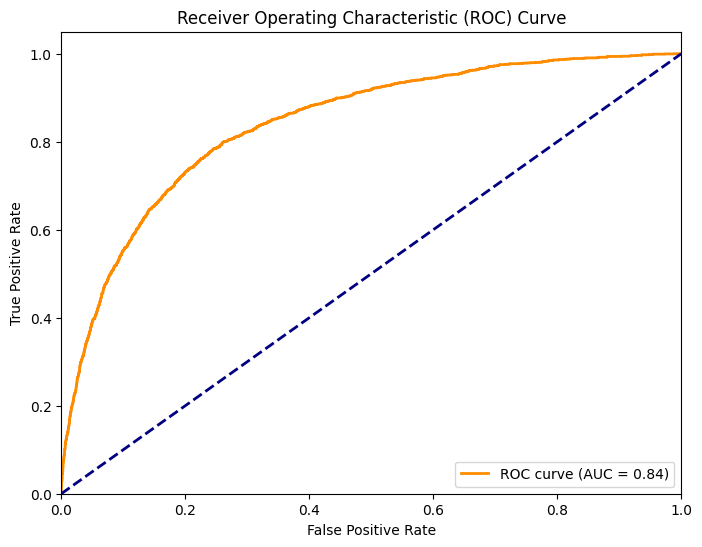

In [50]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 123}

model_rf = RandomForestClassifier(**params_rf)

model_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

## XGBoost Classifier

Accuracy = 0.8716641353872857
Precision:  0.7834862385321101
Recall:  0.6071090047393365
F1 Score:  0.6841121495327103
Accuracy = 0.8716641353872857
ROC Area under Curve = 0.7786529829549242
              precision    recall  f1-score   support

           0    0.89068   0.95020   0.91947      7108
           1    0.78349   0.60711   0.68411      2110

    accuracy                        0.87166      9218
   macro avg    0.83708   0.77865   0.80179      9218
weighted avg    0.86614   0.87166   0.86560      9218



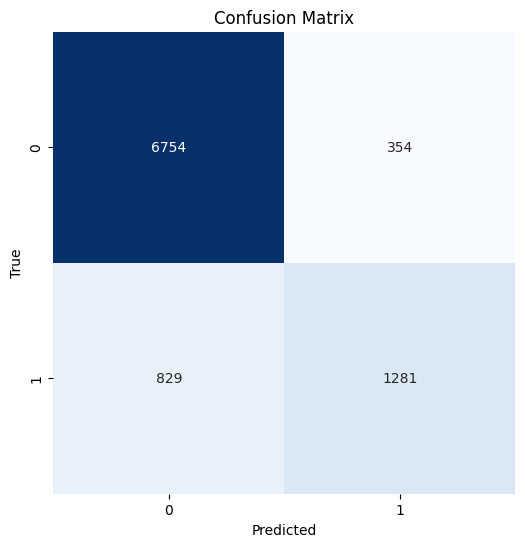

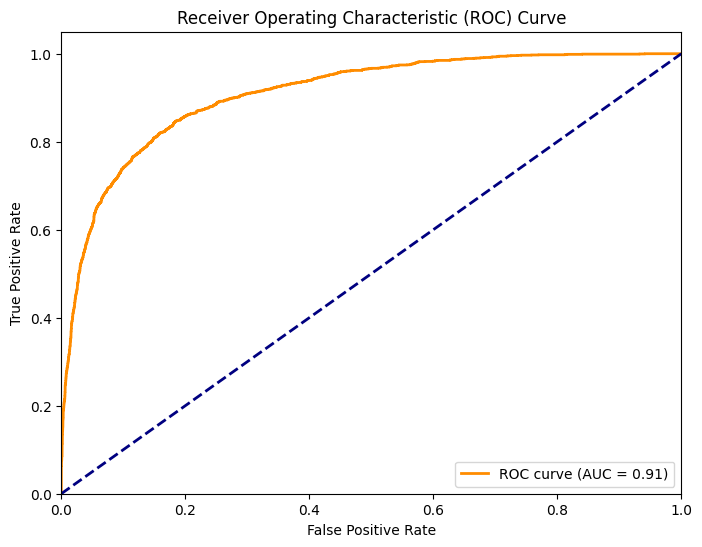

In [51]:
import xgboost as xgb

params_xgb ={'n_estimators': 100,
            'max_depth': 10}

model_xgb = xgb.XGBClassifier(**params_xgb)

model_xgb, accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

## Accuracy Scores comparison

In [53]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy Score': accuracy_scores}

data = pd.DataFrame(model_data)
data["Accuracy Score"] = (data["Accuracy Score"]*100)

data

Model  Accuracy Score
0  Logistic Regression       77.120851
1        Decision Tree       76.350618
2        Random Forest       80.657409
3              XGBoost       87.166414

In [54]:
data= data.sort_values(by= "Accuracy Score", ascending=True)
data

Model  Accuracy Score
1        Decision Tree       76.350618
0  Logistic Regression       77.120851
2        Random Forest       80.657409
3              XGBoost       87.166414

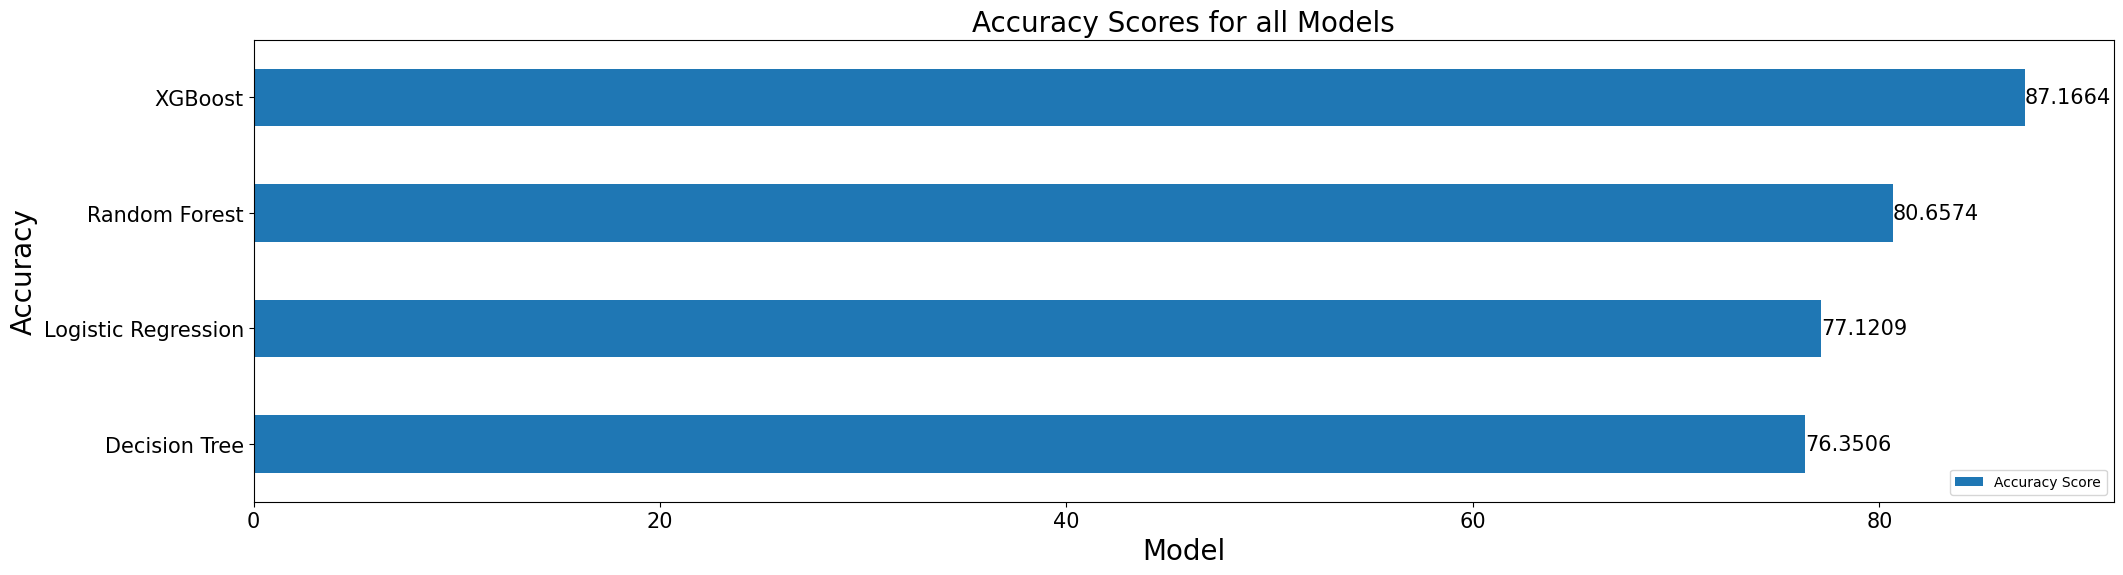

In [55]:
ax = data.sort_values(by="Accuracy Score", ascending = True).plot( x= "Model", y="Accuracy Score", kind='barh', figsize=(24,6), fontsize=15)
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Scores for all Models", fontsize=20)
plt.show()

## Model Evaluation Metrics for All Models

In [58]:
rocauc_scores = [roc_auc_lr , roc_auc_dt, roc_auc_rf, roc_auc_xgb]

precision_scores = [precision_lr,precision_dt,precision_rf,precision_xgb]

recall_scores = [recall_lr,recall_dt,recall_rf,recall_xgb]

f1_scores = [f1_lr, f1_dt,f1_rf, f1_xgb]

Model = ['Logistic Regression','Decision Tree','Random Forest','XGBoost']
              

comp = pd.DataFrame(list(zip( Model, precision_scores, recall_scores, f1_scores, rocauc_scores)), columns =["MODEL", "PRECISION", "RECALL", "F1_SCORE", "ROC_AUC"])

# setting first name as index column
comp.set_index("MODEL", inplace = True)

comp

PRECISION    RECALL  F1_SCORE   ROC_AUC
MODEL                                                       
Logistic Regression   1.000000  0.000474  0.000947  0.534639
Decision Tree         0.452957  0.159716  0.236160  0.685272
Random Forest         0.747352  0.234123  0.356550  0.840191
XGBoost               0.783486  0.607109  0.684112  0.908497

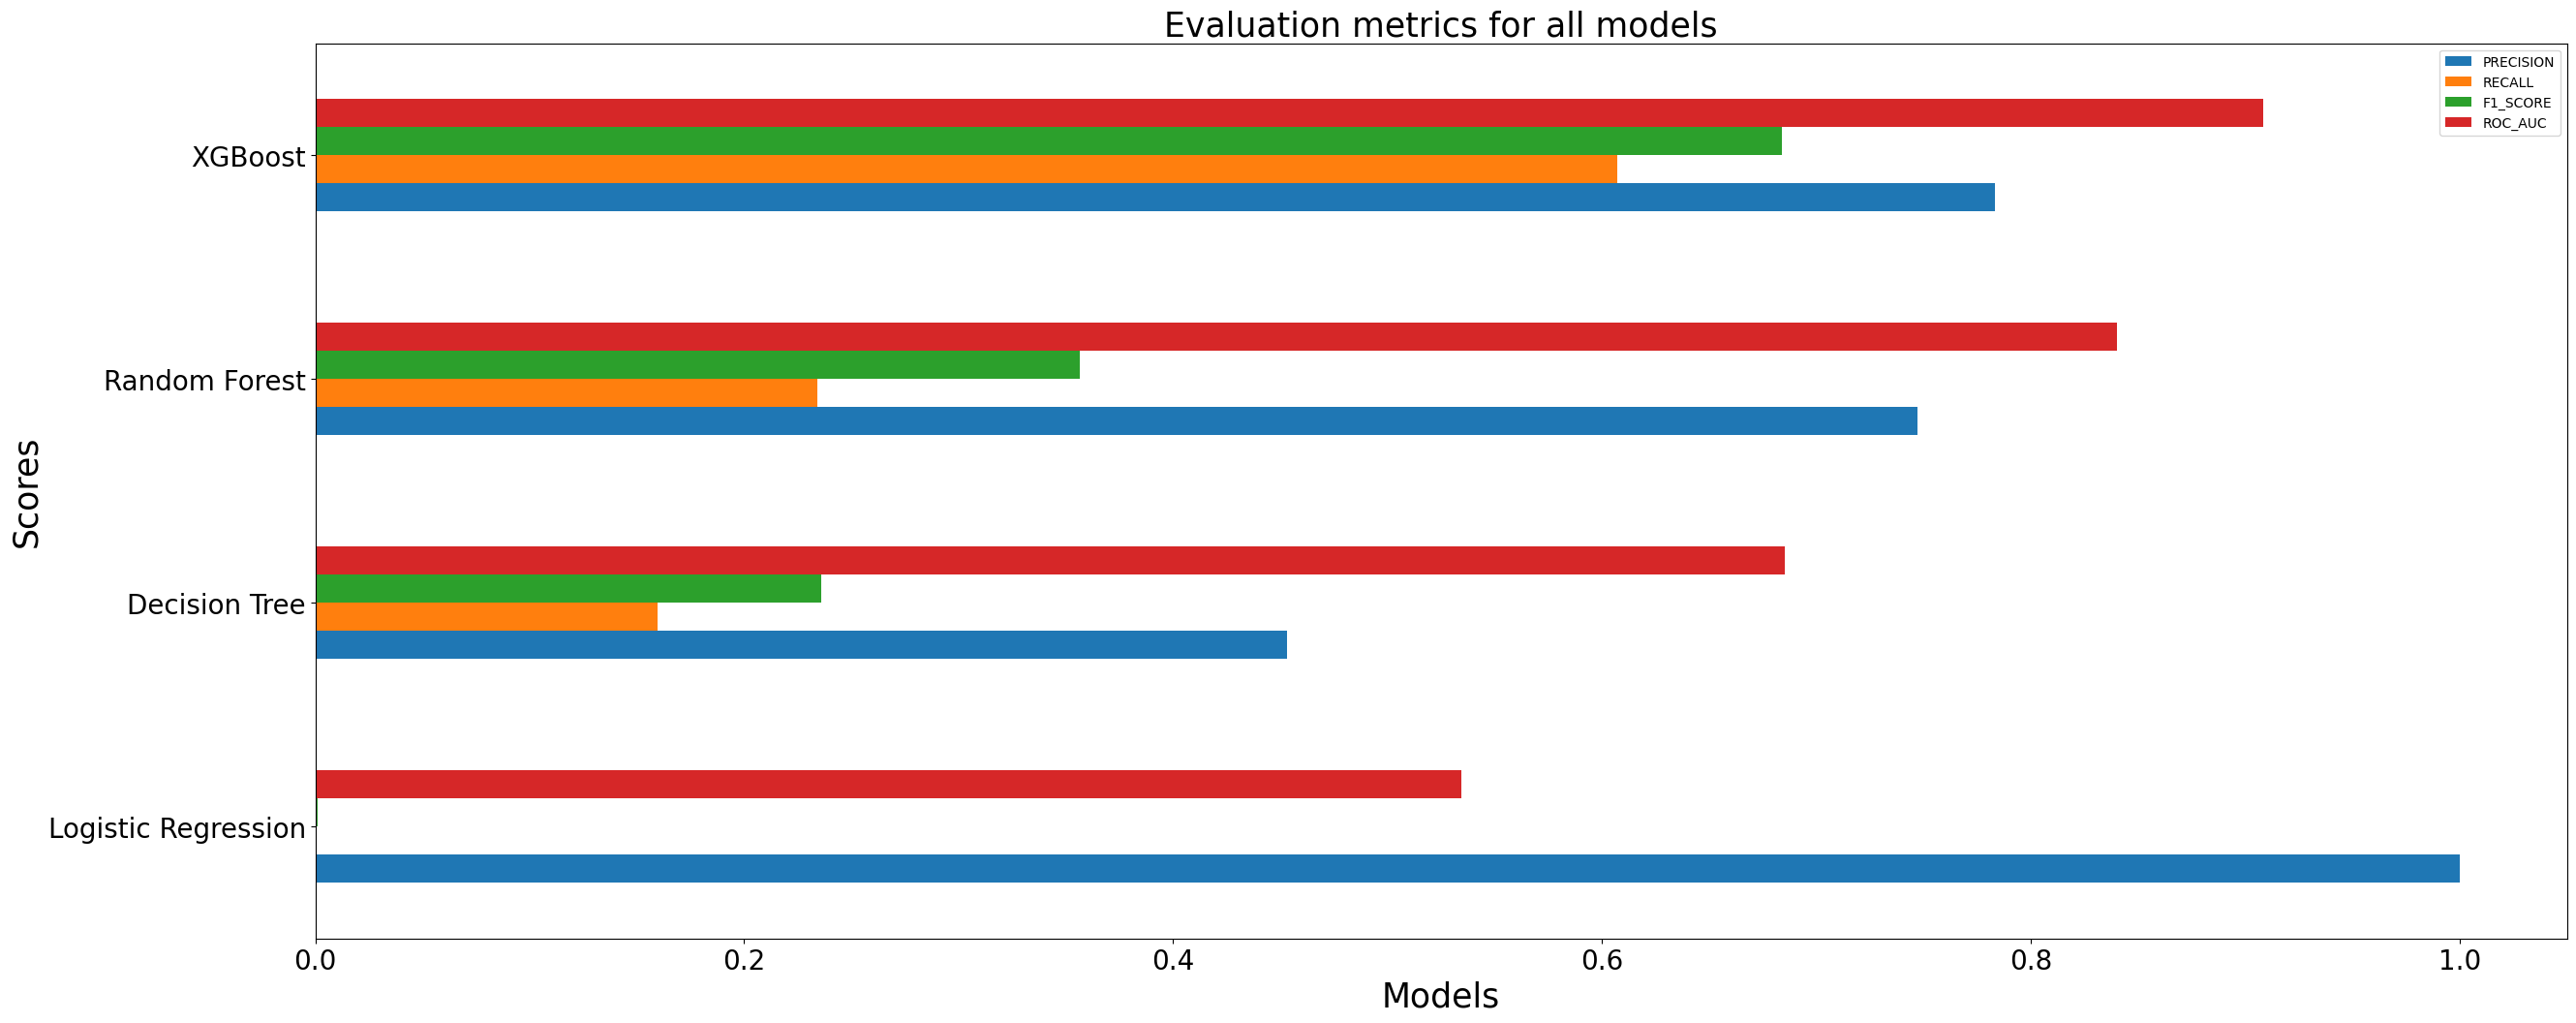

In [59]:
comp.plot(kind="barh", figsize=(30,12))
plt.xlabel("Models", fontsize =25)
plt.ylabel("Scores", fontsize=25)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.title("Evaluation metrics for all models", fontsize = 25)
plt.show()

## ROC AUC socore for XGBoost = 0.91

# Champion Model: XGBOOST

In [60]:
yhat_xgb = model_xgb.predict(X_test)
yhat_xgb

array([0, 0, 0, ..., 0, 0, 0])

## Predicted classes visualization using XGBOOST

/tmp/ipykernel_15/2670761070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df.Deposits, data = df, palette = "Set1")


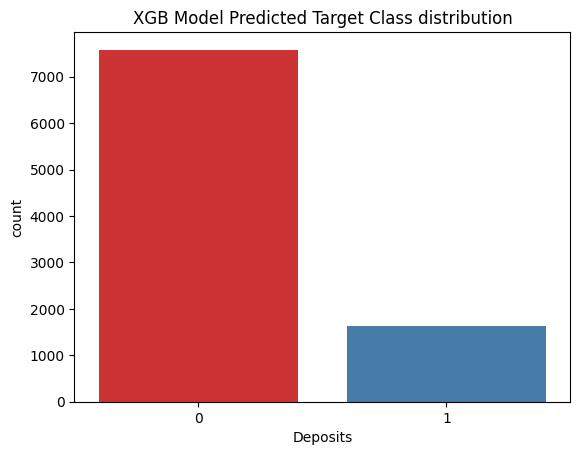

In [63]:
type(yhat_xgb)

# converting the NumPy array to a Pandas series
series = pd.Series(yhat_xgb)
series

df = pd.DataFrame(series, columns =["Deposits"])
df

sns.countplot(x= df.Deposits, data = df, palette = "Set1")
plt.title("XGB Model Predicted Target Class distribution", fontsize=12)
plt.show()

In [81]:
df.to_csv("Predicted_classes.csv")

## Model Fitting with SMOTE

In [64]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 59.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [65]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [72]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [73]:
# Initialize and fit a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [74]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.7517
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7108
           1       0.45      0.38      0.41      2110

    accuracy                           0.75      9218
   macro avg       0.64      0.62      0.63      9218
weighted avg       0.74      0.75      0.74      9218



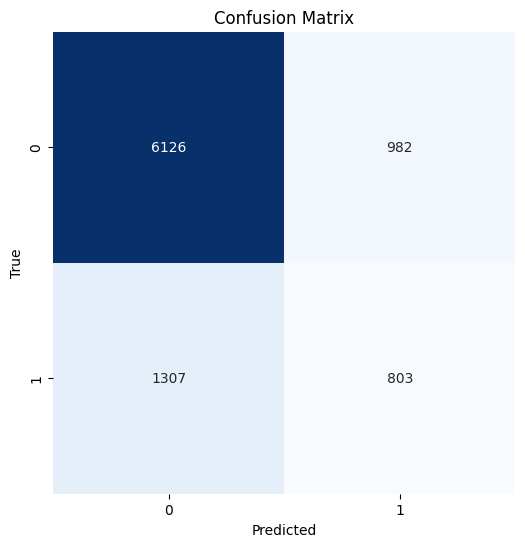

In [76]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

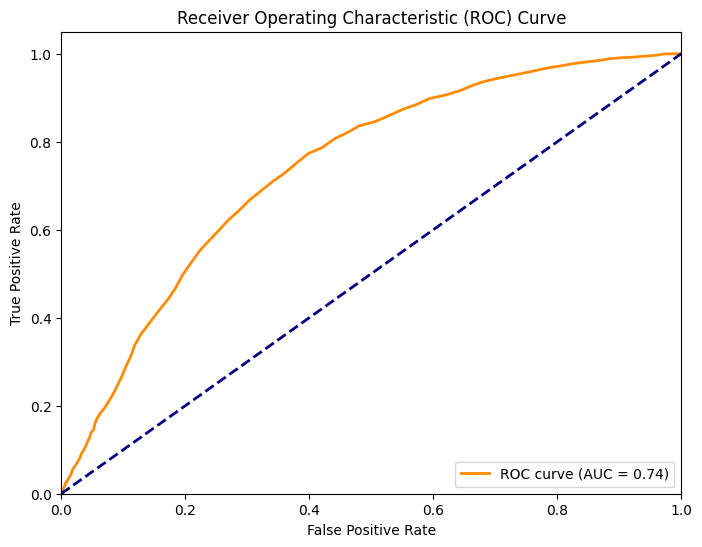

In [79]:

#Plot ROC_AUC Curve
    # Predict probabilities on the test data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()                  


### We can observe that the model is not performing better with SMOTE and the ROC AUC Value has gone down. Hence we will be using the XGBOOST Model without Resampling since we achieved a ROC AUC value of over 91% in that model.

## XGBOOST

In [82]:
# Initialize and fit a Random Forest classifier
clf1 = XGBClassifier(random_state=42)
clf1.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [84]:
# Predict on the test data
y_pred = clf1.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8345
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7108
           1       0.66      0.58      0.62      2110

    accuracy                           0.83      9218
   macro avg       0.77      0.75      0.76      9218
weighted avg       0.83      0.83      0.83      9218



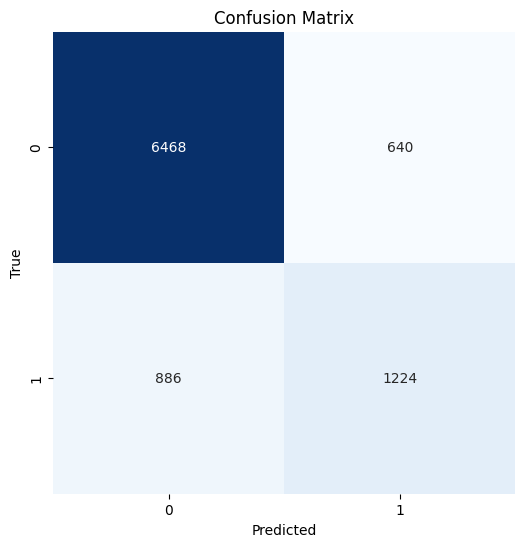

In [85]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

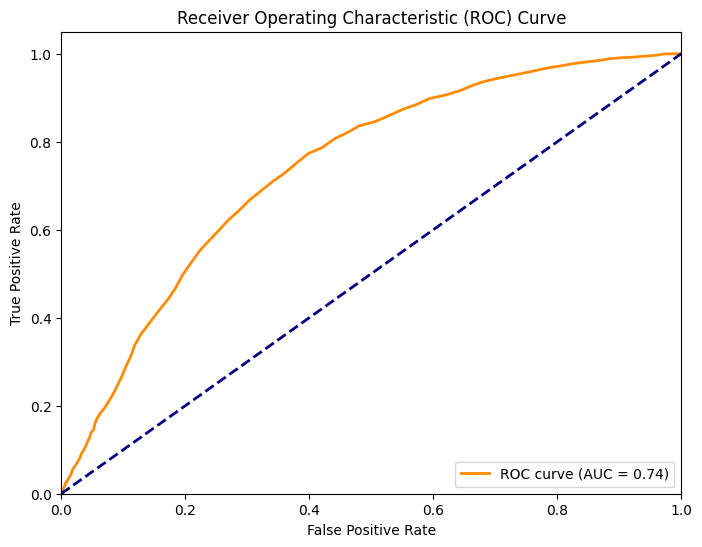

In [86]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()                  
